## Importing Required Libraries

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Loading dataset

In [5]:
df = pd.read_csv('loan_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Checking Dimensions of Dataset

In [6]:
df.shape

(307511, 122)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Columns and it's Description:

### Distribution of Data

In [8]:
df.skew()

SK_ID_CURR                       -0.001200
TARGET                            3.078159
CNT_CHILDREN                      1.974604
AMT_INCOME_TOTAL                391.559654
AMT_CREDIT                        1.234778
AMT_ANNUITY                       1.579777
AMT_GOODS_PRICE                   1.349000
REGION_POPULATION_RELATIVE        1.488009
DAYS_BIRTH                       -0.115673
DAYS_EMPLOYED                     1.664346
DAYS_REGISTRATION                -0.590872
DAYS_ID_PUBLISH                   0.349327
OWN_CAR_AGE                       2.745422
FLAG_MOBIL                     -554.536744
FLAG_EMP_PHONE                   -1.664886
FLAG_WORK_PHONE                   1.504950
FLAG_CONT_MOBILE                -23.081172
FLAG_PHONE                        0.974083
FLAG_EMAIL                        3.832853
CNT_FAM_MEMBERS                   0.987543
REGION_RATING_CLIENT              0.087468
REGION_RATING_CLIENT_W_CITY       0.059730
HOUR_APPR_PROCESS_START          -0.028024
REG_REGION_

In [9]:
df.kurt()

SK_ID_CURR                          -1.198988
TARGET                               7.475109
CNT_CHILDREN                         7.904106
AMT_INCOME_TOTAL                191786.554381
AMT_CREDIT                           1.934041
AMT_ANNUITY                          7.707320
AMT_GOODS_PRICE                      2.431916
REGION_POPULATION_RELATIVE           3.260065
DAYS_BIRTH                          -1.049126
DAYS_EMPLOYED                        0.771612
DAYS_REGISTRATION                   -0.321347
DAYS_ID_PUBLISH                     -1.106808
OWN_CAR_AGE                          9.214945
FLAG_MOBIL                      307511.000000
FLAG_EMP_PHONE                       0.771852
FLAG_WORK_PHONE                      0.264876
FLAG_CONT_MOBILE                   530.743969
FLAG_PHONE                          -1.051170
FLAG_EMAIL                          12.690846
CNT_FAM_MEMBERS                      2.801977
REGION_RATING_CLIENT                 0.800416
REGION_RATING_CLIENT_W_CITY       

### Bifurcating Data based on continuous and categorical features.

In [10]:
#Let us check for number of numeric as well as categorical columns
df_num = df.select_dtypes(include=np.number)
print('No of numeric columns are',df_num.shape[1])

No of numeric columns are 106


In [11]:
df_cat = df.select_dtypes(include=object)
print('No of categorical columns are',df_cat.shape[1])

No of categorical columns are 16


### Discription and Summary Statistics with 5 point Summary

* For numeric features

In [12]:
df.describe(include=np.number).T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

* For Categorical features

In [13]:
df.describe(include=object).T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
FONDKAPREMONT_MODE           73830  
HOUSETYPE_MODE              150503  
WALLSMATERIAL_MODE           66040  
EMERGENCYSTATE_MODE         159428

### Summarize observations for categorical variables – no. of categories, % observations in each category.

In [14]:
col = df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                     'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']]

for i in col:
    percentage_count = df[i].value_counts(normalize=True)*100
    print('Column:',{i})
    print(percentage_count)
    print('============================================')

Column: {'NAME_CONTRACT_TYPE'}
Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64
Column: {'CODE_GENDER'}
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64
Column: {'FLAG_OWN_CAR'}
N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64
Column: {'FLAG_OWN_REALTY'}
Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64
Column: {'NAME_TYPE_SUITE'}
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64
Column: {'NAME_INCOME_TYPE'}
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name:

### Let us check for null values present in the dataset

In [15]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
# Make below cell as code.

plt.rcParams['figure.figsize'] = [75,70]
sns.heatmap(df.corr(),fmt=".2f",annot=True,cmap='RdBu',mask=np.triu(df.corr(), +1))
plt.show()

## CHECKING OUTLIERS 

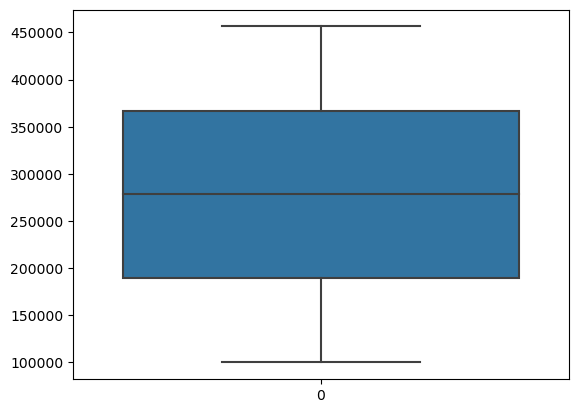

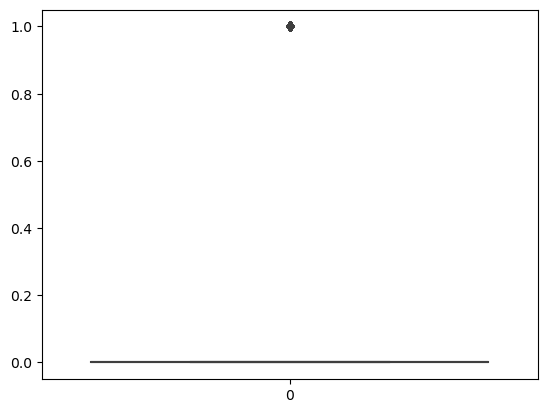

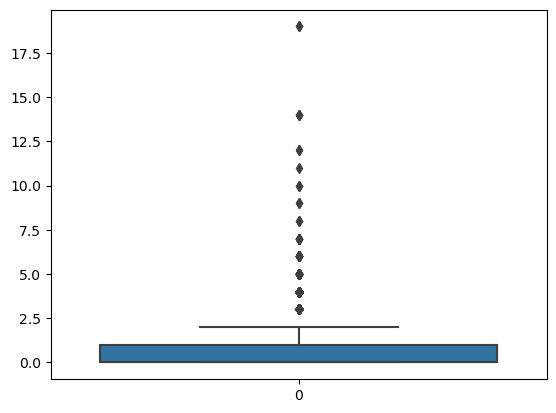

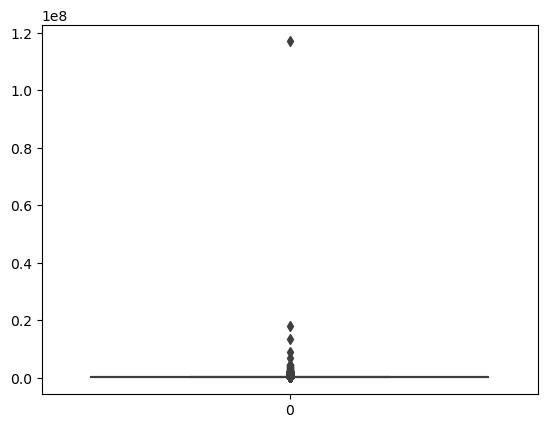

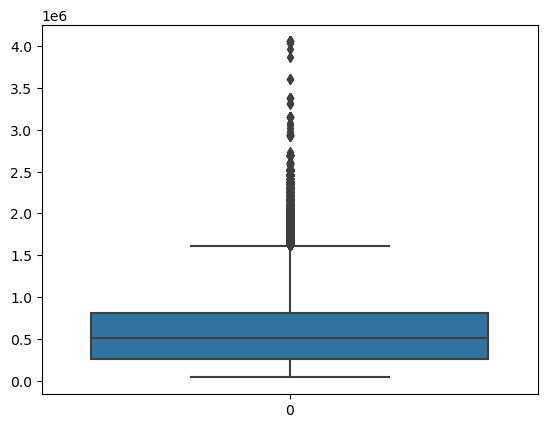

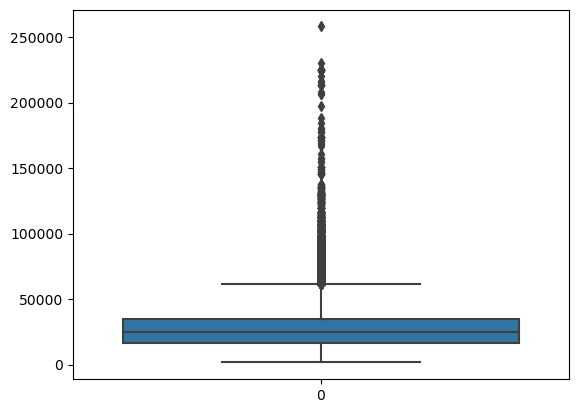

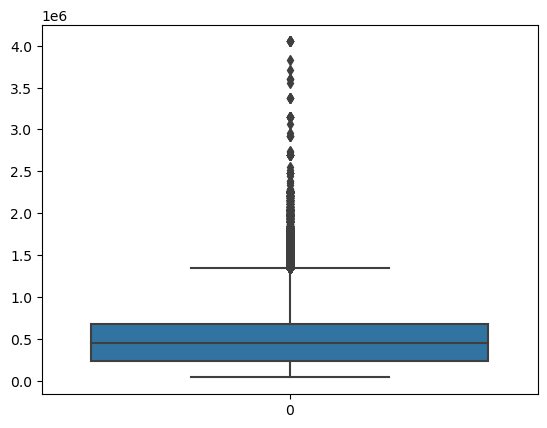

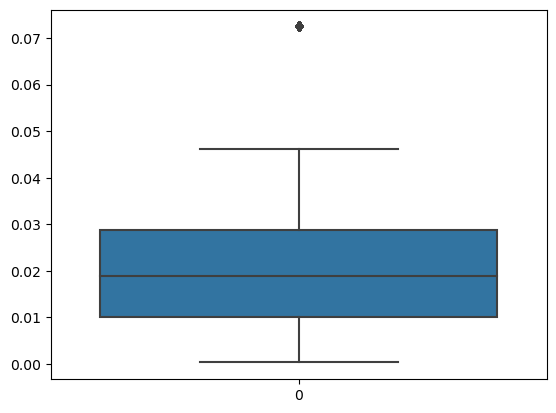

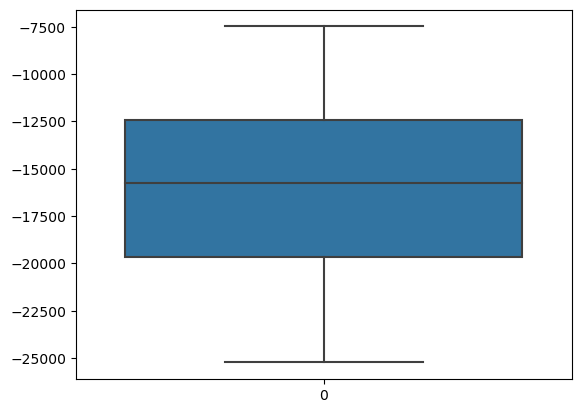

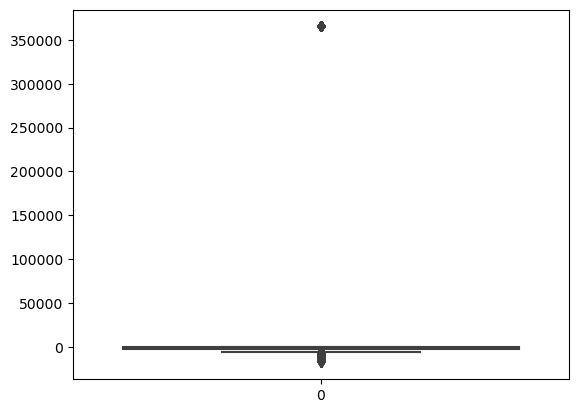

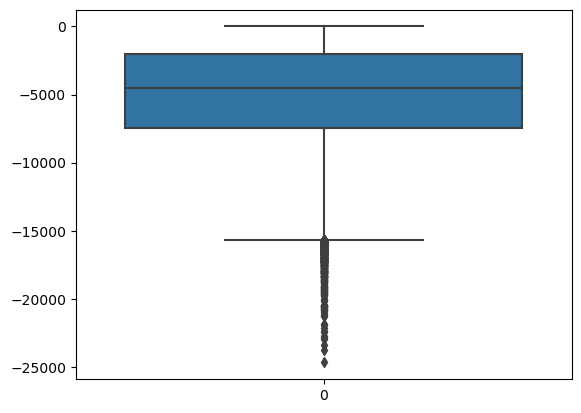

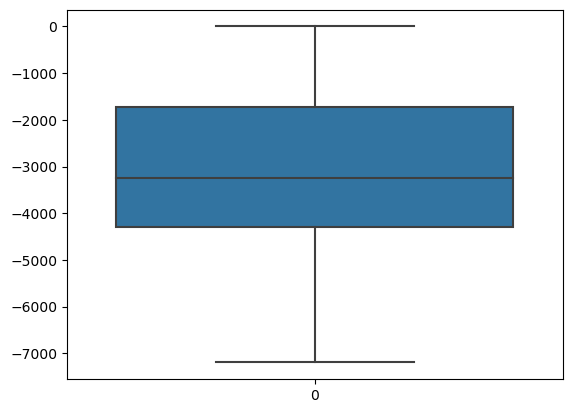

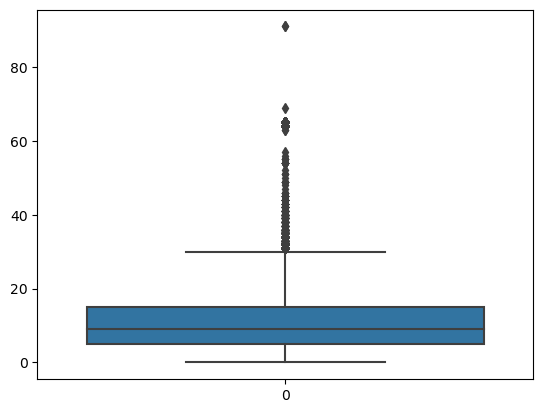

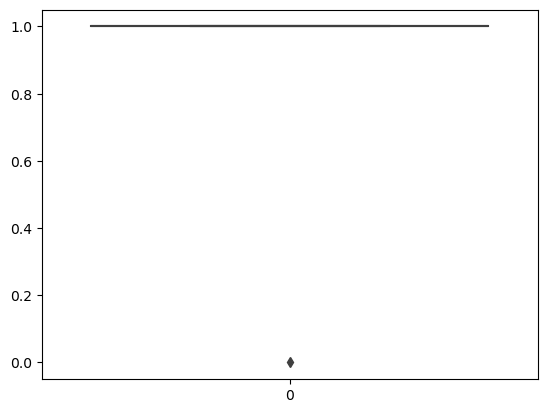

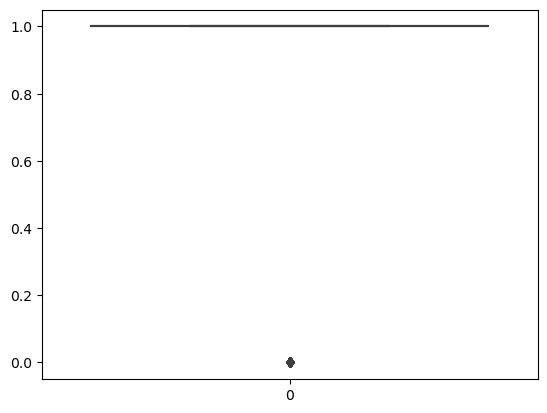

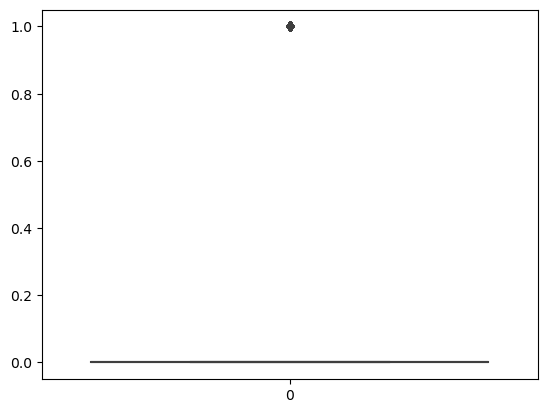

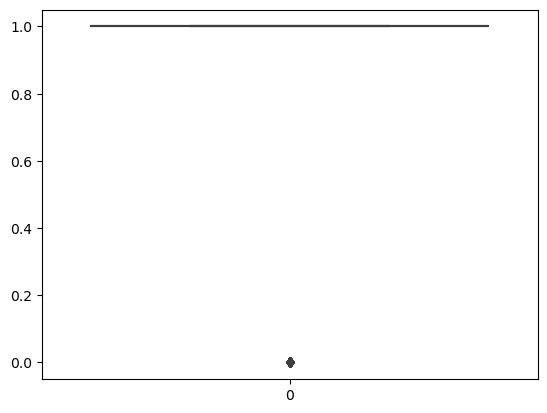

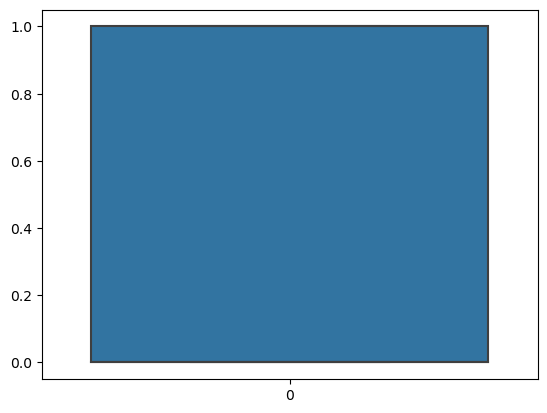

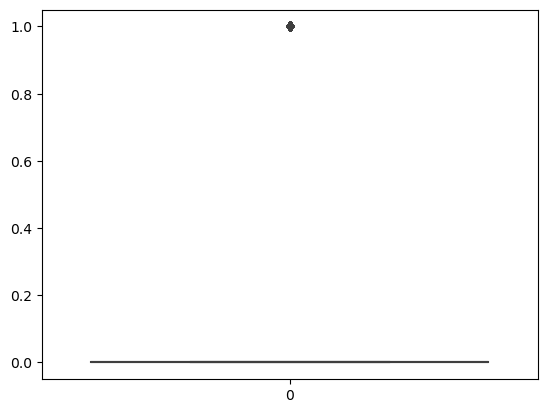

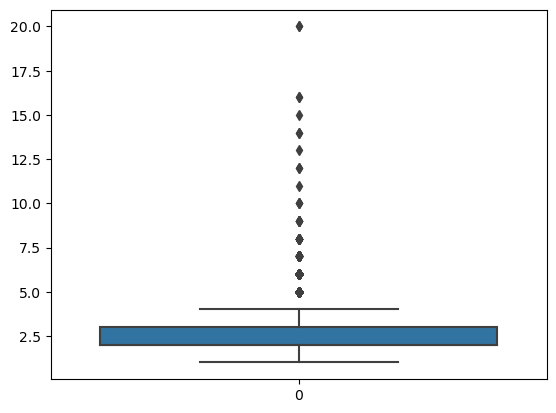

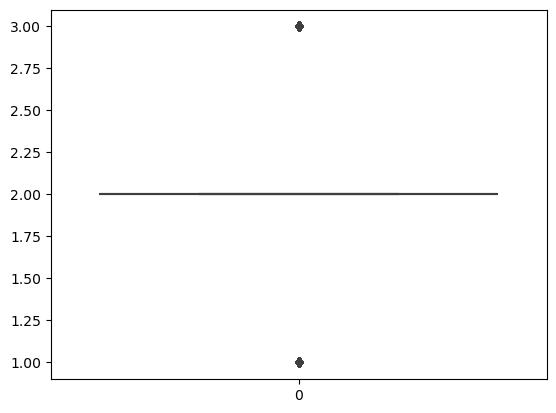

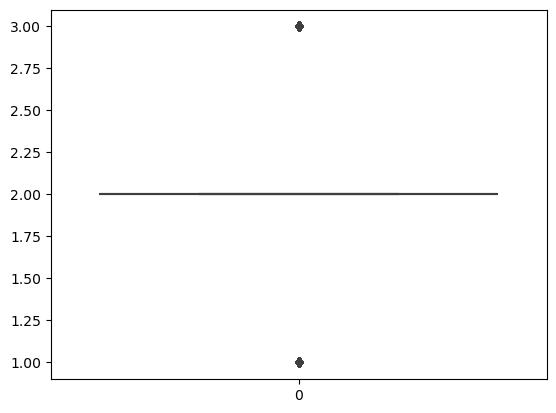

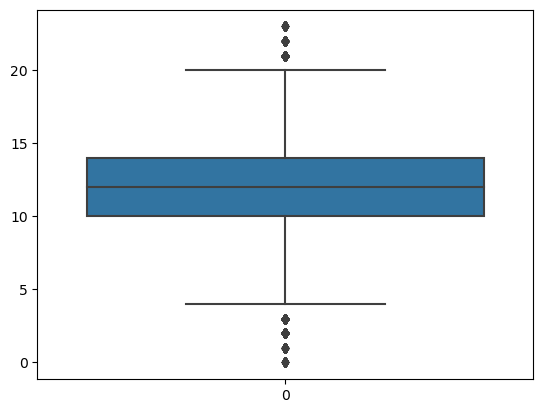

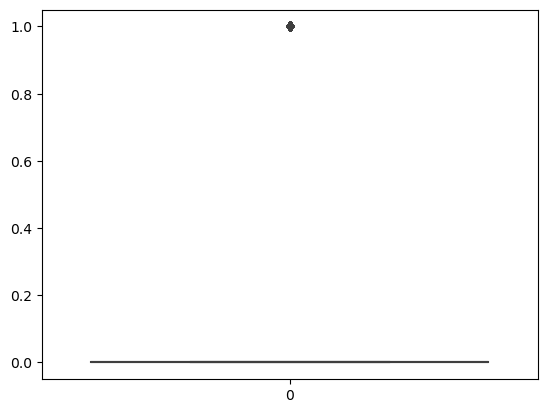

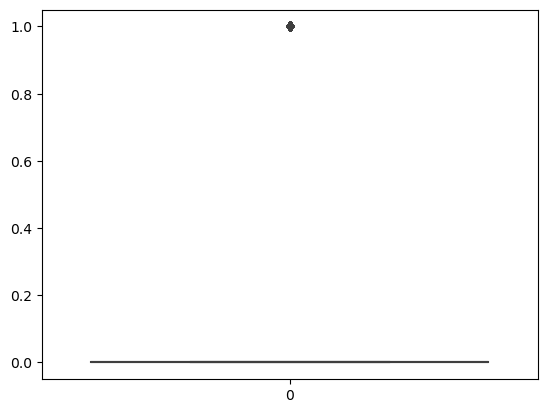

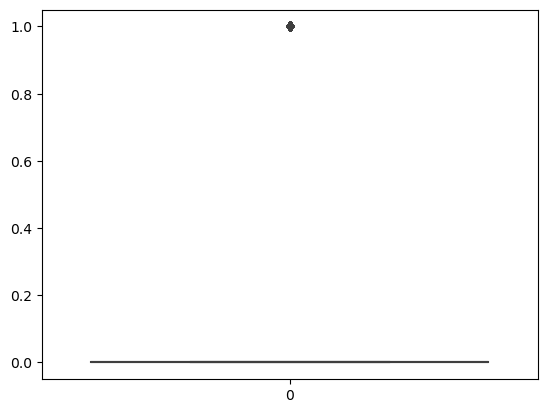

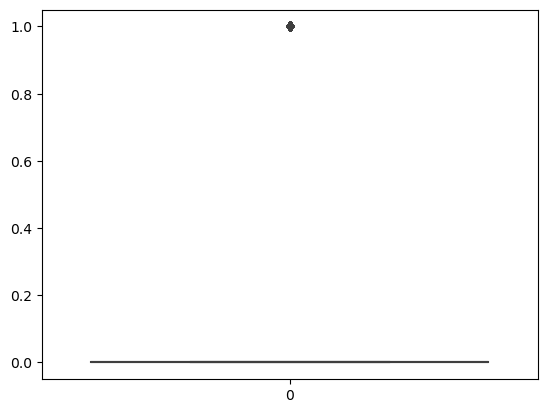

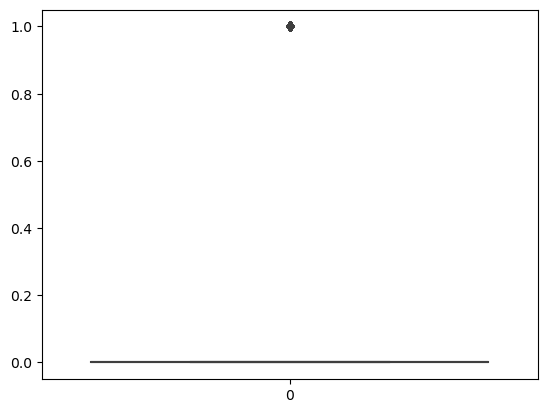

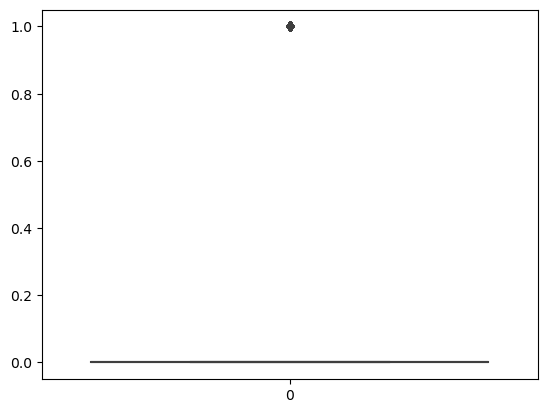

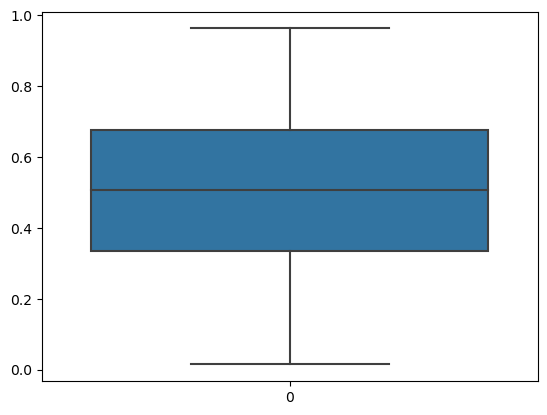

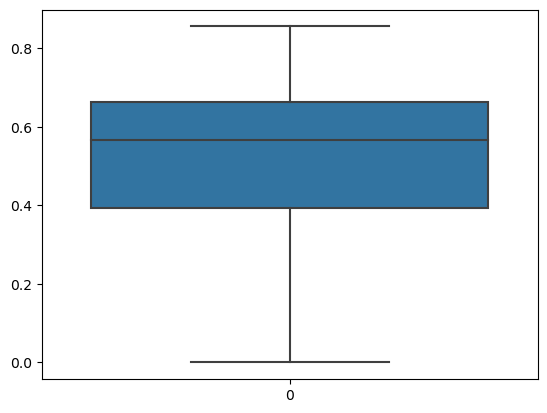

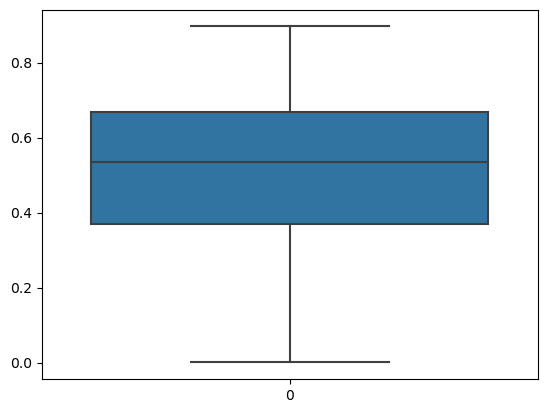

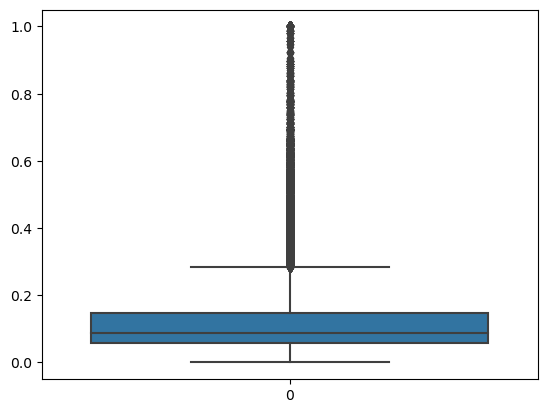

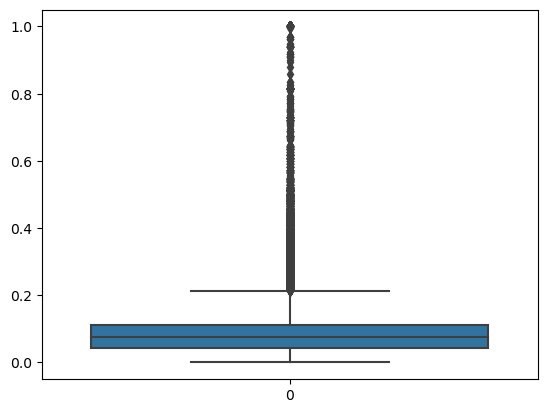

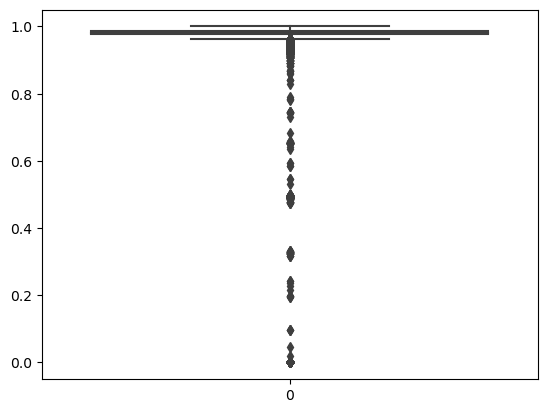

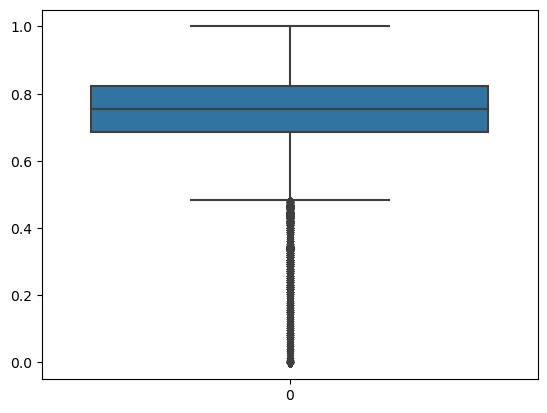

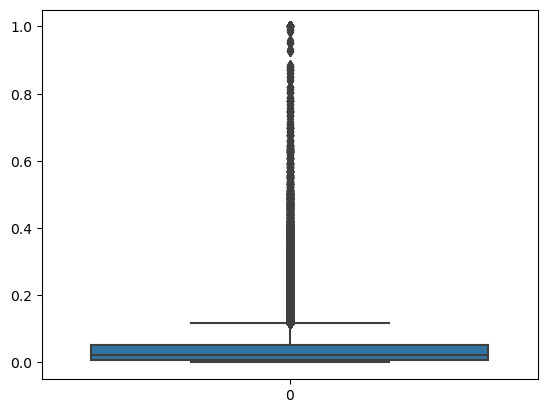

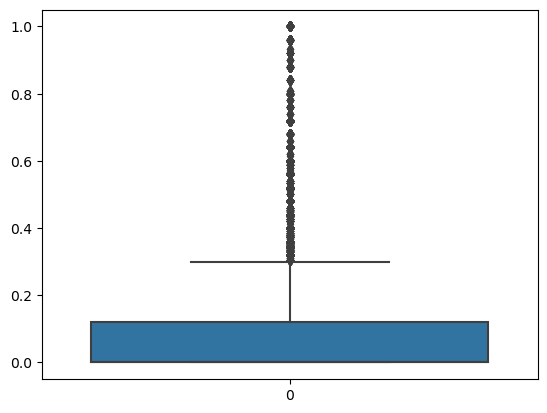

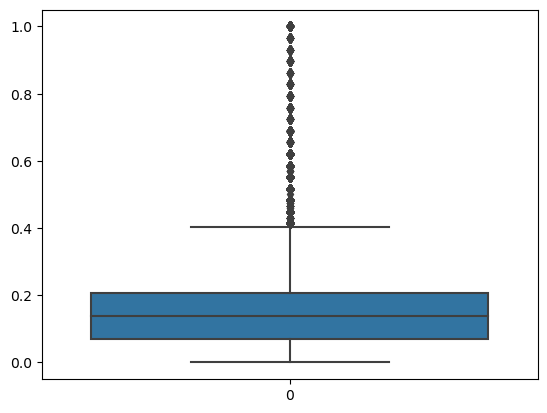

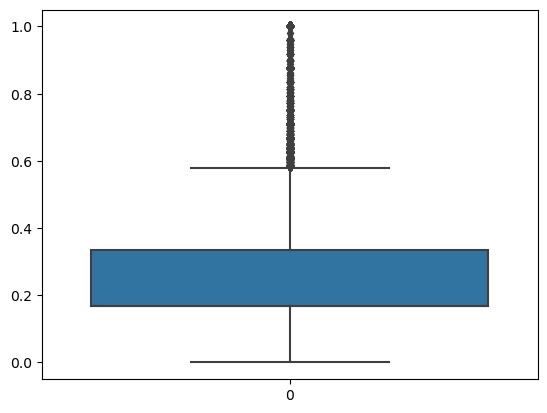

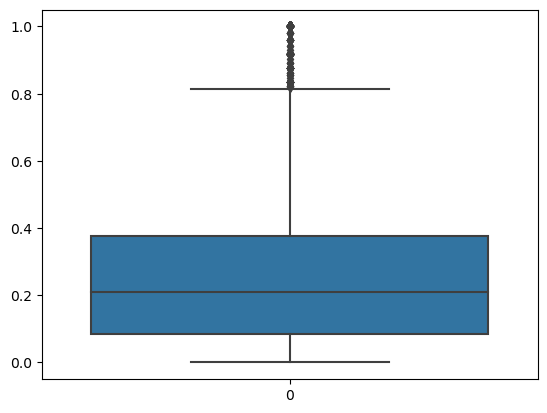

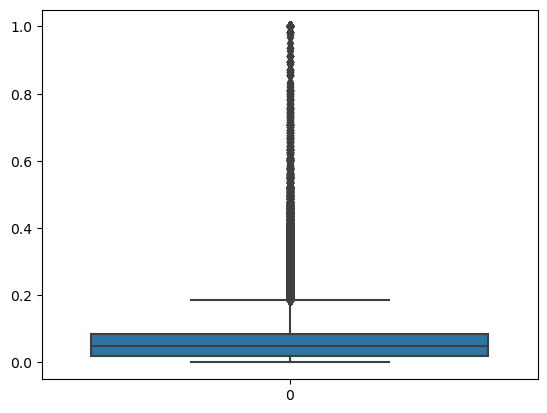

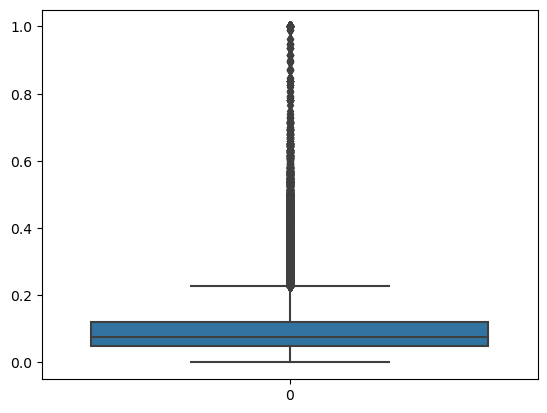

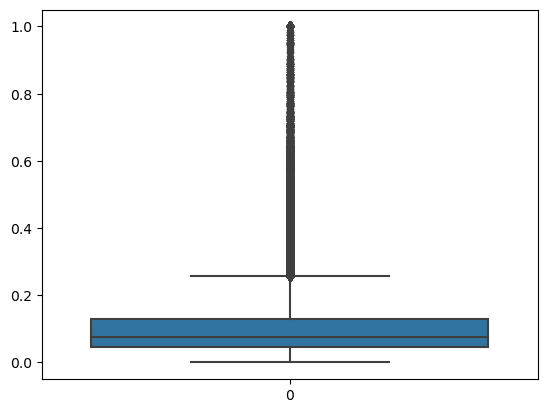

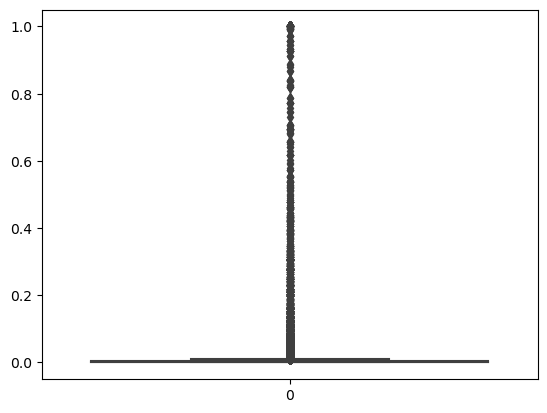

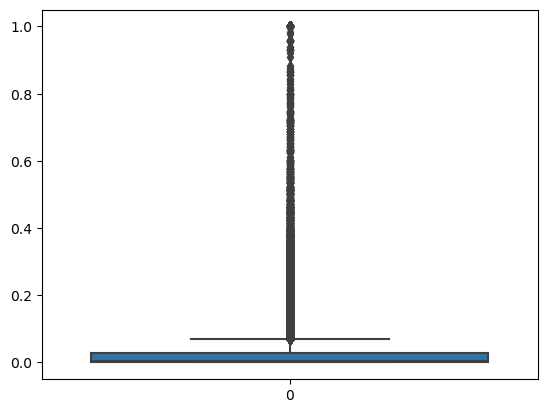

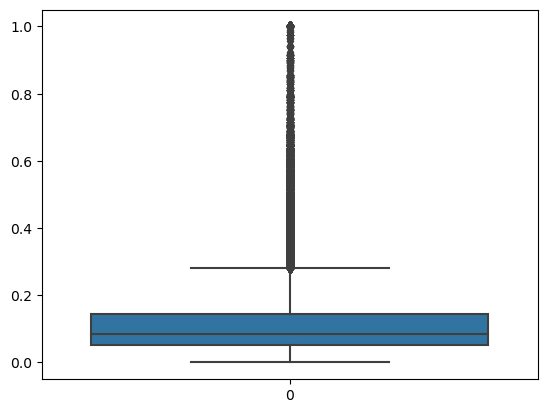

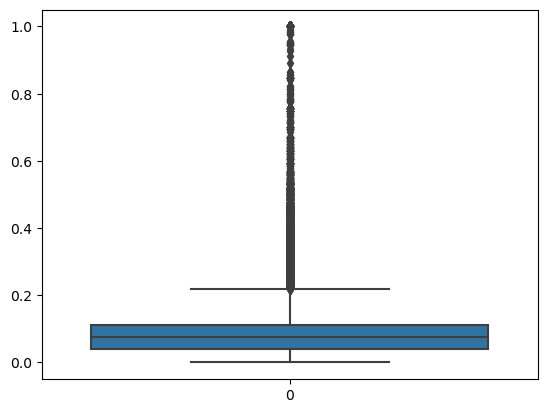

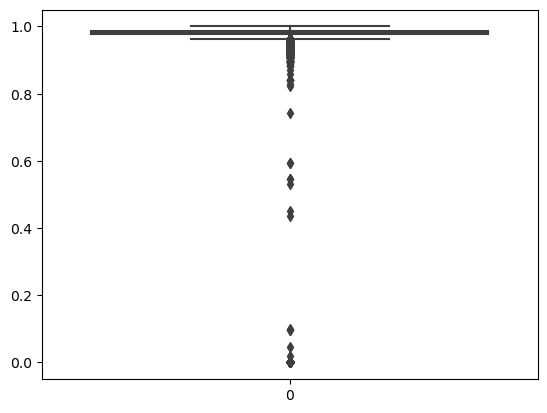

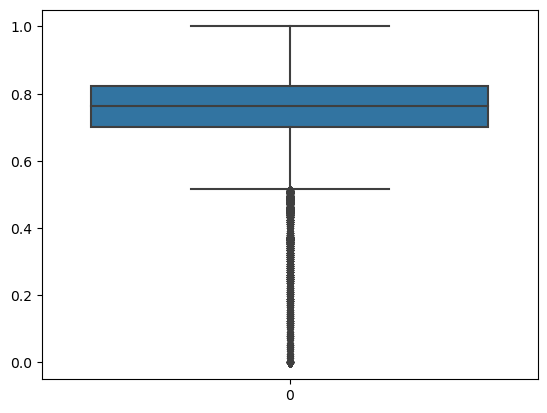

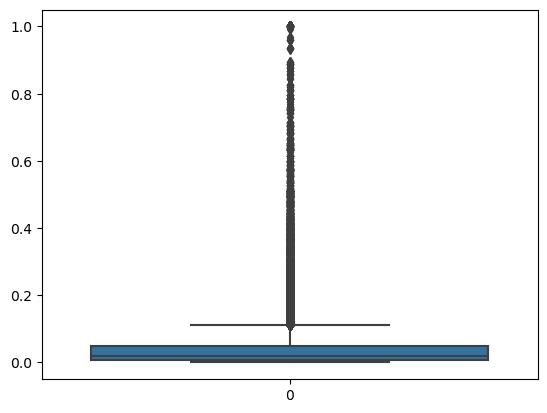

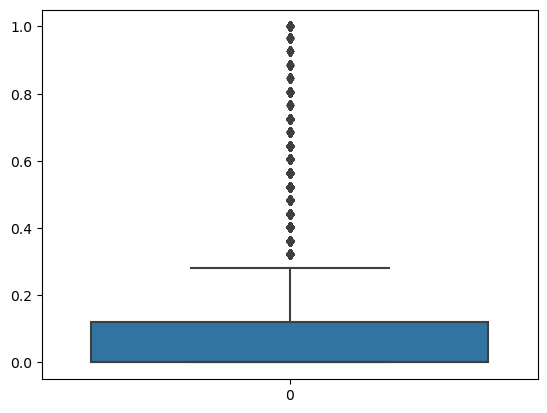

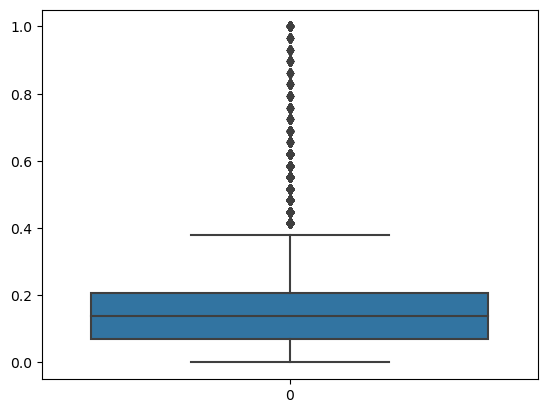

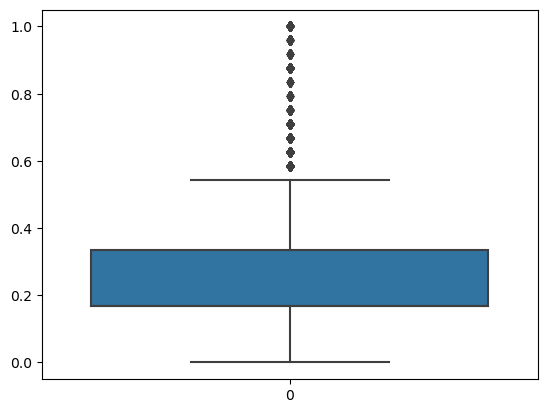

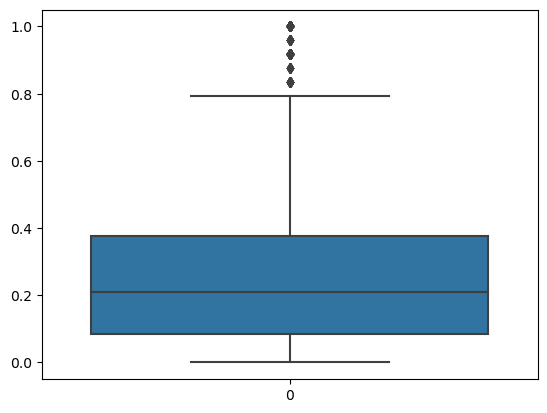

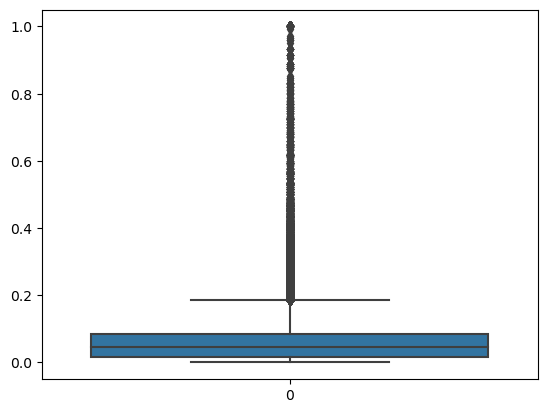

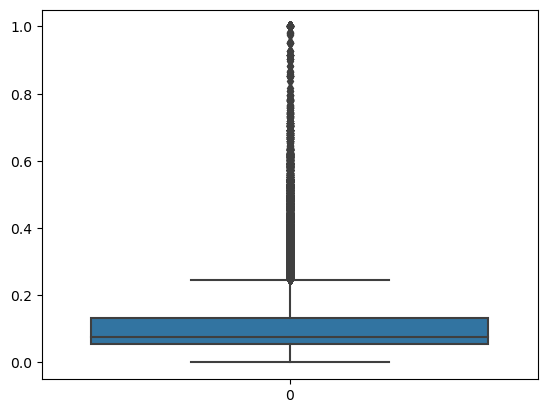

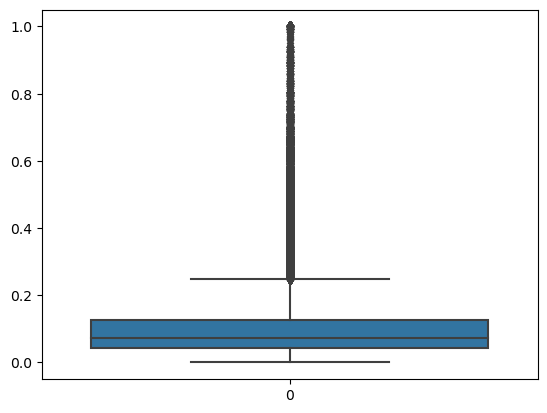

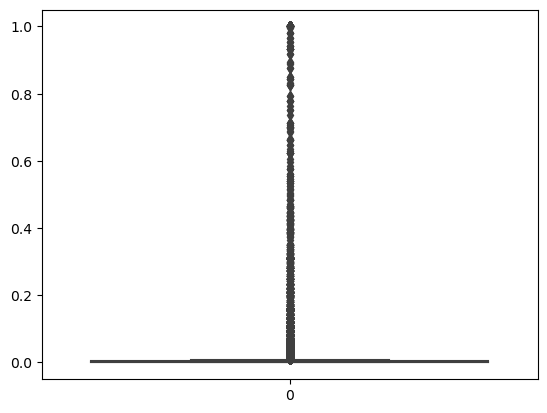

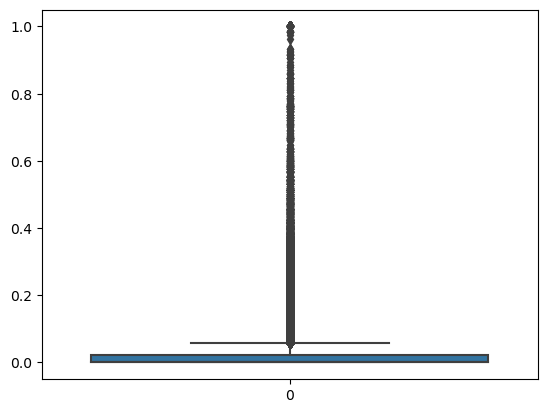

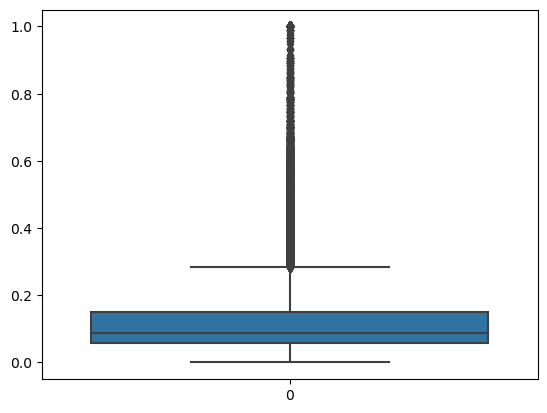

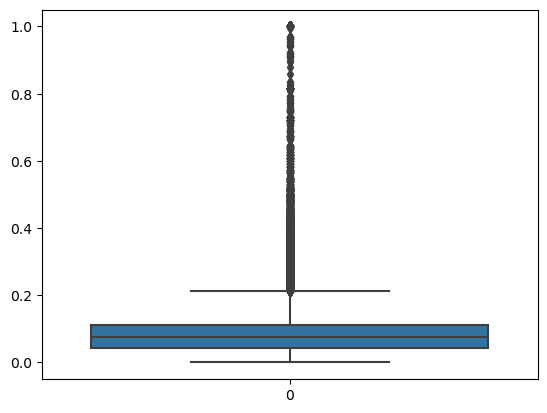

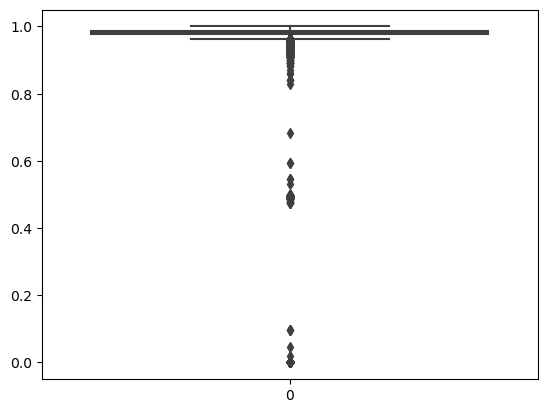

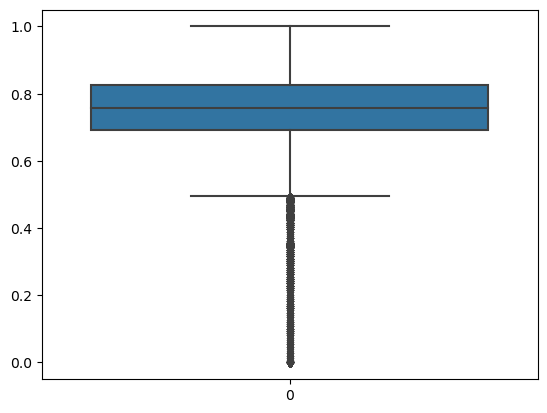

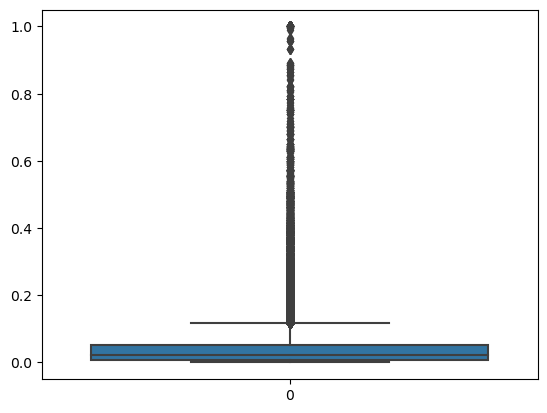

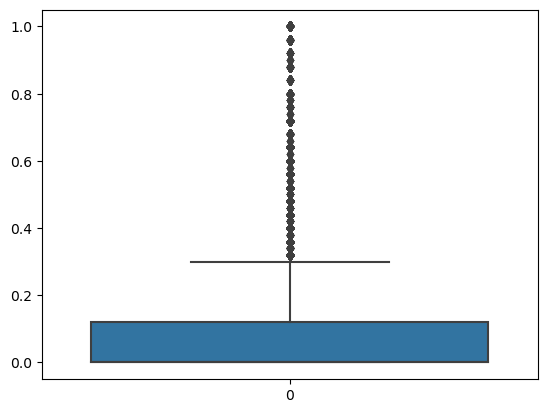

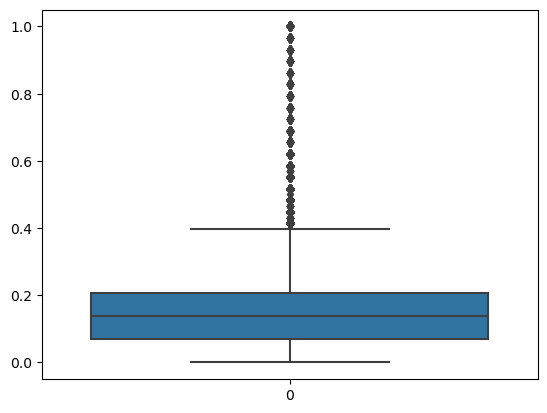

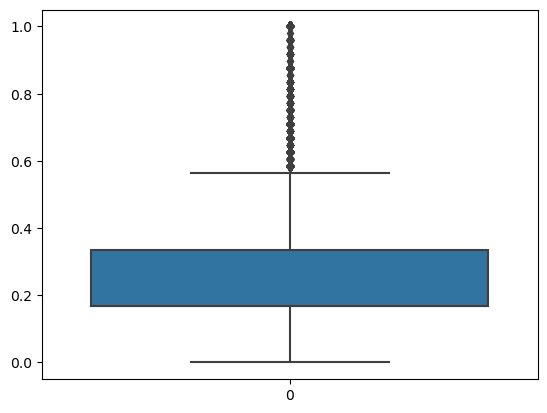

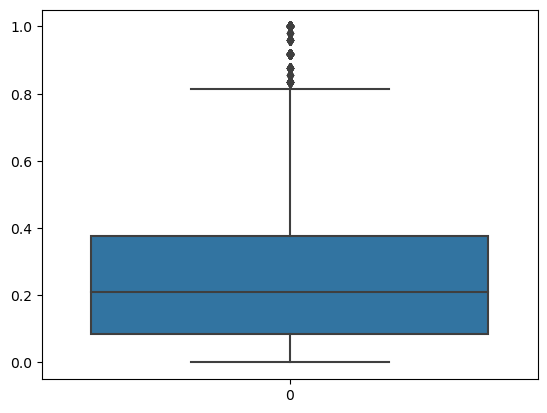

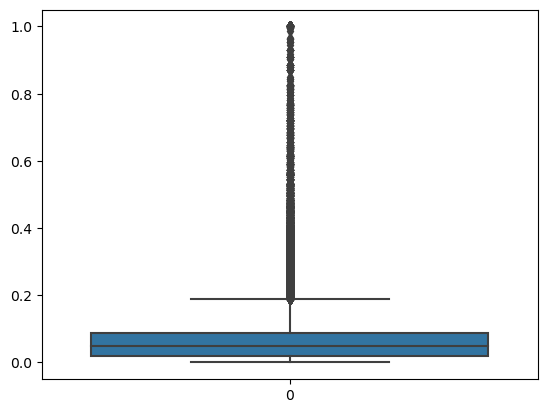

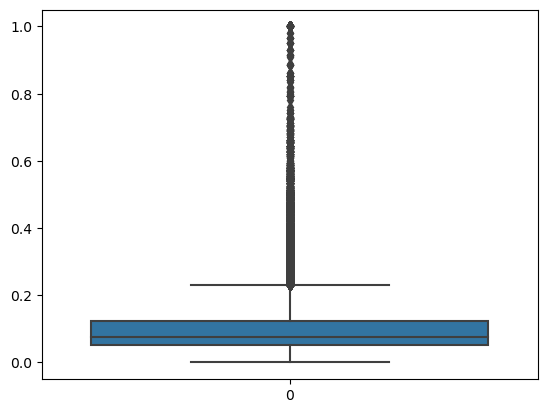

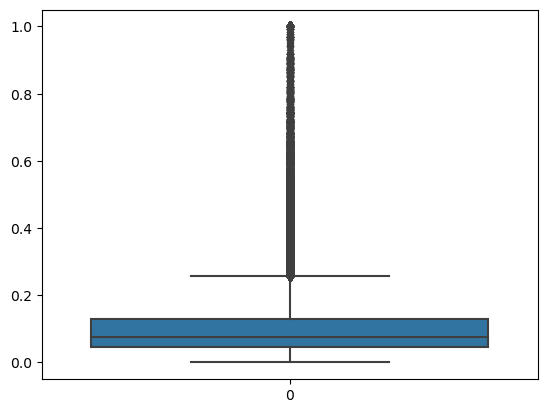

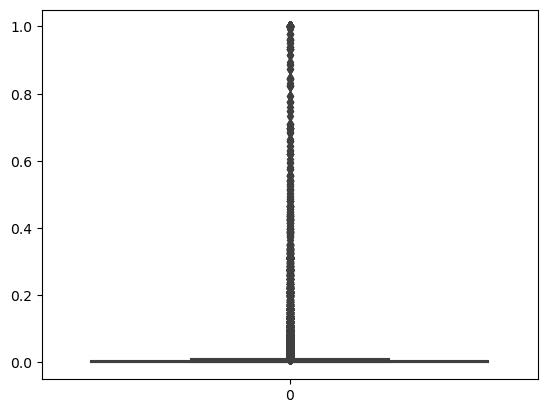

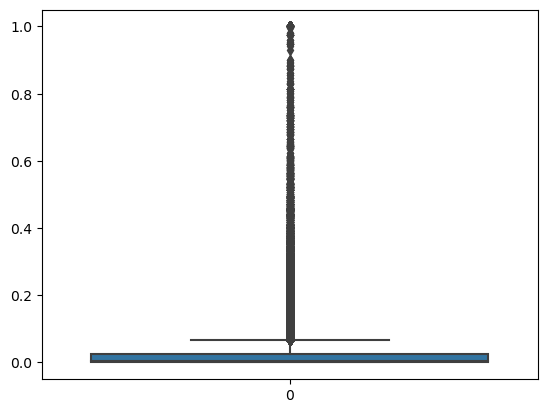

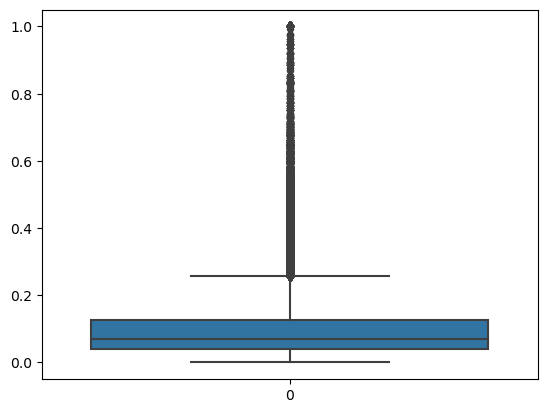

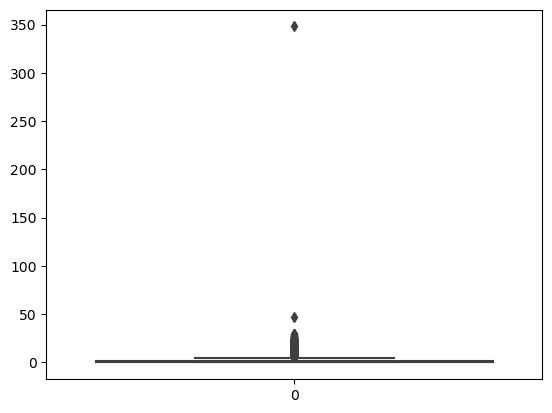

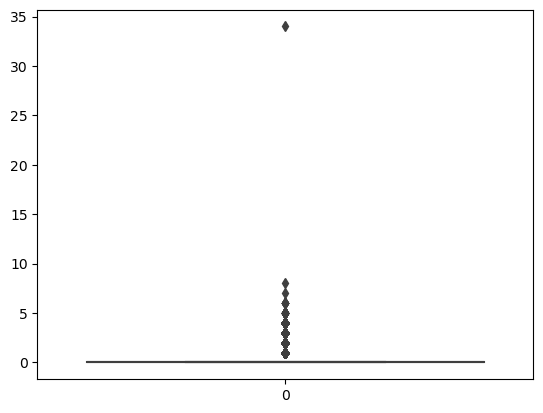

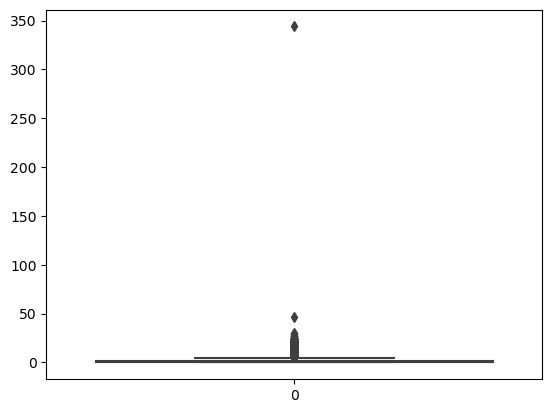

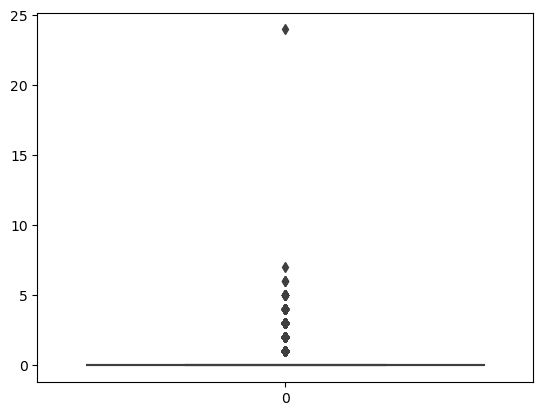

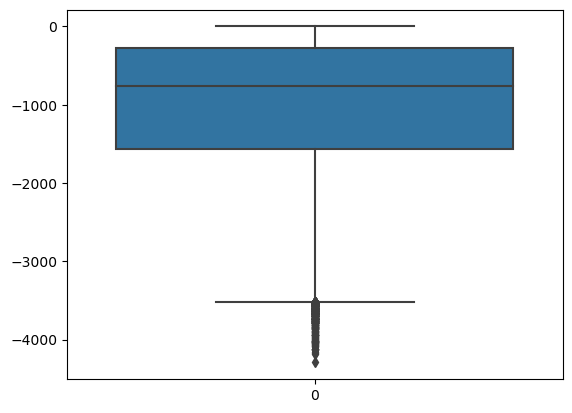

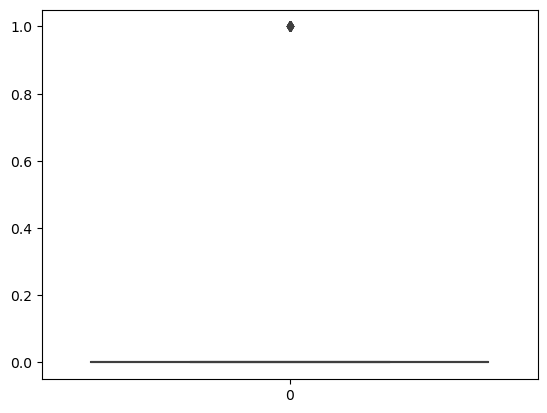

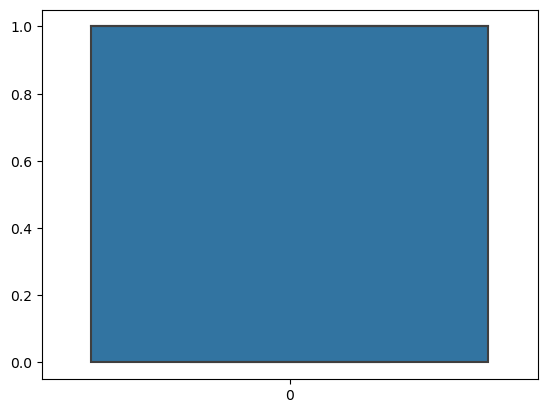

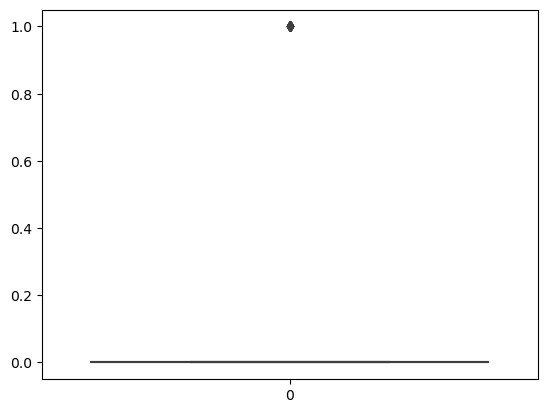

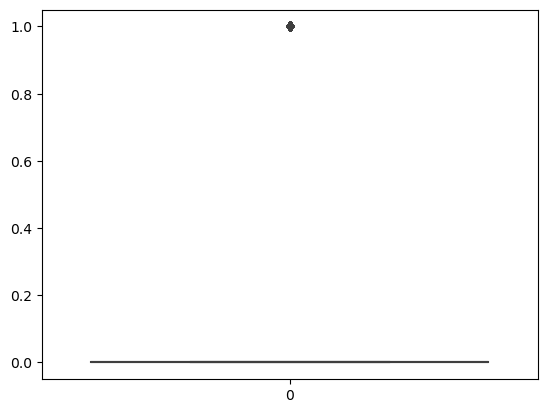

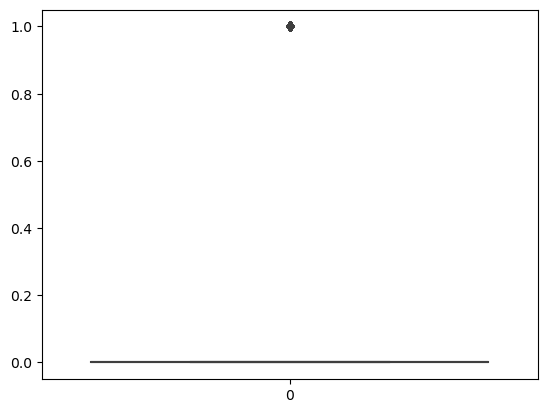

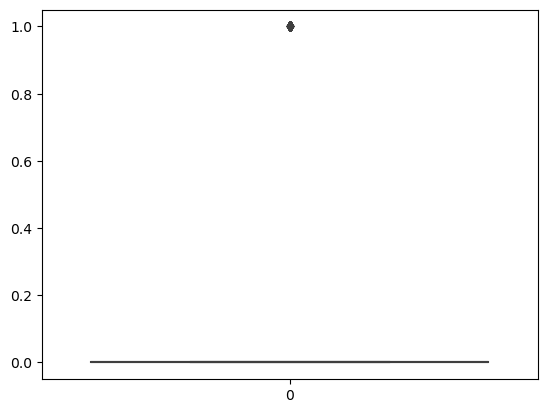

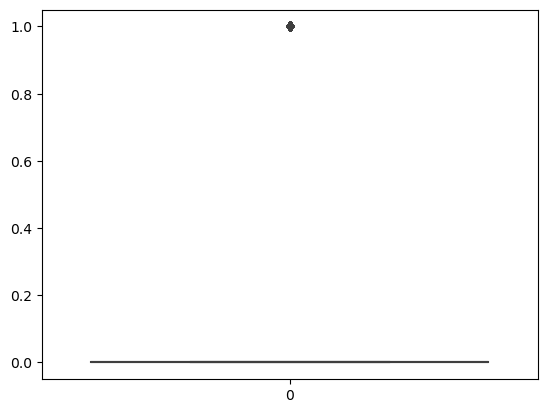

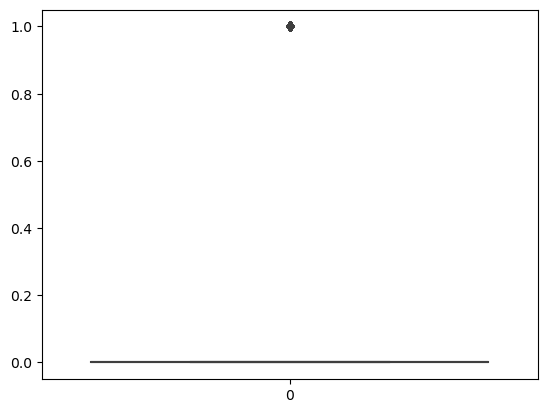

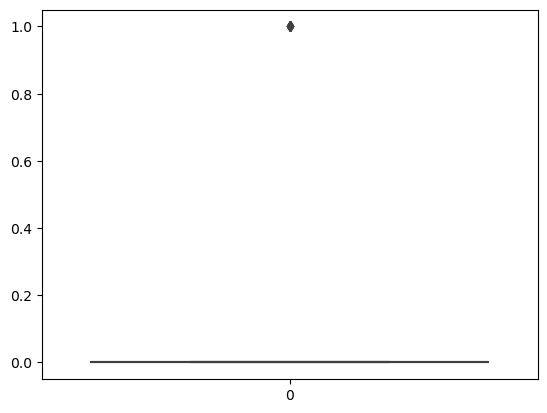

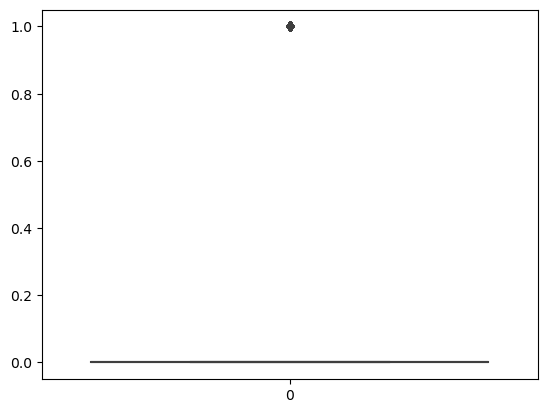

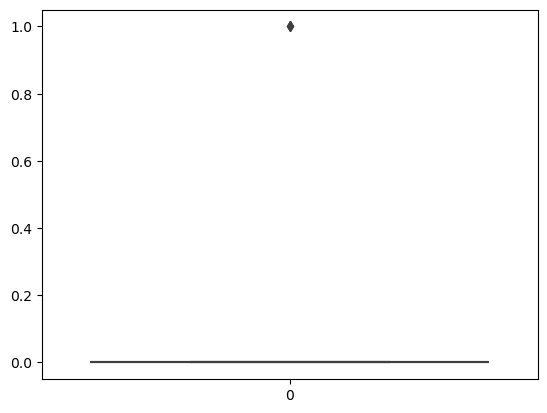

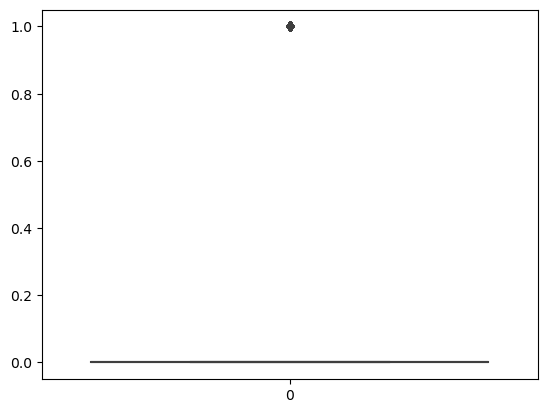

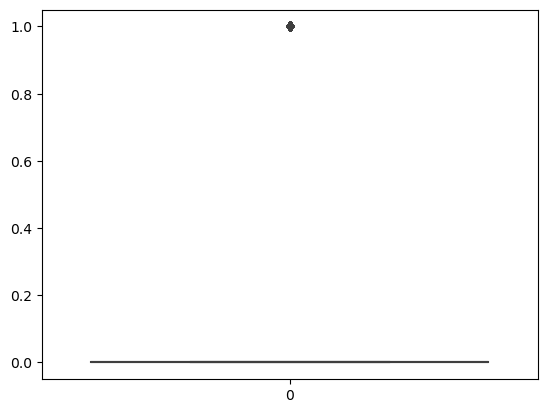

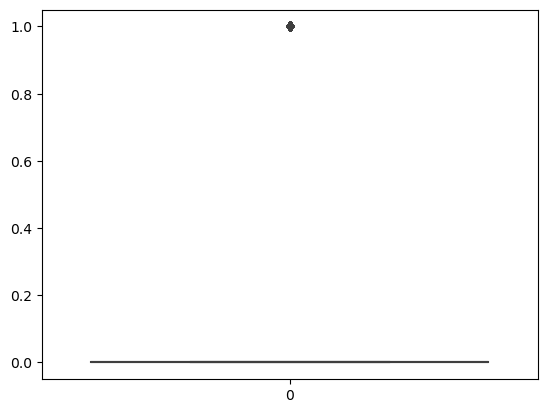

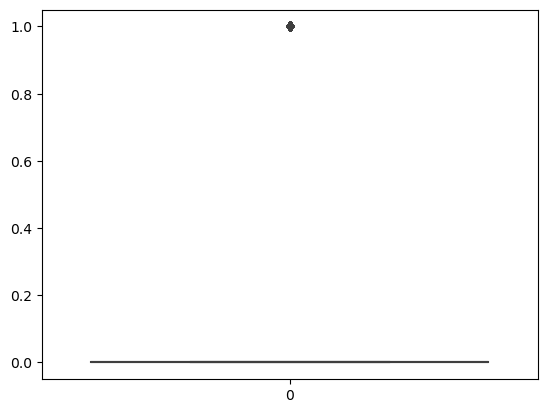

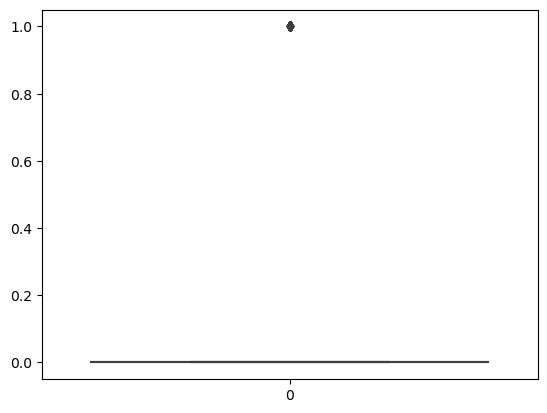

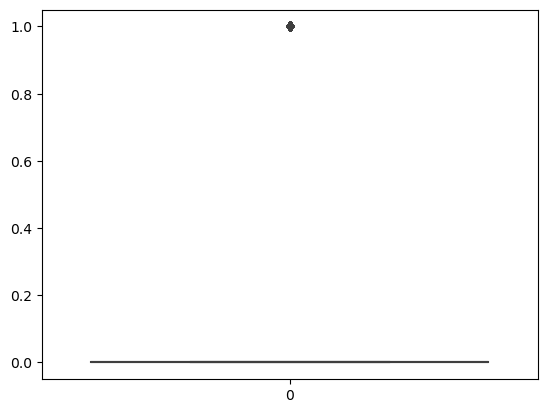

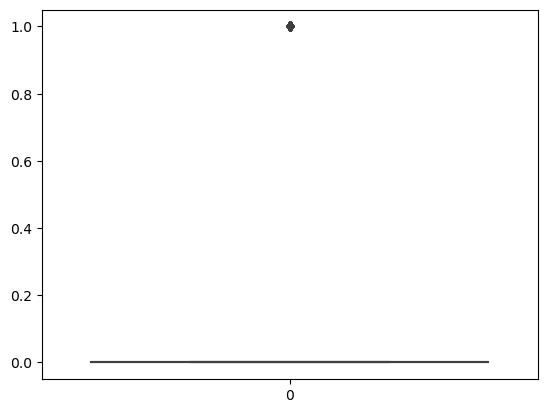

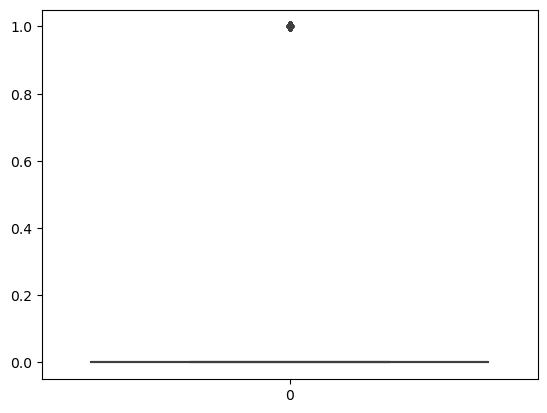

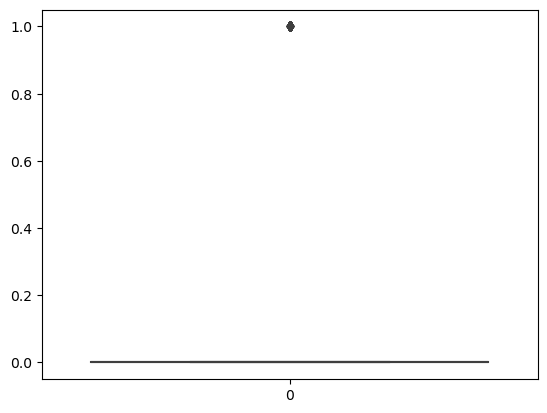

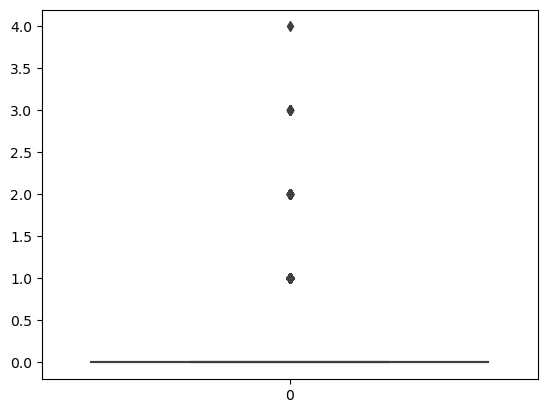

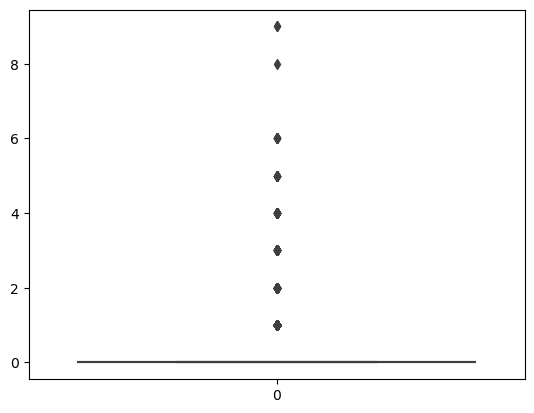

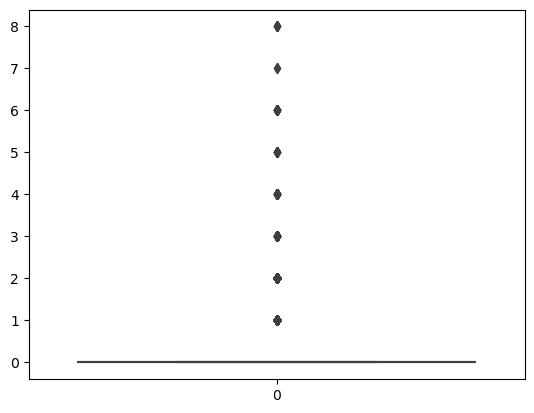

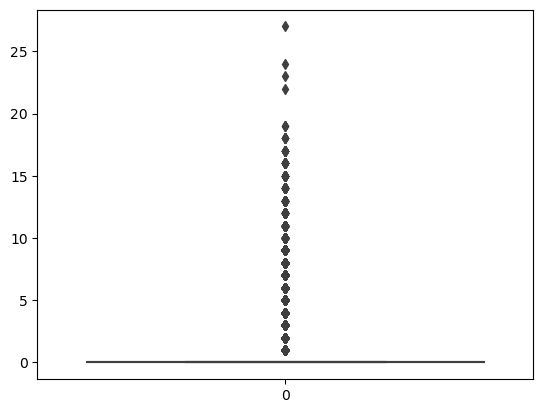

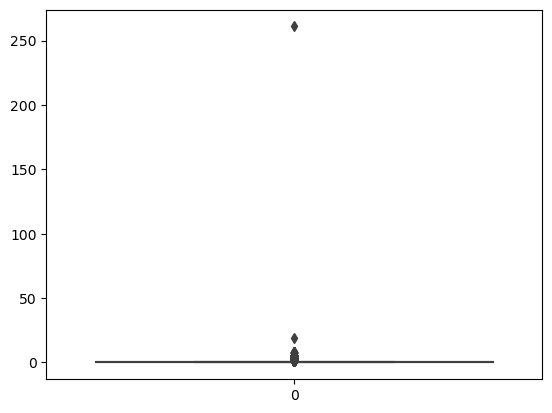

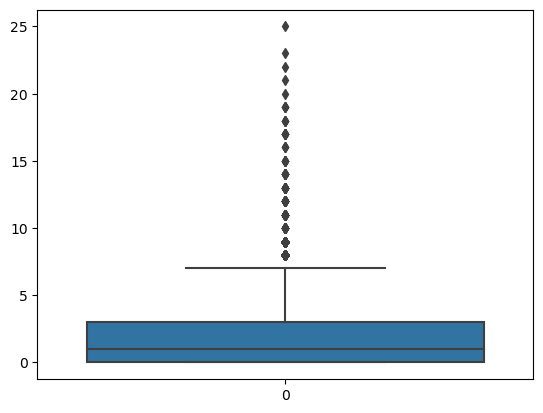

In [17]:
#Let us check for the outliers present in the dataset

for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

* By Subplots

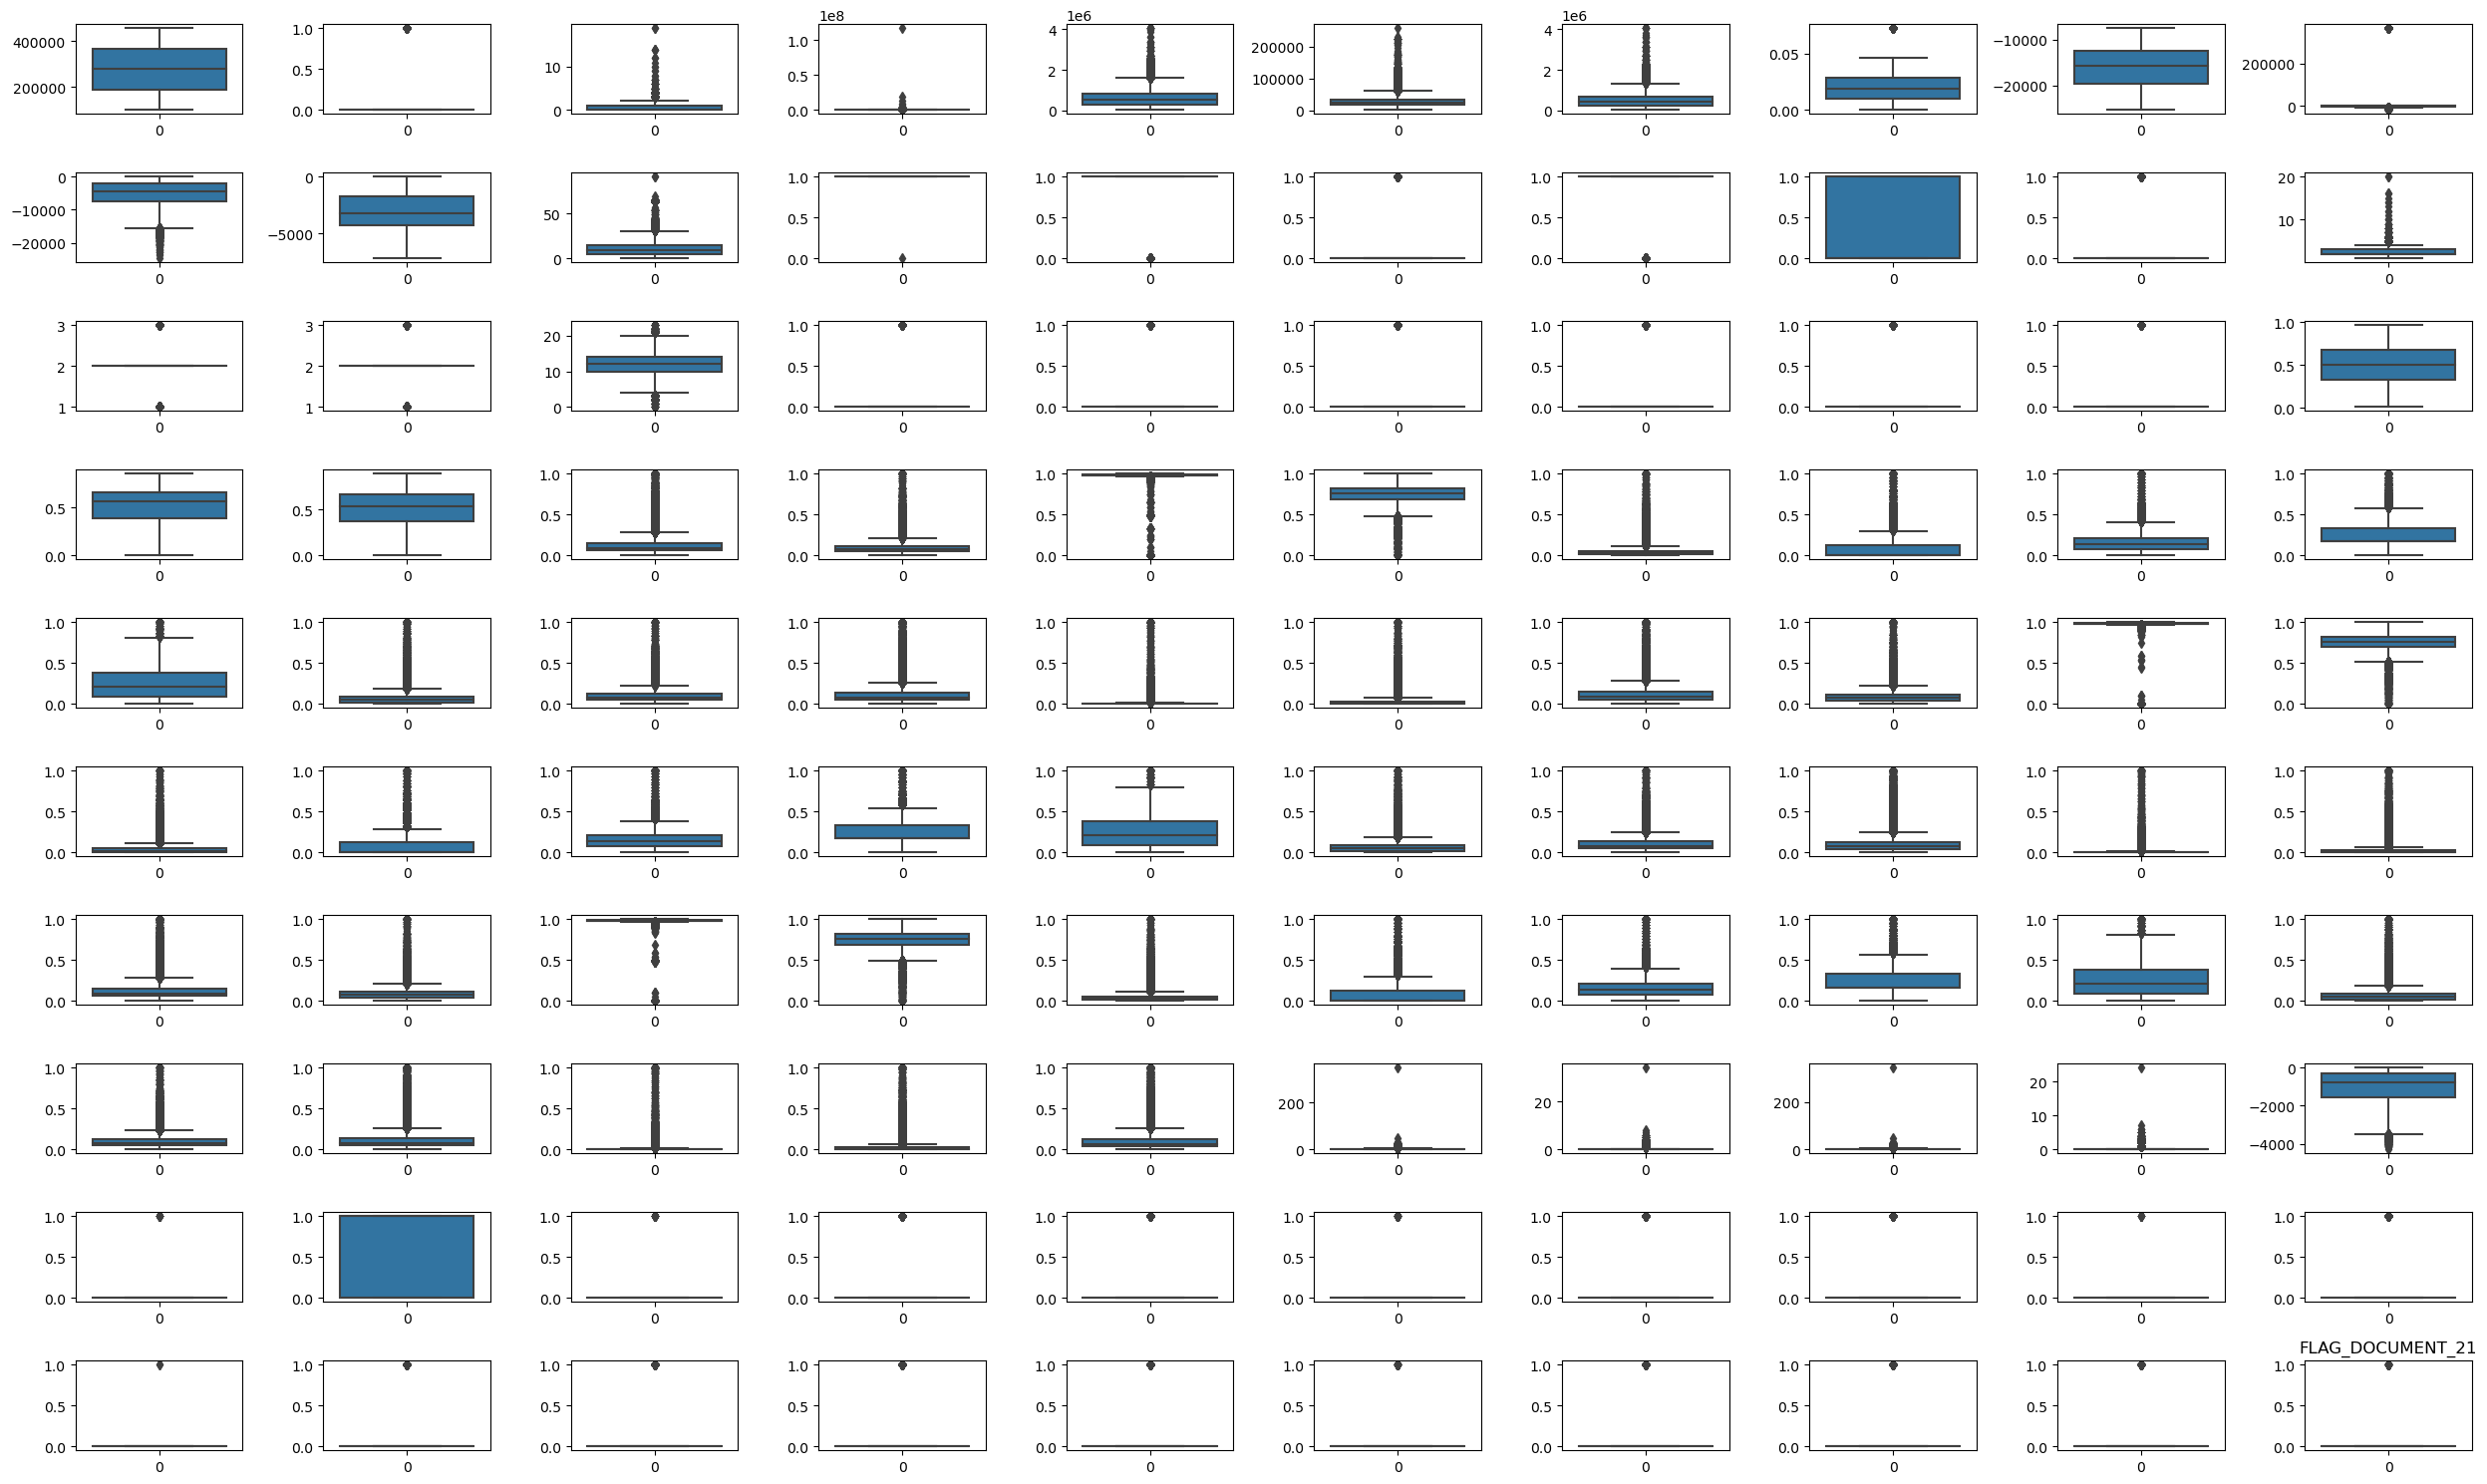

In [18]:
fig, ax = plt.subplots(10, 10, figsize=(25,15))
for i, subplot in zip(df.select_dtypes(np.number).columns, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title(i)
plt.tight_layout();

### THERE ARE OUTLIERS IN OUR DATASET BUT WE ARE KEEPING ALL THE OUTLIERS AS THEY ARE 
### OR MAY BE WE CAN TREAT THEM AT LATER STAGE

### Checking for Imbalance in Target Variable

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


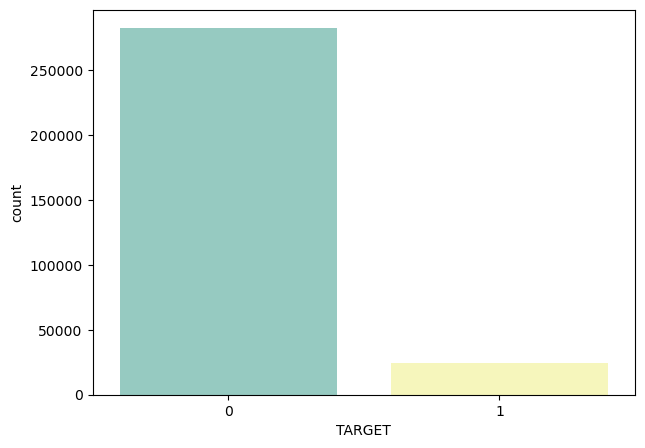

In [19]:
plt.figure(figsize=(7,5))
print(df['TARGET'].value_counts(normalize=True))
sns.countplot(x= df['TARGET'],palette='Set3')
plt.show()

### The 'TARGET' is very imbalanced which is normal and it means around only 8% of the customer aare going to be defaulter

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


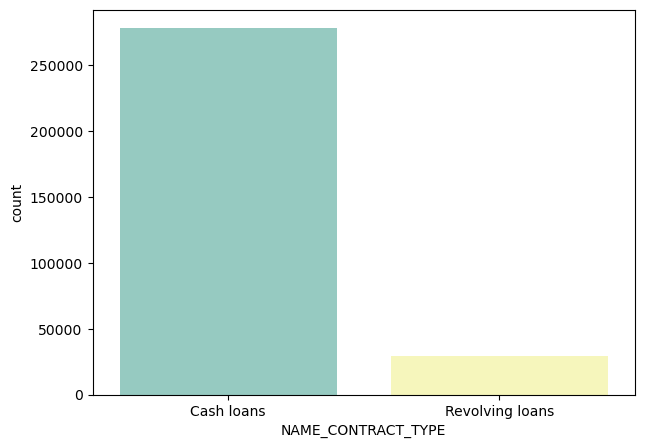

In [20]:
plt.figure(figsize=(7,5))
print(df['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
sns.countplot(x=df['NAME_CONTRACT_TYPE'],palette='Set3')
plt.show()

## Around 90% of the contracts are 'Cash loans' and less than 10% are 'Revolving loans'

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


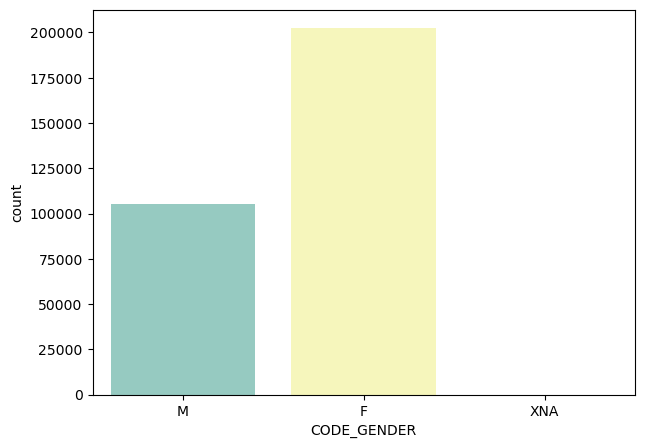

In [21]:
plt.figure(figsize=(7,5))
print(df['CODE_GENDER'].value_counts(normalize=True))
sns.countplot(x=df['CODE_GENDER'],palette='Set3')
plt.show()

### More than 66% of applicants are females in the data

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


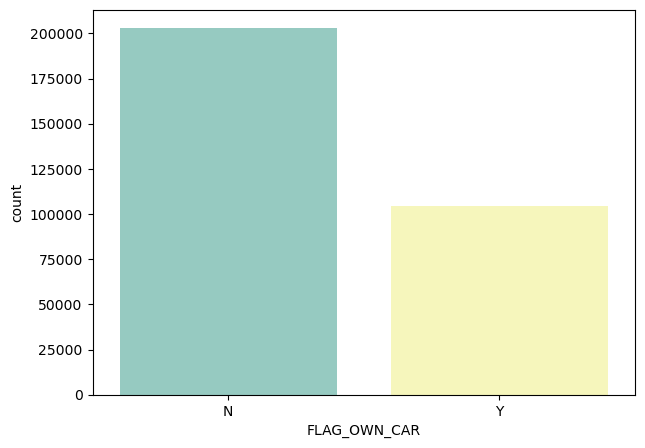

In [22]:
plt.figure(figsize=(7,5))
print(df['FLAG_OWN_CAR'].value_counts(normalize=True))
sns.countplot(x=df['FLAG_OWN_CAR'],palette='Set3')
plt.show()

### Flag if the client owns a car 
### Around 66% of applicants do not have their own car.

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


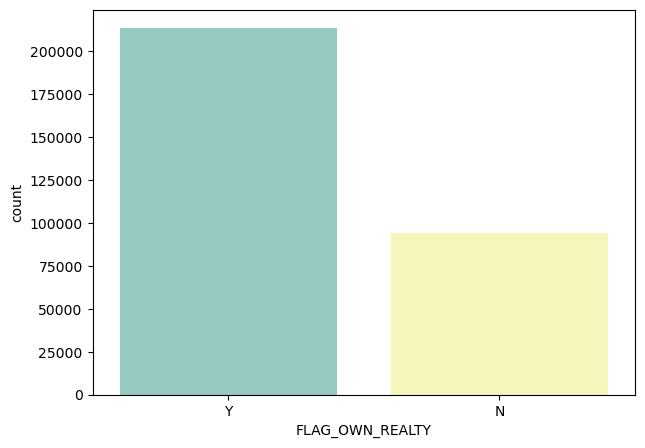

In [23]:
plt.figure(figsize=(7,5))
print(df['FLAG_OWN_REALTY'].value_counts(normalize=True))
sns.countplot(x=df['FLAG_OWN_REALTY'],palette='Set3')
plt.show()

### Flag if client owns a house or flat
### Around 70% of the applicants have their own any real estate.

0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64


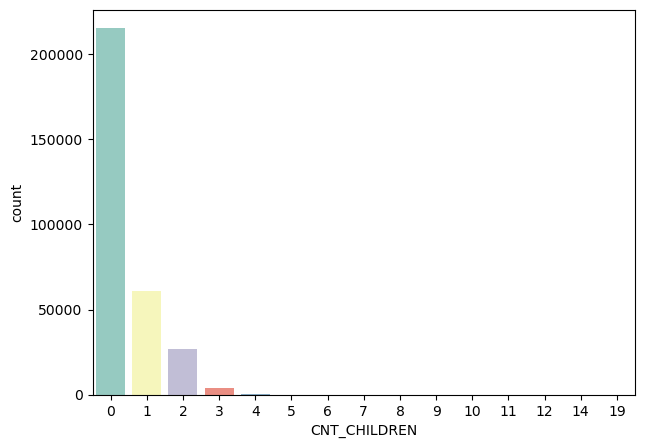

In [24]:
plt.figure(figsize=(7,5))
print(df['CNT_CHILDREN'].value_counts(normalize=True))
sns.countplot(x=df['CNT_CHILDREN'],palette="Set3")
plt.show() #Number of children the client has

# 70 % of the customers dont have children, and approx 20 % of customer have single child.

In [25]:
df['AMT_CREDIT'].mean()

599025.9997057016

# The average Credit amount of the loan is 599026

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64


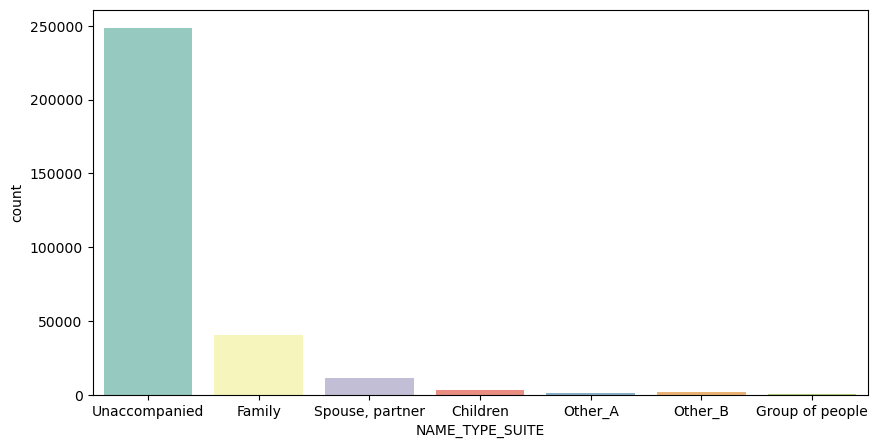

In [26]:
plt.figure(figsize=(10,5))
print(df['NAME_TYPE_SUITE'].value_counts(normalize=True))
sns.countplot(x=df['NAME_TYPE_SUITE'],palette="Set3");


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


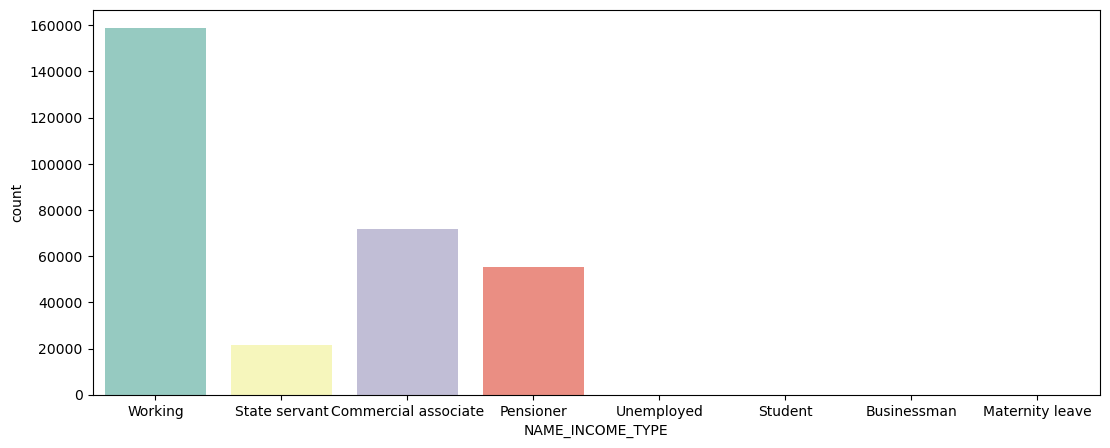

In [27]:
plt.figure(figsize=(13,5))
print(df['NAME_INCOME_TYPE'].value_counts())
sns.countplot(x=df['NAME_INCOME_TYPE'],palette="Set3");


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


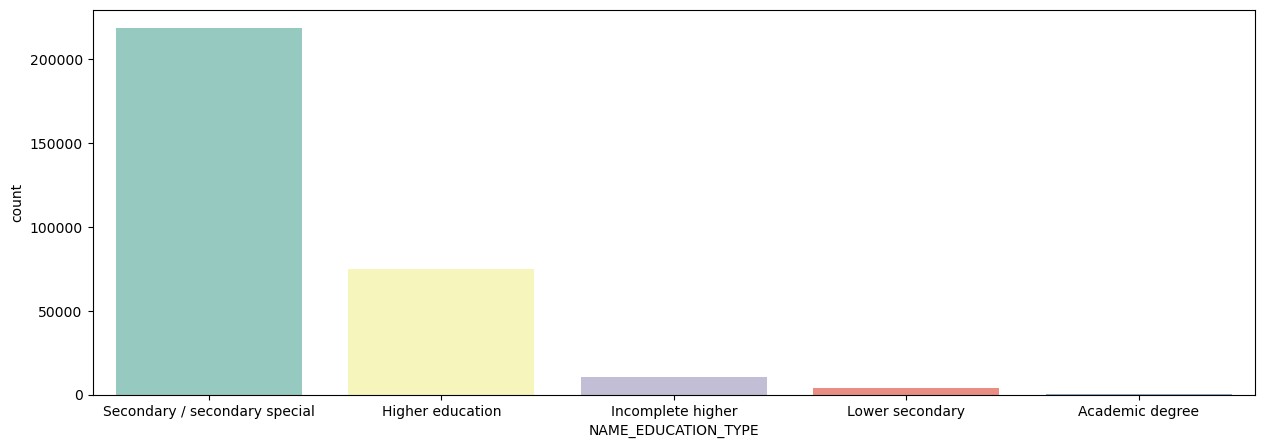

In [28]:
plt.figure(figsize=(15,5))
print(df['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(x=df['NAME_EDUCATION_TYPE'],palette="Set3");


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


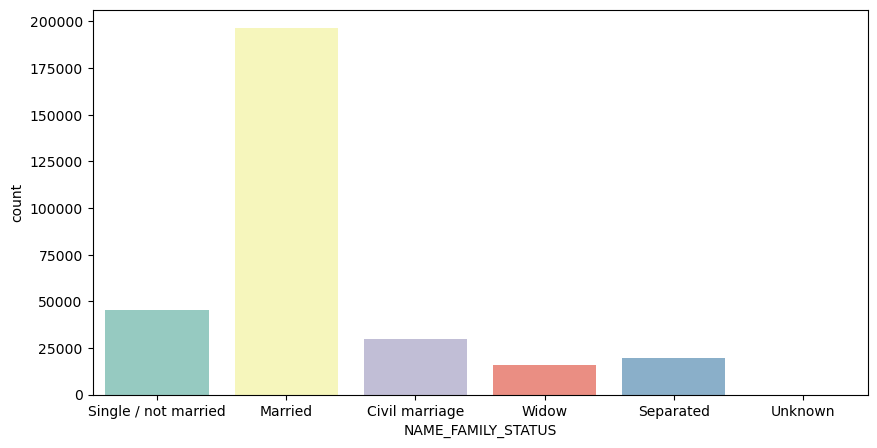

In [29]:
plt.figure(figsize=(10,5))
print(df['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(x=df['NAME_FAMILY_STATUS'],palette="Set3");


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


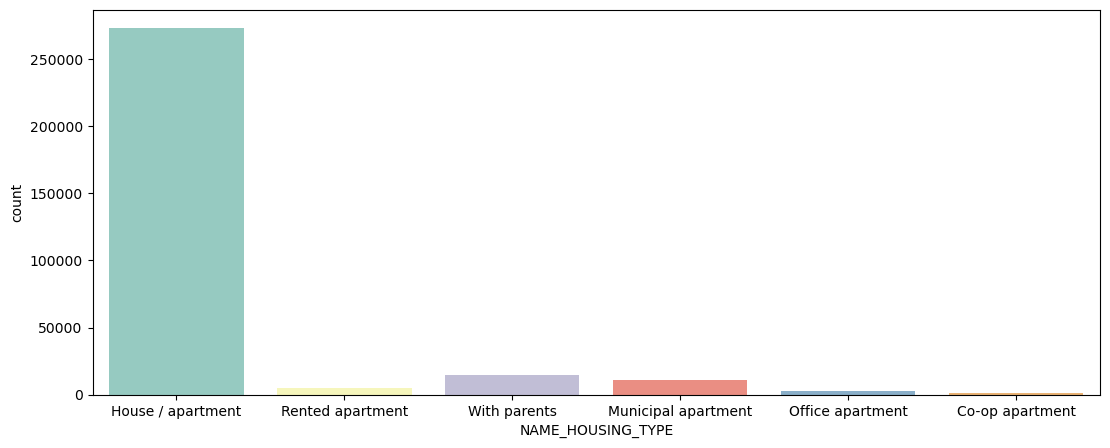

In [30]:
plt.figure(figsize=(13,5))
print(df['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(x=df['NAME_HOUSING_TYPE'],palette="Set3");


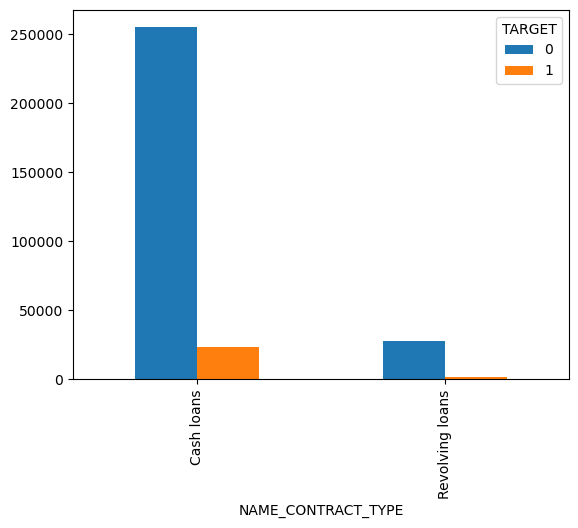

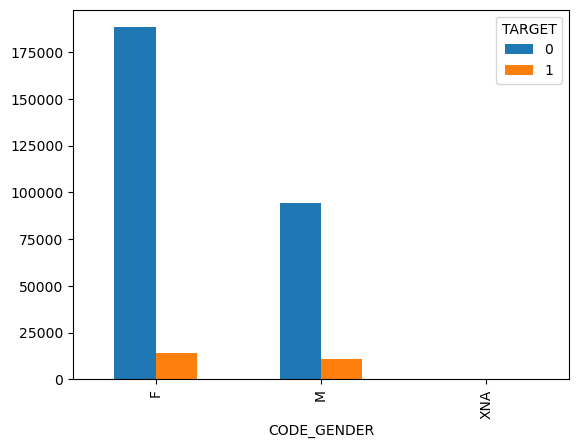

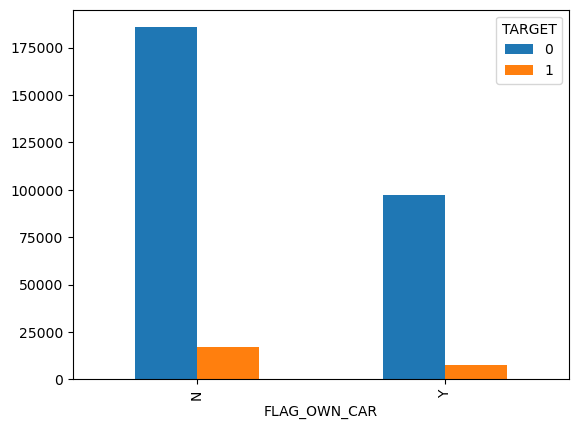

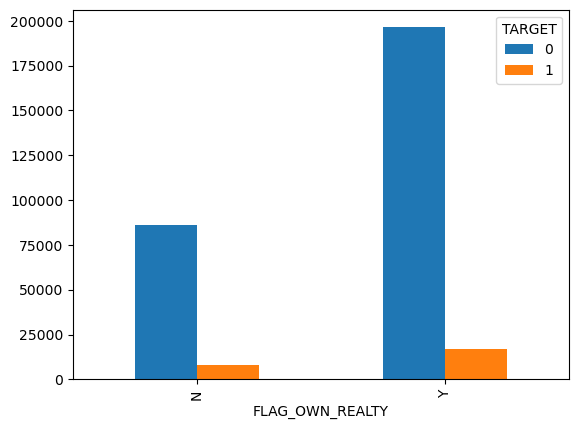

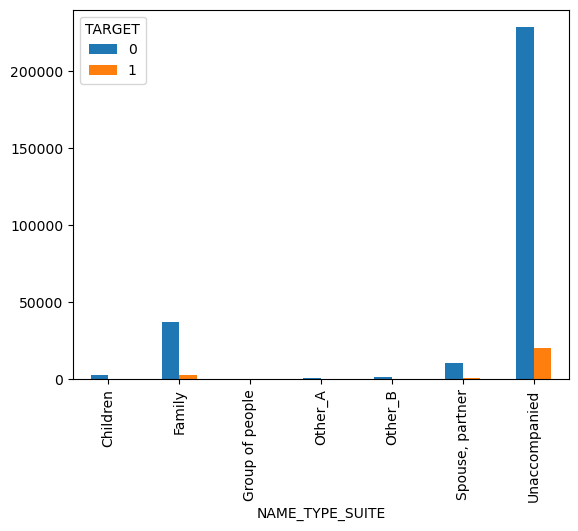

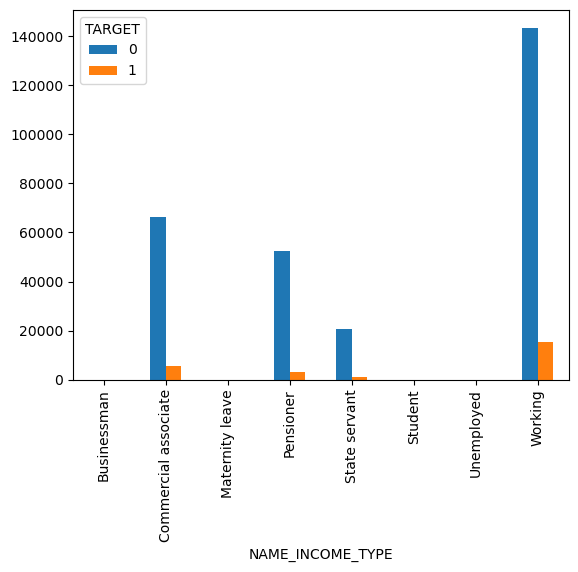

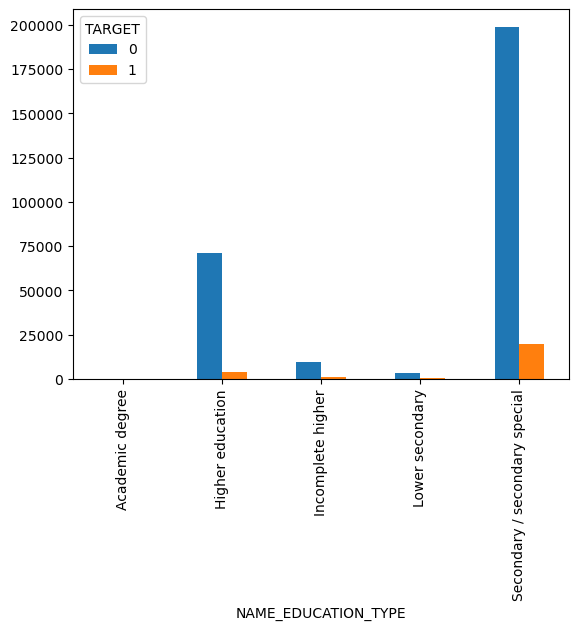

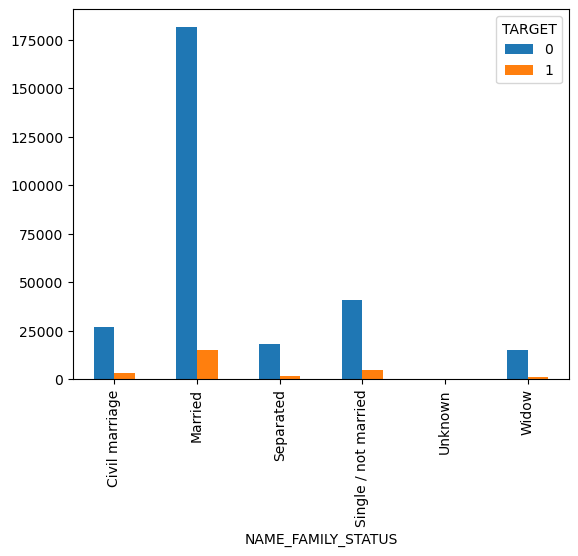

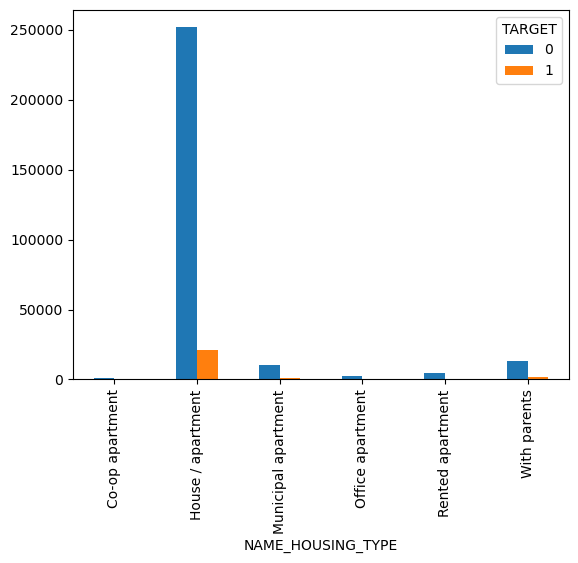

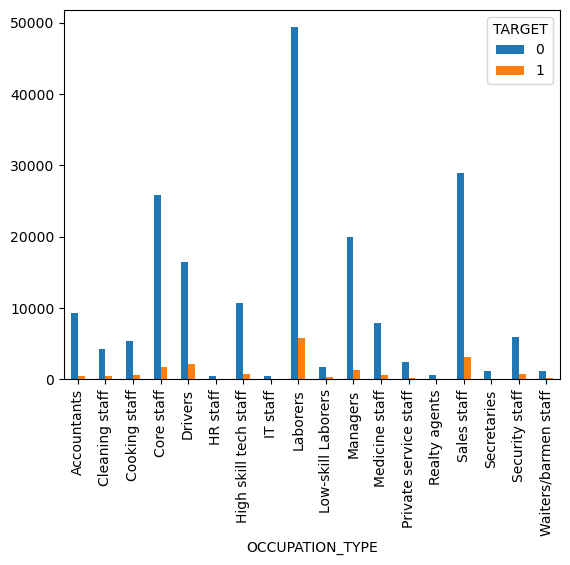

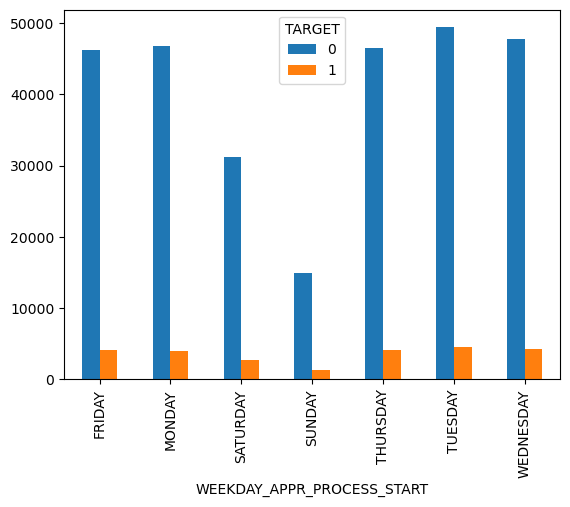

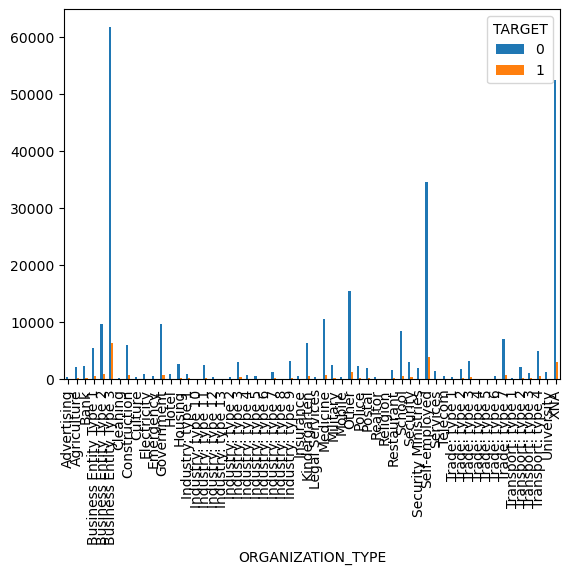

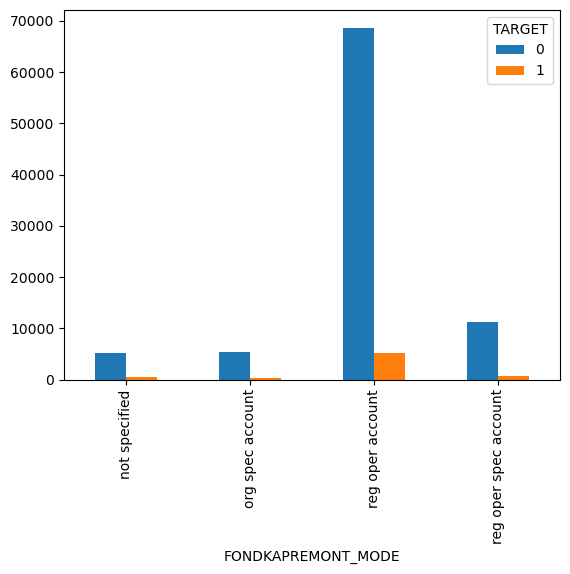

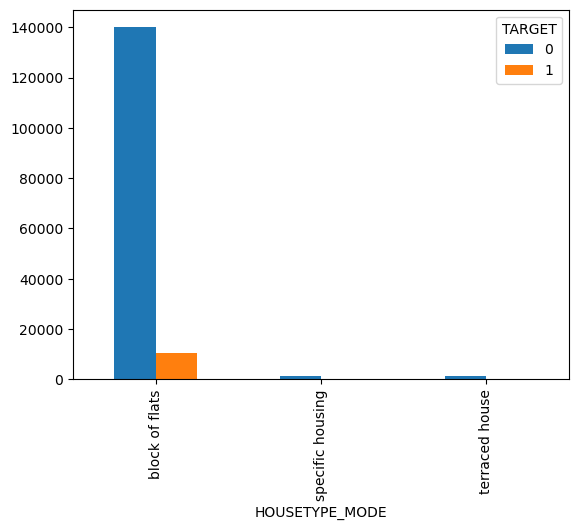

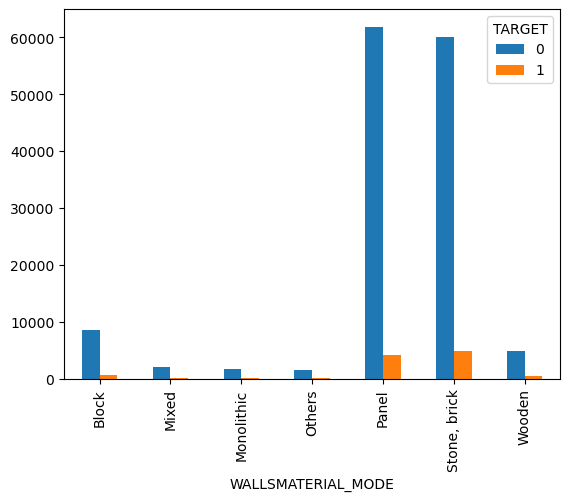

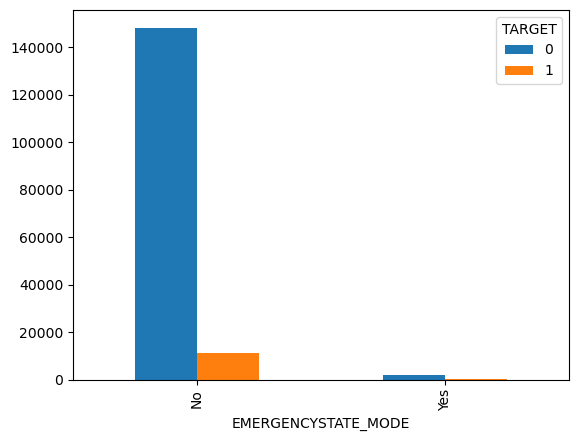

In [31]:
for i in df_cat:
    pd.crosstab(df_cat[i], df['TARGET']).plot(kind='bar');

**Missing Values In Dataset**

In [32]:
missing_data = df.isnull().sum() / len(df) * 100

In [33]:
missing_data = pd.DataFrame(missing_data , columns=['Percentage of null value']).sort_values(ascending=False,
                                                                                             by='Percentage of null value')

In [34]:
missing_data

Percentage of null value
COMMONAREA_MEDI                              69.872297
COMMONAREA_AVG                               69.872297
COMMONAREA_MODE                              69.872297
NONLIVINGAPARTMENTS_MODE                     69.432963
NONLIVINGAPARTMENTS_AVG                      69.432963
NONLIVINGAPARTMENTS_MEDI                     69.432963
FONDKAPREMONT_MODE                           68.386172
LIVINGAPARTMENTS_MODE                        68.354953
LIVINGAPARTMENTS_AVG                         68.354953
LIVINGAPARTMENTS_MEDI                        68.354953
FLOORSMIN_AVG                                67.848630
FLOORSMIN_MODE                               67.848630
FLOORSMIN_MEDI                               67.848630
YEARS_BUILD_MEDI                             66.497784
YEARS_BUILD_MODE                             66.497784
YEARS_BUILD_AVG                              66.497784
OWN_CAR_AGE                                  65.990810
LANDAREA_MEDI                                59.376738
LANDAREA_MODE                                59.376738
LANDAREA_AVG                                 59.376738
BASEMENTAREA_MEDI                            58.515956
BASEMENTAREA_AVG                             58.515956
BASEMENTAREA_MODE                            58.515956
EXT_SOURCE_1                                 56.381073
NONLIVINGAREA_MODE                           55.179164
NONLIVINGAREA_AVG                            55.179164
NONLIVINGAREA_MEDI                           55.179164
ELEVATORS_MEDI                               53.295980
ELEVATORS_AVG                                53.295980
ELEVATORS_MODE                               53.295980
WALLSMATERIAL_MODE                           50.840783
APARTMENTS_MEDI                              50.749729
APARTMENTS_AVG                               50.749729
APARTMENTS_MODE                              50.749729
ENTRANCES_MEDI                               50.348768
ENTRANCES_AVG                                50.348768
ENTRANCES_MODE                               50.348768
LIVINGAREA_AVG                               50.193326
LIVINGAREA_MODE                              50.193326
LIVINGAREA_MEDI                              50.193326
HOUSETYPE_MODE                               50.176091
FLOORSMAX_MODE                               49.760822
FLOORSMAX_MEDI                               49.760822
FLOORSMAX_AVG                                49.760822
YEARS_BEGINEXPLUATATION_MODE                 48.781019
YEARS_BEGINEXPLUATATION_MEDI                 48.781019
YEARS_BEGINEXPLUATATION_AVG                  48.781019
TOTALAREA_MODE                               48.268517
EMERGENCYSTATE_MODE                          47.398304
OCCUPATION_TYPE                              31.345545
EXT_SOURCE_3                                 19.825307
AMT_REQ_CREDIT_BUREAU_HOUR                   13.501631
AMT_REQ_CREDIT_BUREAU_DAY                    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK                   13.501631
AMT_REQ_CREDIT_BUREAU_MON                    13.501631
AMT_REQ_CREDIT_BUREAU_QRT                    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR                   13.501631
NAME_TYPE_SUITE                               0.420148
OBS_30_CNT_SOCIAL_CIRCLE                      0.332021
DEF_30_CNT_SOCIAL_CIRCLE                      0.332021
OBS_60_CNT_SOCIAL_CIRCLE                      0.332021
DEF_60_CNT_SOCIAL_CIRCLE                      0.332021
EXT_SOURCE_2                                  0.214626
AMT_GOODS_PRICE                               0.090403
AMT_ANNUITY                                   0.003902
CNT_FAM_MEMBERS                               0.000650
DAYS_LAST_PHONE_CHANGE                        0.000325
CNT_CHILDREN                                  0.000000
FLAG_DOCUMENT_8                               0.000000
NAME_CONTRACT_TYPE                            0.000000
CODE_GENDER                                   0.000000
FLAG_OWN_CAR                                  0.000000
FLAG_DOCUMENT_2

In [35]:
missing_data[missing_data['Percentage of null value'] > 65].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE'],
      dtype='object')

In [36]:
df.drop(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],axis=1,inplace=True)

### DROPED ALL THE COLUMNS WHICH ARE HAVING MORE THAN 65% NULL ENTRIES

In [37]:
df.shape

(307511, 105)

### LET'S DROP ALL THE COLUMNS WHICH ARE IRRERELVANT FOR THE MODEL BUILDING 
#### COLUMNS ARE CHOSEN AS PER OUR DOMAIN KNOWLEDGE AND LOOKING AT THE REDUNDANCY

In [38]:
df.drop(['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION'
         ,'DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'APARTMENTS_MODE','FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'REGION_RATING_CLIENT',
'BASEMENTAREA_AVG'],axis=1, inplace=True)

In [39]:
df.shape

(307511, 91)

### MISSING VALUE IMPUTATION

In [40]:
for i in df.select_dtypes(np.number).columns:
    df[i]=df[i].fillna(df[i].median())
    

for i in df_cat:
    pd.crosstab(df_cat[i], df['TARGET']).plot(kind='bar');

In [41]:
for i in df.select_dtypes(include=object).columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [42]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_W

### now there are no null values in the dataset

## changing all the categorical variables to numeric variable

In [43]:
df['NAME_CONTRACT_TYPE']=df['NAME_CONTRACT_TYPE'].map({'Cash loans':0 , 'Revolving loans':1})

In [44]:
df['CODE_GENDER']=df['CODE_GENDER'].map({'M':0, 'F':1, 'XNA':2})

In [45]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N':0, 'Y':1})

In [46]:
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

In [47]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].map({'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4, 'Other_B':5, 'Group of people':6})

In [48]:
df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].map({'Working':0, 'State servant':1, 'Commercial associate':2, 'Pensioner':3,
       'Unemployed':4, 'Student':5, 'Businessman':6, 'Maternity leave':7})

In [49]:
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':0, 'Higher education':1,
       'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4})

In [50]:
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map({'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5})

In [51]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].map({'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 'Drivers':4,
       'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17})

In [52]:
df['WEEKDAY_APPR_PROCESS_START']=df['WEEKDAY_APPR_PROCESS_START'].map({'WEDNESDAY':3, 'MONDAY':1, 'THURSDAY':4, 'SUNDAY':0, 'SATURDAY':6, 'FRIDAY':5,
       'TUESDAY':2})

 
#  feature ORGANIZATION_TYPE has a lot of unique values so we will label encode this column

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])

In [54]:
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])

In [55]:
df['HOUSETYPE_MODE']=df['HOUSETYPE_MODE'].map({'block of flats':0, 'terraced house':1, 'specific housing':2})

In [56]:
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].map({'Stone, brick':0, 'Block':1, 'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6})

In [57]:
df['EMERGENCYSTATE_MODE']=df['EMERGENCYSTATE_MODE'].map({'No':0, 'Yes':1})

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 91 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  int64  
 3   CODE_GENDER                   307511 non-null  int64  
 4   FLAG_OWN_CAR                  307511 non-null  int64  
 5   FLAG_OWN_REALTY               307511 non-null  int64  
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  int64  
 12  NAME_INCOME_TYPE              307511 non-nul

In [208]:
df_home = df.copy()

## Now the dataset has no null values and all the datatype of columns are numeric

### Model Building

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [60]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model_lr = lr.fit(x_train,y_train)
y_pred_train = model_lr.predict(x_train)

from sklearn.metrics import classification_report

print(classification_report(y_train , y_pred_train))

y_pred_test = model_lr.predict(x_test)

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197899
           1       0.00      0.00      0.00     17358

    accuracy                           0.92    215257
   macro avg       0.46      0.50      0.48    215257
weighted avg       0.85      0.92      0.88    215257

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.00      0.00      0.00      7467

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.84      0.92      0.88     92254



# The model is working very well but is failing to predict class 1 ,as the data is imbalance.
# we will build  a model further using smot analysis

In [62]:
dtc = DecisionTreeClassifier(random_state = 1)

decision_tree = dtc.fit(x_train,y_train)

In [63]:
from sklearn.metrics import classification_report

train_pred = decision_tree.predict(x_train)
                                                                            ## TRAining 
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197899
           1       1.00      1.00      1.00     17358

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257



In [64]:
### this is an overfit model 
## EVERTHING IS LEARNED ONE TO ONE in the trained Data

In [ ]:
# Now On testing

In [65]:
train_pred = decision_tree.predict(x_test)

print(classification_report(y_test,train_pred))                          ## TEsting

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     84787
           1       0.14      0.16      0.15      7467

    accuracy                           0.85     92254
   macro avg       0.53      0.54      0.54     92254
weighted avg       0.86      0.85      0.86     92254



In [66]:
# in testing data the model is performing good,also predicting the class1 which was not seen inLogistic model.

In [67]:
important_features = pd.DataFrame({'Features':x_train.columns,
                                  'Importance': decision_tree.feature_importances_})

important_features

Features  Importance
0                     SK_ID_CURR    0.057825
1             NAME_CONTRACT_TYPE    0.002111
2                    CODE_GENDER    0.005588
3                   FLAG_OWN_CAR    0.005541
4                FLAG_OWN_REALTY    0.005623
5                   CNT_CHILDREN    0.006303
6               AMT_INCOME_TOTAL    0.035034
7                     AMT_CREDIT    0.032464
8                    AMT_ANNUITY    0.050097
9                AMT_GOODS_PRICE    0.026690
10               NAME_TYPE_SUITE    0.009724
11              NAME_INCOME_TYPE    0.006772
12           NAME_EDUCATION_TYPE    0.006922
13            NAME_FAMILY_STATUS    0.011403
14             NAME_HOUSING_TYPE    0.007662
15                    DAYS_BIRTH    0.055242
16                 DAYS_EMPLOYED    0.048222
17                    FLAG_PHONE    0.004466
18                    FLAG_EMAIL    0.002670
19               OCCUPATION_TYPE    0.019040
20               CNT_FAM_MEMBERS    0.009451
21   REGION_RATING_CLIENT_W_CITY    0.006941
22    WEEKDAY_APPR_PROCESS_START    0.022111
23       HOUR_APPR_PROCESS_START    0.031879
24    REG_REGION_NOT_LIVE_REGION    0.001260
25    REG_REGION_NOT_WORK_REGION    0.001493
26   LIVE_REGION_NOT_WORK_REGION    0.001895
27        REG_CITY_NOT_LIVE_CITY    0.004804
28        REG_CITY_NOT_WORK_CITY    0.003979
29       LIVE_CITY_NOT_WORK_CITY    0.004445
30             ORGANIZATION_TYPE    0.025079
31                  EXT_SOURCE_1    0.037702
32                  EXT_SOURCE_2    0.087591
33                  EXT_SOURCE_3    0.066367
34                APARTMENTS_AVG    0.008780
35   YEARS_BEGINEXPLUATATION_AVG    0.007221
36                 ELEVATORS_AVG    0.001358
37                 ENTRANCES_AVG    0.004656
38                 FLOORSMAX_AVG    0.002973
39                  LANDAREA_AVG    0.006871
40                LIVINGAREA_AVG    0.007609
41             NONLIVINGAREA_AVG    0.007167
42             BASEMENTAREA_MODE    0.008878
43  YEARS_BEGINEXPLUATATION_MODE    0.010225
44                ELEVATORS_MODE    0.001002
45                ENTRANCES_MODE    0.003970
46                FLOORSMAX_MODE    0.003356
47                 LANDAREA_MODE    0.008296
48               LIVINGAREA_MODE    0.008126
49            NONLIVINGAREA_MODE    0.006728
50               APARTMENTS_MEDI    0.007110
51             BASEMENTAREA_MEDI    0.009447
52  YEARS_BEGINEXPLUATATION_MEDI    0.008634
53                ELEVATORS_MEDI    0.001557
54                ENTRANCES_MEDI    0.003638
55                FLOORSMAX_MEDI    0.003312
56                 LANDAREA_MEDI    0.007130
57               LIVINGAREA_MEDI    0.007283
58            NONLIVINGAREA_MEDI    0.005591
59                HOUSETYPE_MODE    0.001275
60                TOTALAREA_MODE    0.012316
61            WALLSMATERIAL_MODE    0.004928
62           EMERGENCYSTATE_MODE    0.000760
63      OBS_60_CNT_SOCIAL_CIRCLE    0.020854
64      DEF_60_CNT_SOCIAL_CIRCLE    0.007356
65        DAYS_LAST_PHONE_CHANGE    0.047344
66               FLAG_DOCUMENT_2    0.000083
67               FLAG_DOCUMENT_3    0.003972
68               FLAG_DOCUMENT_4    0.000000
69               FLAG_DOCUMENT_5    0.001911
70               FLAG_DOCUMENT_6    0.002202
71               FLAG_DOCUMENT_7    0.000028
72               FLAG_DOCUMENT_8    0.002106
73               FLAG_DOCUMENT_9    0.000448
74              FLAG_DOCUMENT_10    0.000000
75              FLAG_DOCUMENT_11    0.000598
76              FLAG_DOCUMENT_12    0.000000
77              FLAG_DOCUMENT_13    0.000101
78              FLAG_DOCUMENT_14    0.000130
79              FLAG_DOCUMENT_15    0.000028
80              FLAG_DOCUMENT_16    0.000957
81              FLAG_DOCUMENT_17    0.000000
82              FLAG_DOCUMENT_18    0.000884
83              FLAG_DOCUMENT_19    0.000184
84              FLAG_DOCUMENT_20    0.000226
85              FLAG_DOCUMENT_21    0.000140
86     AMT_REQ_CREDIT_BUREAU_DAY    0.001200
87     AMT_REQ_CREDIT_BUREAU_MON    0.006573
88     AMT_REQ_CRED

In [68]:
important_features = important_features.sort_values('Importance',ascending=False)

<Axes: xlabel='Importance', ylabel='Features'>

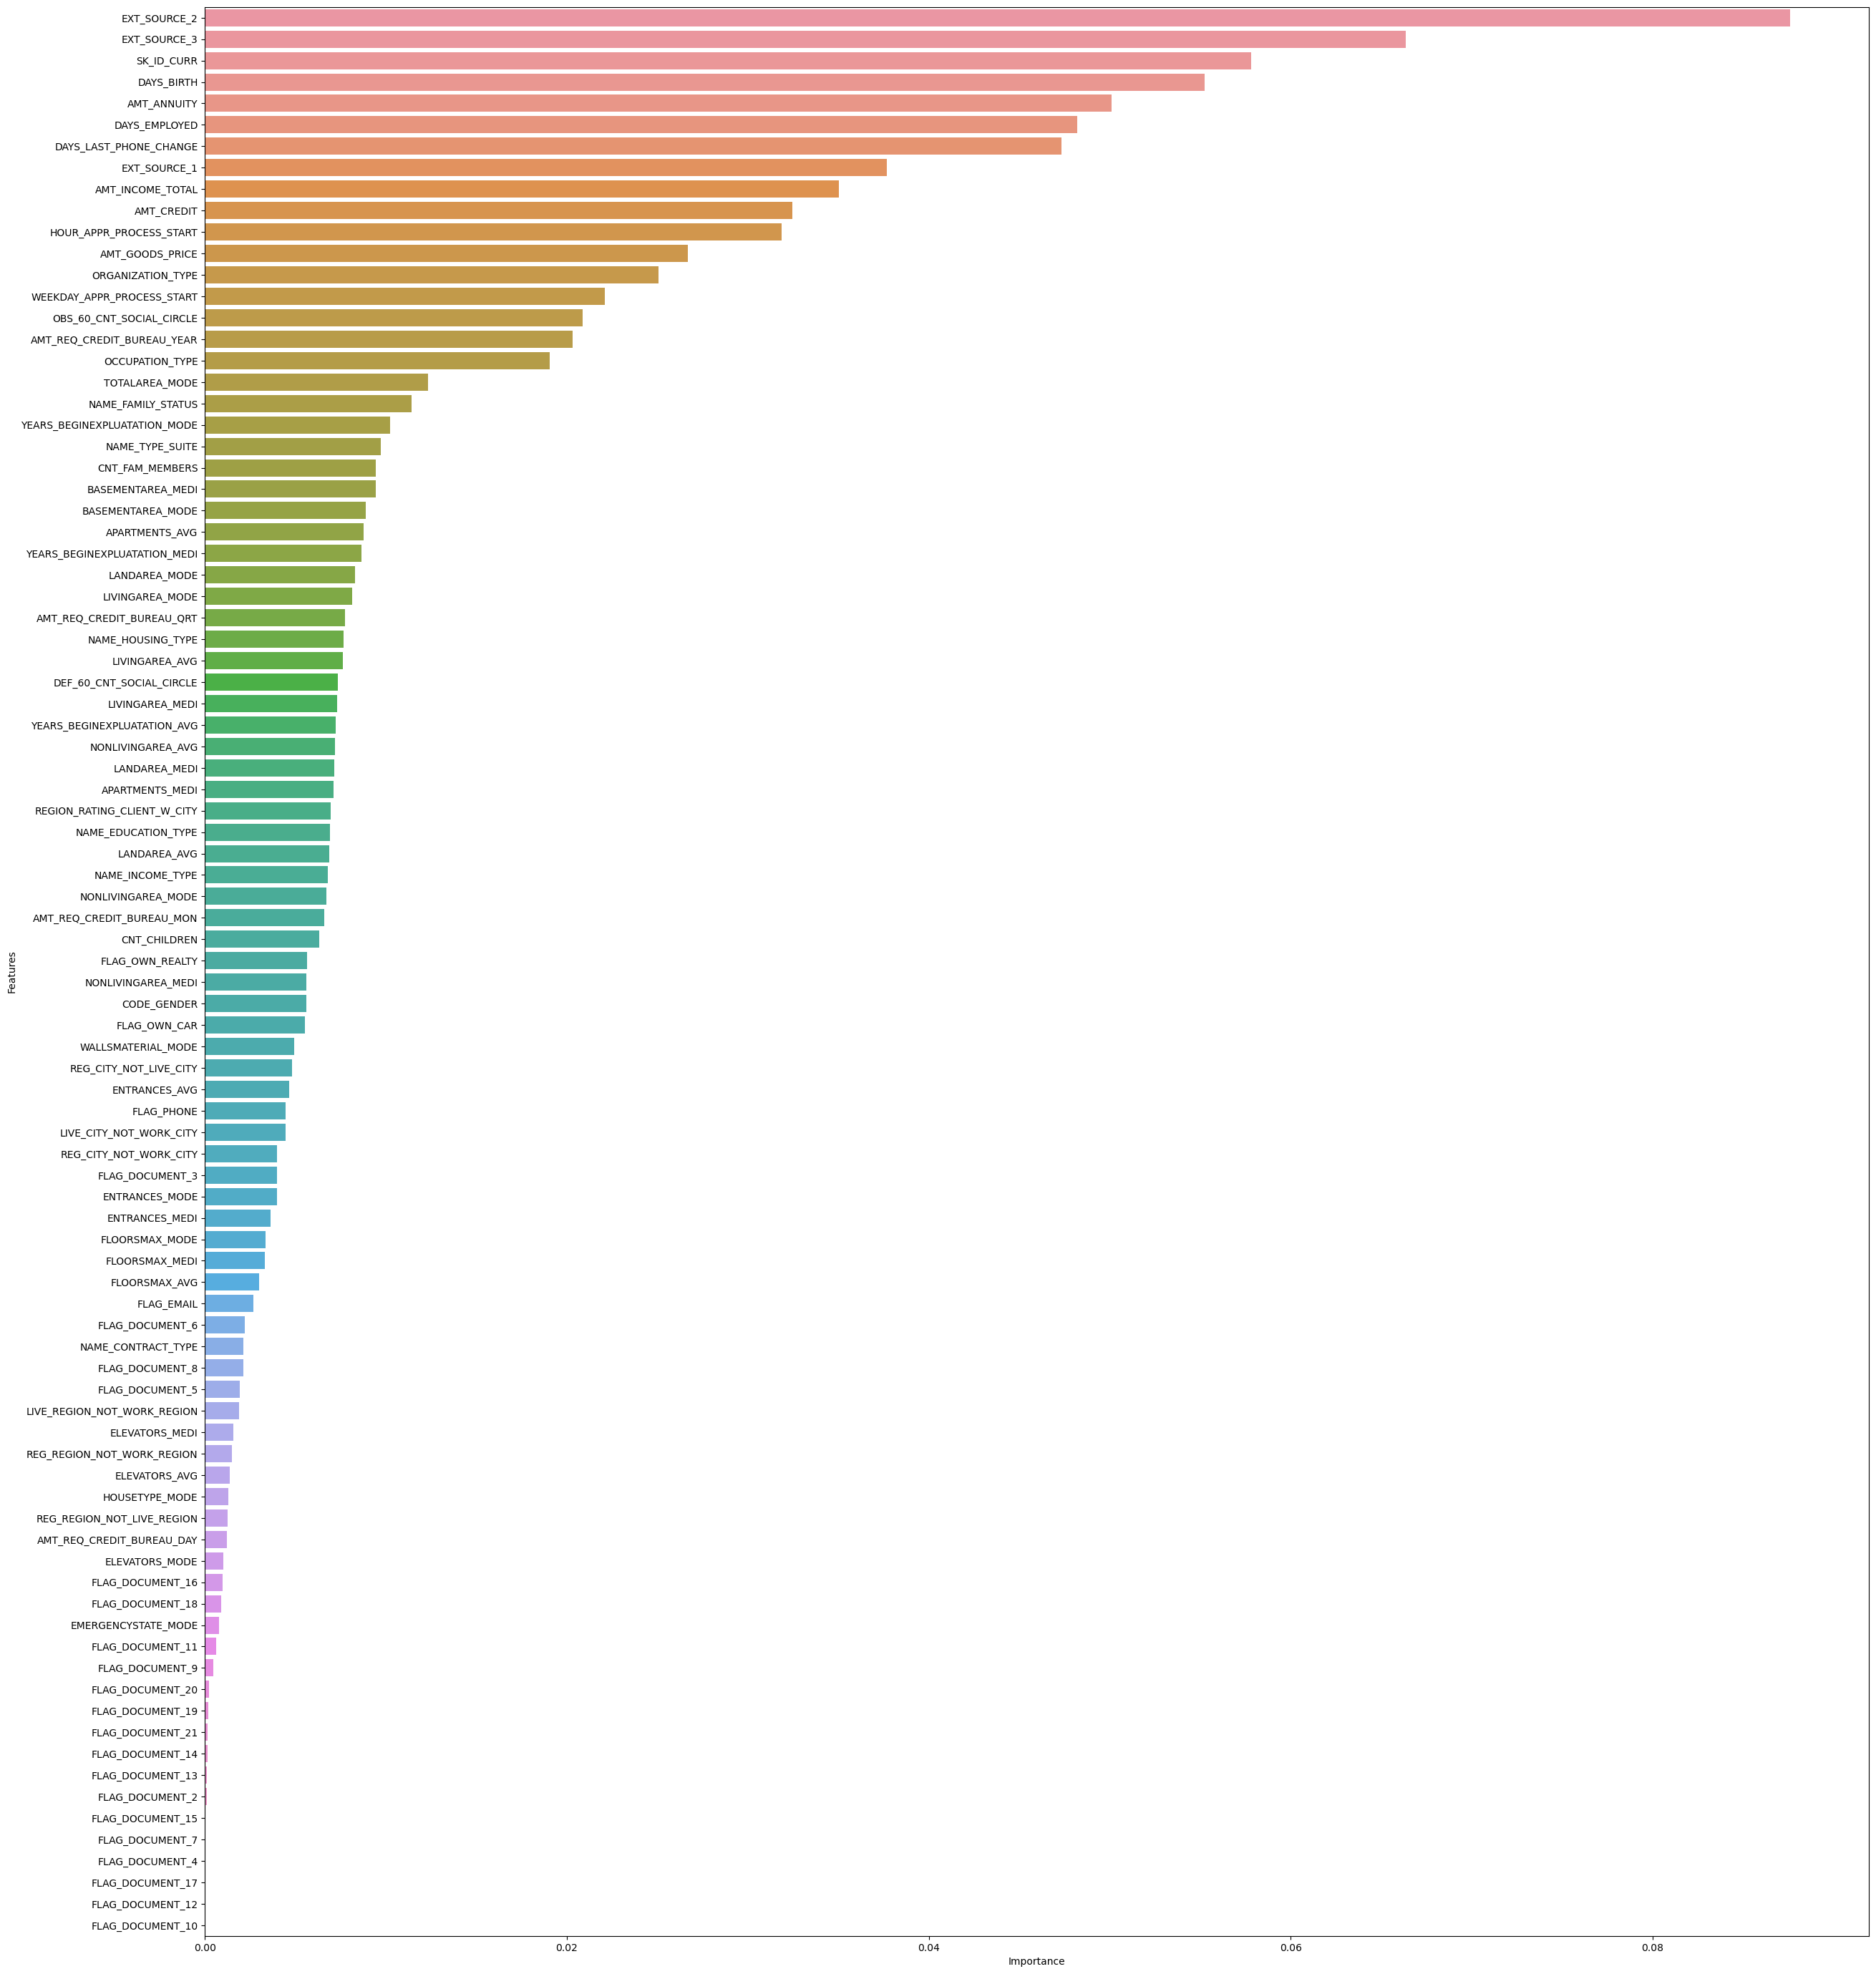

In [69]:
plt.figure(figsize=(30,35))
sns.barplot(x='Importance',y='Features',data=important_features);

* Above Plot shows an Important features.

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_classification =RandomForestClassifier(n_estimators=10 , random_state=10)

rf_model = rf_classification.fit(x_train , y_train)


In [72]:
train_pred=rf_model.predict(x_train)

print(classification_report(y_train,train_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    197899
           1       1.00      0.82      0.90     17358

    accuracy                           0.99    215257
   macro avg       0.99      0.91      0.95    215257
weighted avg       0.99      0.99      0.99    215257



In [73]:

test_pred=rf_model.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.36      0.01      0.02      7467

    accuracy                           0.92     92254
   macro avg       0.64      0.51      0.49     92254
weighted avg       0.87      0.92      0.88     92254



In [74]:
# Random forest is giving us value 0.36 precision for class 1 but recall and f1 score is very low.

In [75]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [76]:
import matplotlib.pyplot as plt

In [77]:
plt.rcParams['figure.figsize']=[15,8]

In [78]:
from sklearn.metrics import roc_auc_score,roc_curve

### Base Model

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197899
           1       1.00      1.00      1.00     17358

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257

Test:               precision    recall  f1-score   support

           0       0.93      0.91      0.92     84787
           1       0.14      0.16      0.15      7467

    accuracy                           0.85     92254
   macro avg       0.53      0.54      0.54     92254
weighted avg       0.86      0.85      0.86     92254



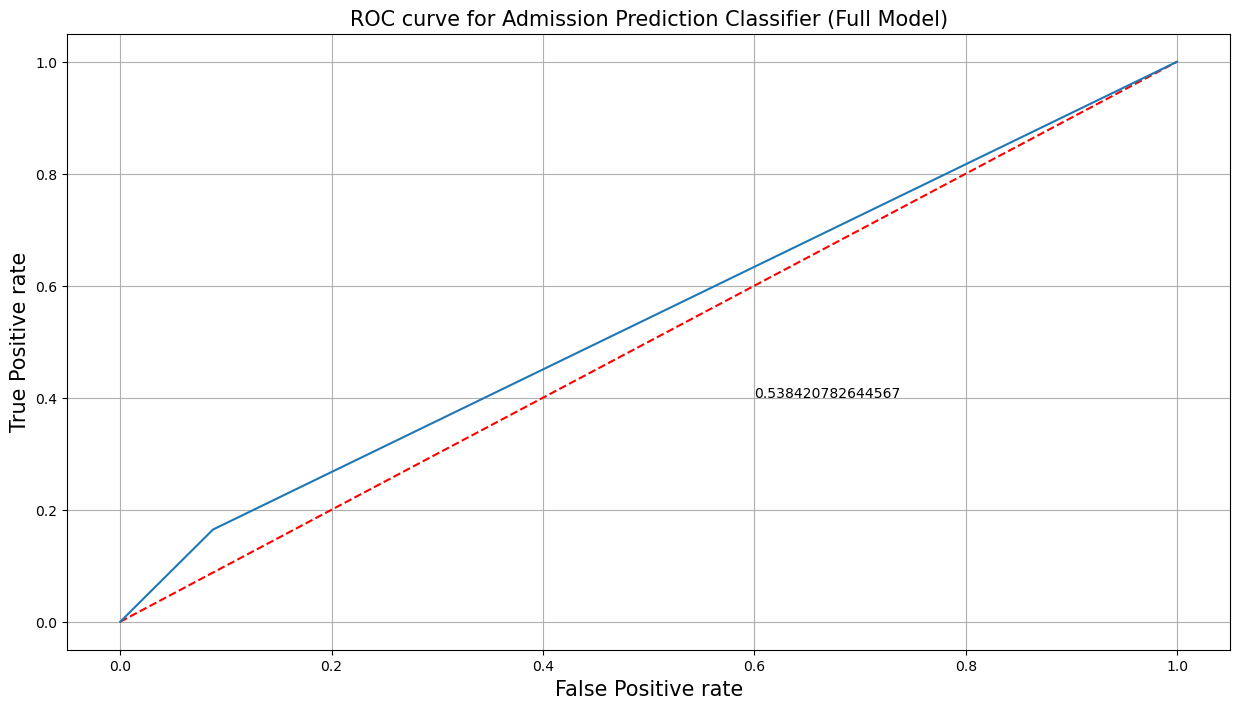

In [80]:
dtc=DecisionTreeClassifier(random_state = 1)
model = dtc.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('Train:',classification_report(y_train,y_train_pred))
print('Test:',classification_report(y_test,y_test_pred))
pred_prob = model.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,model.predict(x_test))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize= 15)
plt.xlabel("False Positive rate", fontsize=15)
plt.ylabel("True Positive rate", fontsize=15)
plt.text(x=0.6,y=0.4,s=roc_auc_score(y_test,model.predict(x_test)))
plt.grid()

In [81]:
df.shape

(307511, 91)

In [82]:
df.drop('SK_ID_CURR',axis=1, inplace=True)

In [83]:
df.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            0             0                1   
1       0                   0            1             0                0   
2       0                   1            0             1                1   
3       0                   0            1             0                1   
4       0                   0            0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   
1                1                 1                    1                   1   
2                0                 0                    0                   0   
3                0                 0                    0                   2   
4                0                 0                    0                   0   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  \
0                  1       -9461           -637           1           0   
1                  1      -16765          -1188           1           0   
2                  1      -19046           -225           1           0   
3                  1      -19005          -3039           0           0   
4                  1      -19932          -3038           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
0                0              1.0                            2   
1                1              2.0                            1   
2                0              1.0                            2   
3                0              2.0                            2   
4                1              1.0                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           3                       10   
1                           1                       11   
2                           1                        9   
3                           3                       17   
4                           4                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0                       0                        0                  5   
1                       0                        0                 39   
2                       0                        0                 11   
3                       0                        0                  5   
4                       1                        1                 37   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
0      0.083037      0.262949      0.139376          0.0247   
1      0.311267      0.622246      0.535276          0.0959   
2      0.505998      0.55

In [84]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

for i in df.drop('TARGET',axis=1).select_dtypes(np.number).columns:
    df[i]=ss.fit_transform(df[[i]])

In [85]:
df.head(2)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1           -0.324395    -1.388135     -0.717914         0.664531   
1       0           -0.324395     0.720307     -0.717914        -1.504820   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577538          0.142129   -0.478095    -0.166143        -0.507236   
1     -0.577538          0.426792    1.725450     0.592683         1.600873   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0        -0.392408         -0.889689            -0.570906            -1.26454   
1         1.000526         -0.063874             1.061891            -0.25013   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  \
0          -0.305298    1.506880      -0.456215    1.599337   -0.245215   
1          -0.305298   -0.166821      -0.460115    1.599337   -0.245215   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
0        -0.724181        -1.265722                    -0.062699   
1        -0.445001        -0.167638                    -2.051813   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   -0.090510                -0.631821   
1                   -1.227674                -0.325620   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                   -0.124004                   -0.231267   
1                   -0.124004                   -0.231267   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                    -0.205869               -0.291208   
1                    -0.205869               -0.291208   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0               -0.547236                -0.467814          -1.194830   
1               -0.547236                -0.467814           0.466663   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
0     -3.021877     -1.317940     -2.153651       -1.002379   
1     -1.384737      0.564482      0.112063       -0.082629   

   YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
0                    -0.174890      -0.368513      -1.056903      -1.061562   
1                     0.129151       0.431106      -1.544566       0.890461   

   LANDAREA_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  BASEMENTAREA_MODE  \
0     -0.354333       -0.901454          -0.305255          -0.762148   
1     -0.809463       -0.451266          -0.101705          -0.478647   

   YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
0                     -0.152958       -0.355991       -1.017906   
1                      0.125838        0.468762       -1.502149   

   FLOORSMAX_MODE  LANDAREA_MODE  LIVINGAREA_MODE  NONLIVINGAREA_MODE  \
0       -1.054484      -0.299968        -0.864156           -0.260796   
1        0.919231      -0.770249        -0.422615           -0.260796   

   APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  \
0        -0.983920          -0.824940                     -0.173135   
1        -0.065124          -0.524568                      0.127494   

   ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  LANDAREA_MEDI  \
0       -0.365348       -1.050292       -1.057404      -0.351885   
1        0.436172       -1.536558        0.890300      -0.809084   

   LIVINGAREA_MEDI  NONLIVINGAREA_MEDI  HOUSETYPE_MODE  TOTALAREA_MODE  \
0        -0.893694           -0.295539       -0.089782       -0.902008   
1        -0.443071           -0.089820       -0.089782       -0.187810   

   WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  OBS_60_CNT_SOCIAL_CIRCLE  \
0           -1.669056             -0.08734                  0.252132   
1           -0.644906             -0.08734                 -0.168527   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
0                  5.253260               -0.206992        -0.006502   
1                 -0.275663    

In [80]:
# Separate majority and minority classes
majority_class = df[df['TARGET'] == 0]
minority_class = df[df['TARGET'] == 1]

### Under Sampling to balance target feature

In [81]:
from sklearn.utils import resample

# Downsample the majority class
n_samples = len(minority_class)
downsampled_majority = resample(majority_class, replace=False, n_samples=80000, random_state=42)

# Combine the downsampled majority class and the minority class
balanced_data = pd.concat([downsampled_majority, minority_class])

# Your balanced dataset is now in 'balanced_data' variable

In [82]:
balanced_data.shape

(104825, 90)

In [83]:
balanced_data.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
201622       0           -0.324395    -1.388135      1.392925   
8728         0            3.082659     0.720307     -0.717914   
152555       0            3.082659     0.720307      1.392925   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
201622         0.664531      0.807273          0.521679    1.250898   
8728           0.664531     -0.577538          0.426792    0.300564   
152555         0.664531      0.807273         -0.142533   -0.593868   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
201622     0.362613         1.527759         1.000526         -0.889689   
8728       0.613485         0.491983        -0.392408          1.587756   
152555    -0.628456        -0.482865        -0.392408         -0.889689   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
201622            -0.570906           -0.250130          -0.305298   
8728               2.694687           -0.250130          -0.305298   
152555             1.061891            1.778691          -0.305298   

        DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
201622    0.979380      -0.456576    1.599337   -0.245215         0.392538   
8728     -1.641163       2.133617   -0.625259   -0.245215        -0.724181   
152555   -0.716778      -0.475999   -0.625259    4.078050         0.113358   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
201622         0.930446                     1.926416   
8728          -0.167638                    -2.051813   
152555        -0.167638                    -0.062699   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
201622                    0.478073                -0.938022   
8728                      1.046655                -0.631821   
152555                   -1.796256                 0.286782   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
201622                   -0.124004                   -0.231267   
8728                     -0.124004                   -0.231267   
152555                   -0.124004                   -0.231267   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
201622                    -0.205869               -0.291208   
8728                      -0.205869               -0.291208   
152555                    -0.205869               -0.291208   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
201622               -0.547236                -0.467814           1.199675   
8728                 -0.547236                -0.467814           1.346277   
152555               -0.547236                -0.467814          -1.194830   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
201622      0.012103      0.532741      0.775832        2.473811   
8728        0.012103      1.121164      0.700194       -0.335819   
152555      2.161077      0.803948     -2.331917        1.728452   

        YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
201622                     0.223427       2.430153       1.380002   
8728                      -0.047617      -0.208589      -0.326114   
152555                     0.294135       2.030343       0.892338   

        FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  \
201622       1.670708      1.506177       -0.330881          -0.247098   
8728        -0.085551      0.081754       -0.285737          -0.305255   
152555       1.670708      0.858712        2.131988           0.081075   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  \
201622           2.323435                      0.212287        2.529621   
8728            -0.571928                     -0.088121       -0.355991   
152555           1.855202                      0.277123        2.117244   

        ENTRANCES_MODE  FLOORSMAX_MODE  LANDAREA_MODE  LIVINGAREA_MODE  \
201622        1.401907        1.7081

In [84]:
balanced_data['TARGET'].value_counts()

0    80000
1    24825
Name: TARGET, dtype: int64

In [85]:
balanced_data['TARGET'].value_counts(normalize=True)*100

0    76.317672
1    23.682328
Name: TARGET, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [87]:
x=balanced_data.drop('TARGET',axis=1)
y=balanced_data['TARGET']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### LogisticRegression Model on Under sampling

In [88]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model_lr = lr.fit(x_train,y_train)
y_pred_train = model_lr.predict(x_train)

from sklearn.metrics import classification_report

print(classification_report(y_train , y_pred_train))

y_pred_test = model_lr.predict(x_test)

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     55926
           1       0.59      0.21      0.31     17451

    accuracy                           0.78     73377
   macro avg       0.69      0.58      0.59     73377
weighted avg       0.75      0.78      0.73     73377

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     24074
           1       0.59      0.20      0.30      7374

    accuracy                           0.78     31448
   macro avg       0.69      0.58      0.58     31448
weighted avg       0.75      0.78      0.74     31448



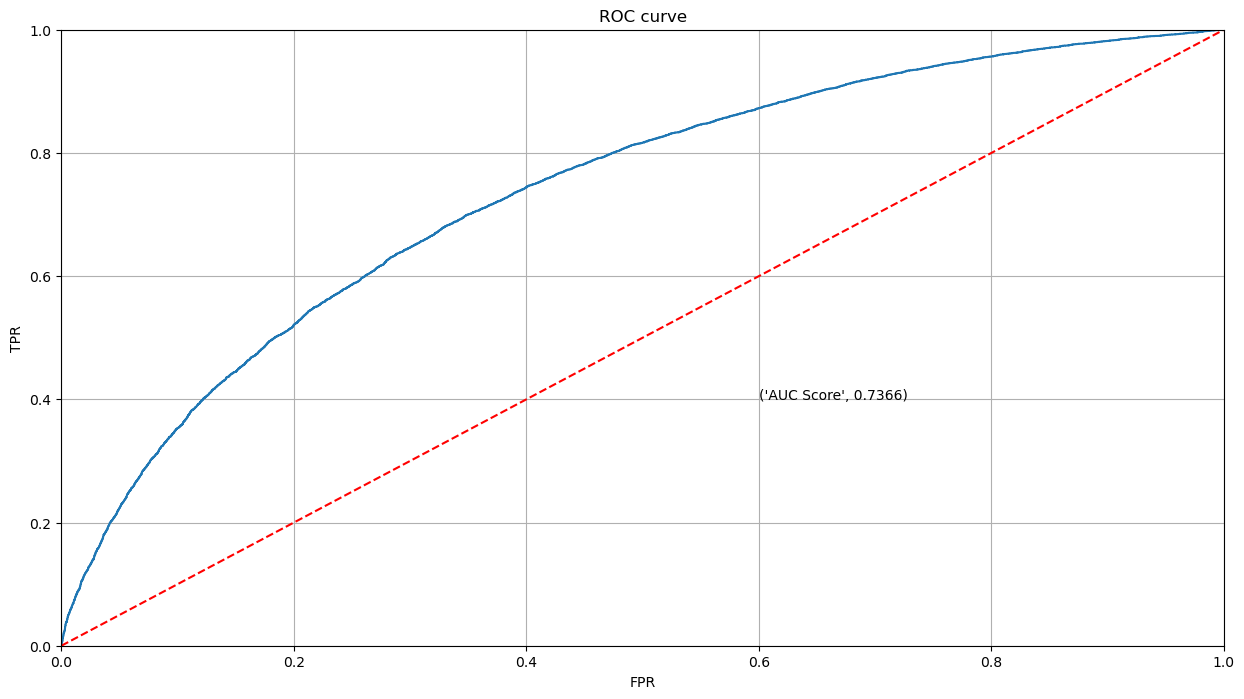

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred_prob = model_lr.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

# plot roc curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],'r--')

plt.title('ROC curve')
plt.ylabel('TPR')
plt.xlabel('FPR')


# AUC score
# 's' is the text
auc = round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.4, s=('AUC Score',auc))

plt.grid(True)
plt.show()

### DecisionTreeClassifier Model on Under sampling

In [90]:
dtc = DecisionTreeClassifier(random_state = 1)

decision_tree = dtc.fit(x_train,y_train)

In [91]:
from sklearn.metrics import classification_report

train_pred = decision_tree.predict(x_train)
                                                                            ## TRAining 
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55926
           1       1.00      1.00      1.00     17451

    accuracy                           1.00     73377
   macro avg       1.00      1.00      1.00     73377
weighted avg       1.00      1.00      1.00     73377



In [92]:
### thisss iss an overfit model 
## EVERTHING IS LEARNED ONE TO ONE in the trained Data

In [ ]:
# Now on test.

In [93]:
train_pred = decision_tree.predict(x_test)

print(classification_report(y_test,train_pred))                          ## TEsting

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     24074
           1       0.34      0.37      0.35      7374

    accuracy                           0.68     31448
   macro avg       0.57      0.57      0.57     31448
weighted avg       0.69      0.68      0.69     31448



In [94]:
#### vaguely giving parameters

**Hyper-Parameter tunning**

In [95]:
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=4,
                             max_leaf_nodes=6,
                            random_state=10)

decision_tree=dtc.fit(x_train,y_train)

In [96]:
train_pred=decision_tree.predict(x_train)

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     55926
           1       0.53      0.17      0.26     17451

    accuracy                           0.77     73377
   macro avg       0.66      0.56      0.56     73377
weighted avg       0.73      0.77      0.72     73377



In [97]:
train_pred=decision_tree.predict(x_test)

print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     24074
           1       0.53      0.16      0.25      7374

    accuracy                           0.77     31448
   macro avg       0.66      0.56      0.56     31448
weighted avg       0.73      0.77      0.72     31448



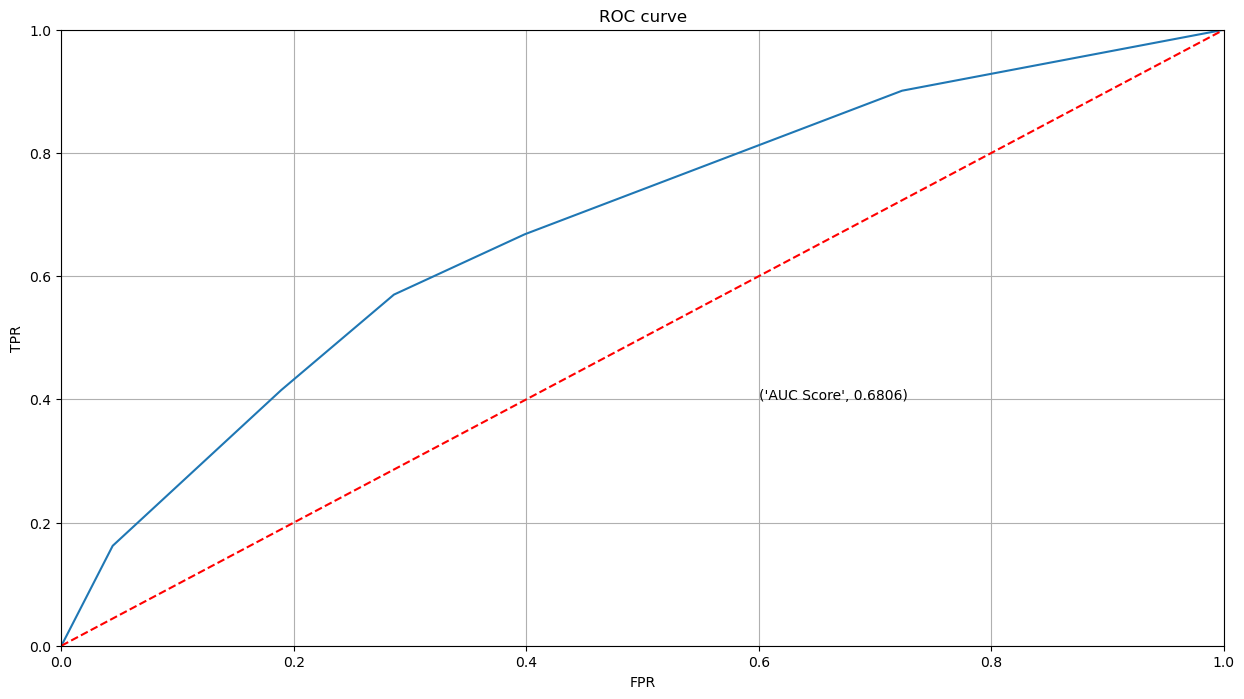

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred_prob = decision_tree.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

# plot roc curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],'r--')

plt.title('ROC curve')
plt.ylabel('TPR')
plt.xlabel('FPR')


# AUC score
# 's' is the text
auc = round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.4, s=('AUC Score',auc))

plt.grid(True)
plt.show()

### DecisionTreeClassifier Model on Under sampling 

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_classification =RandomForestClassifier(n_estimators=10 , random_state=10)

rf_model = rf_classification.fit(x_train , y_train)

In [100]:
train_pred=rf_model.predict(x_train)

print(classification_report(y_train,train_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99     55926
           1       1.00      0.92      0.96     17451

    accuracy                           0.98     73377
   macro avg       0.99      0.96      0.97     73377
weighted avg       0.98      0.98      0.98     73377



In [101]:

test_pred=rf_model.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     24074
           1       0.52      0.16      0.25      7374

    accuracy                           0.77     31448
   macro avg       0.65      0.56      0.56     31448
weighted avg       0.72      0.77      0.72     31448



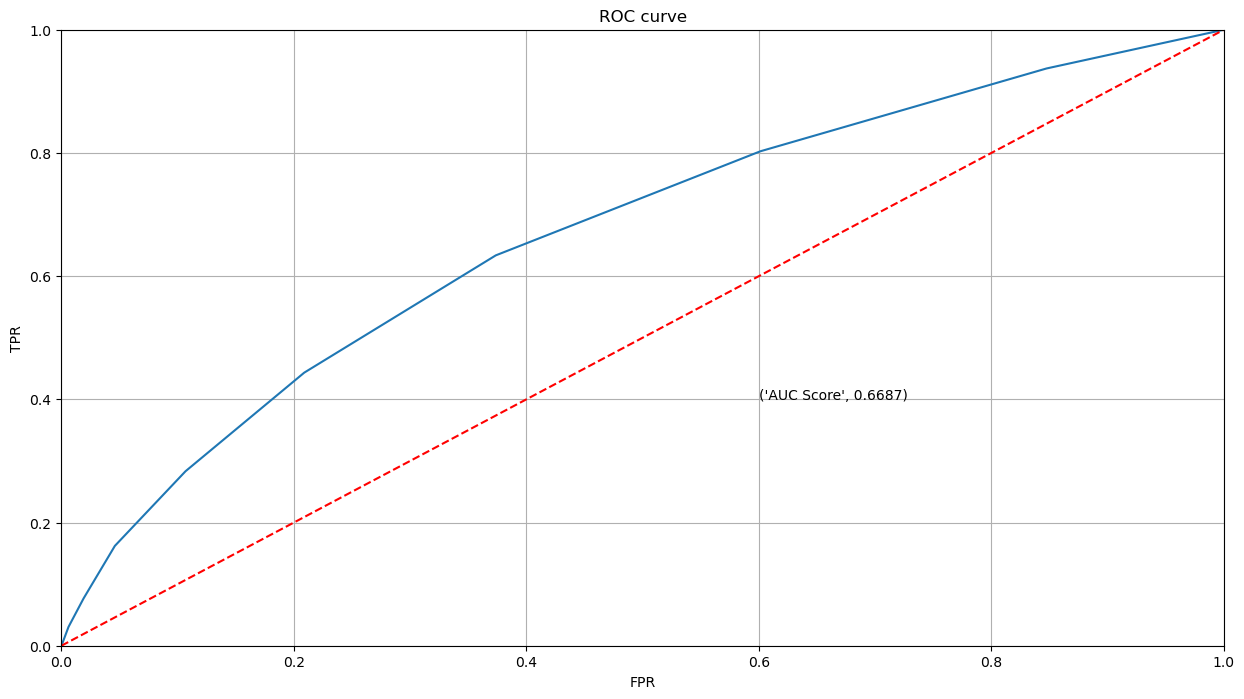

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred_prob = rf_model.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

# plot roc curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0,1],[0,1],'r--')

plt.title('ROC curve')
plt.ylabel('TPR')
plt.xlabel('FPR')


# AUC score
# 's' is the text
auc = round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.4, s=('AUC Score',auc))

plt.grid(True)
plt.show()

### XGBClassifier Model on Under sampling

In [103]:
import xgboost
from xgboost import XGBClassifier
xgb_model= XGBClassifier(max_depth=10,gamma=1)

xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [104]:
## train summary
train_pred = xgb_model.predict(x_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     55926
           1       0.92      0.62      0.74     17451

    accuracy                           0.90     73377
   macro avg       0.90      0.80      0.84     73377
weighted avg       0.90      0.90      0.89     73377



In [105]:
## testingg summary 
train_pred = xgb_model.predict(x_test)
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     24074
           1       0.55      0.28      0.37      7374

    accuracy                           0.78     31448
   macro avg       0.68      0.60      0.62     31448
weighted avg       0.75      0.78      0.75     31448



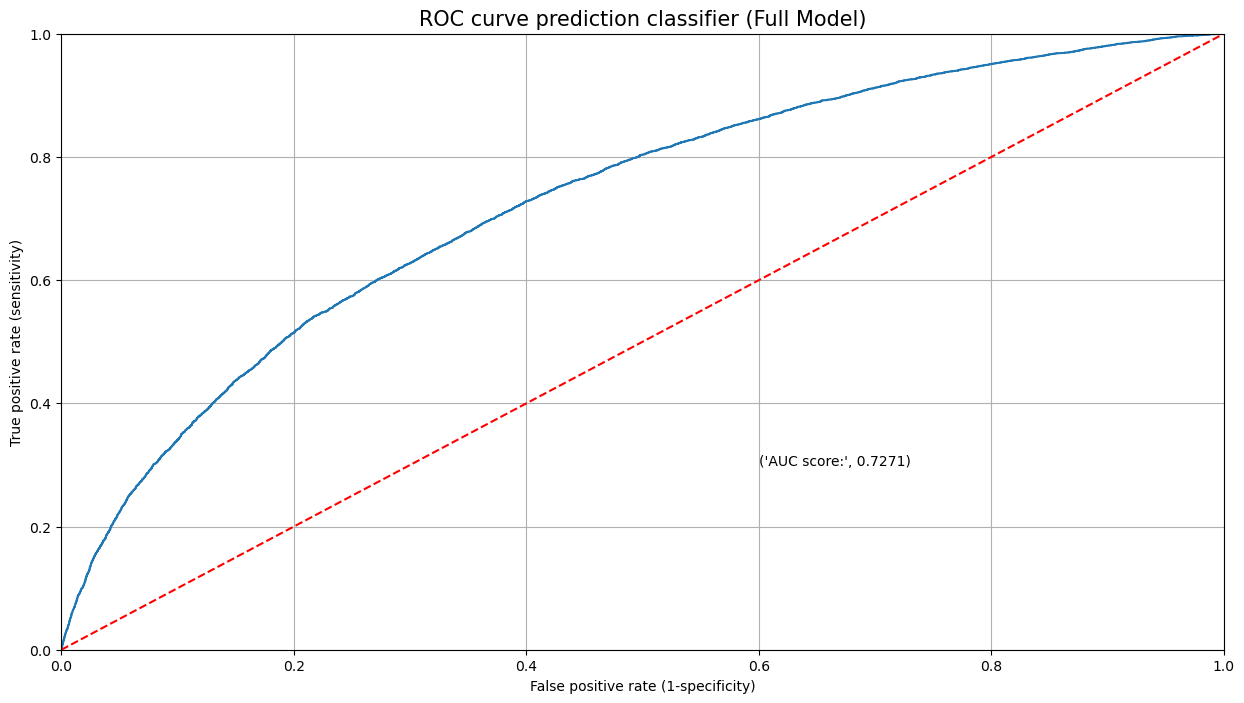

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = xgb_model.predict_proba(x_test)

fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob[:,1])

plt.plot(fpr , tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])


# plot the strainght line showing worst predcition for the model
plt.plot([0,1],[0,1],'r--')


## add plot and axes labels
# set text size using fontsize
plt.title('ROC curve prediction classifier (Full Model)',fontsize=15)
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')


# s is the text
# x , y are the points


auc= round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.3, s=('AUC score:',auc ))                         ## where to display and what to display

plt.grid(True)

* Fine Tunning the Hyperparameters.

In [107]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'learning_rate':[0.05,0.09,0.1,0.3,0.6],
                     'n_estimators':[50,100,150],
                    'max_depth':range(2,10,2),
                    'gamma':[0,1,3,5],
                    'reg_lambda':[1,2,3]}]

xgb_model = XGBClassifier()

In [108]:
%%time
xgb_grid = GridSearchCV(estimator =xgb_model,
                      param_grid=tuned_parameters,
                      cv=3,scoring='roc_auc')

xgb_grid_model= xgb_grid.fit(x_train , y_train)

print('Best parameters for xgb classifier:',xgb_grid_model.best_params_, '\n')

Best parameters for xgb classifier: {'gamma': 1, 'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 150, 'reg_lambda': 3} 

CPU times: total: 1h 55min 24s
Wall time: 18min 49s


### Tuned XGBClassifier Model on Under sampling

In [109]:
train_pred = xgb_grid_model.predict(x_train)
print(classification_report(y_train,train_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     55926
           1       0.66      0.25      0.36     17451

    accuracy                           0.79     73377
   macro avg       0.73      0.60      0.62     73377
weighted avg       0.77      0.79      0.75     73377



In [110]:
## testingg summary 
train_pred = xgb_grid_model.predict(x_test)
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     24074
           1       0.62      0.23      0.33      7374

    accuracy                           0.79     31448
   macro avg       0.71      0.59      0.60     31448
weighted avg       0.76      0.79      0.75     31448



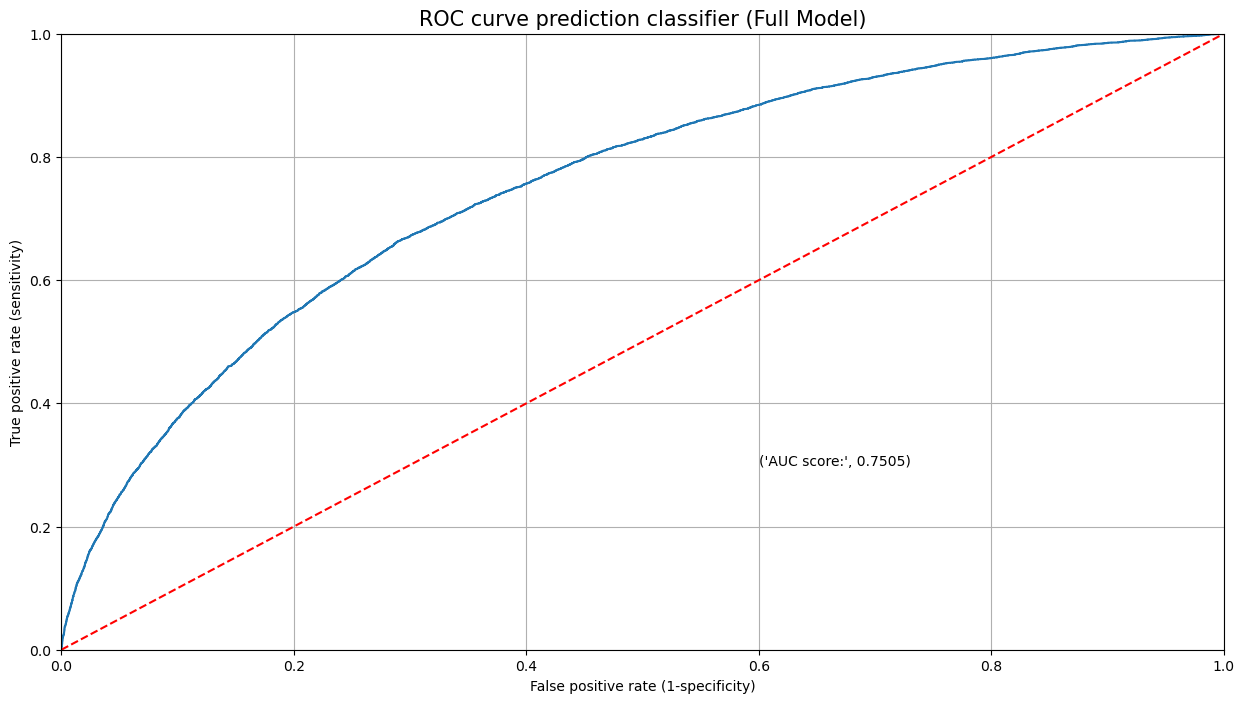

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = xgb_grid_model.predict_proba(x_test)

fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob[:,1])

plt.plot(fpr , tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])


# plot the strainght line showing worst predcition for the model
plt.plot([0,1],[0,1],'r--')


## add plot and axes labels
# set text size using fontsize
plt.title('ROC curve prediction classifier (Full Model)',fontsize=15)
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')


# s is the text
# x , y are the points


auc= round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.3, s=('AUC score:',auc ))                         ## where to display and what to display

plt.grid(True)

### PCA for Dataset

In [116]:
df1 = df

In [117]:
df1.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1           -0.324395    -1.388135     -0.717914         0.664531   
1       0           -0.324395     0.720307     -0.717914        -1.504820   
2       0            3.082659    -1.388135      1.392925         0.664531   
3       0           -0.324395     0.720307     -0.717914         0.664531   
4       0           -0.324395    -1.388135     -0.717914         0.664531   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577538          0.142129   -0.478095    -0.166143        -0.507236   
1     -0.577538          0.426792    1.725450     0.592683         1.600873   
2     -0.577538         -0.427196   -1.152888    -1.404669        -1.092145   
3     -0.577538         -0.142533   -0.711430     0.177874        -0.653463   
4     -0.577538         -0.199466   -0.213734    -0.361749        -0.068554   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0        -0.392408         -0.889689            -0.570906            -1.26454   
1         1.000526         -0.063874             1.061891            -0.25013   
2        -0.392408         -0.889689            -0.570906            -1.26454   
3        -0.392408         -0.889689            -0.570906             0.76428   
4        -0.392408         -0.889689            -0.570906            -1.26454   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  \
0          -0.305298    1.506880      -0.456215    1.599337   -0.245215   
1          -0.305298   -0.166821      -0.460115    1.599337   -0.245215   
2          -0.305298   -0.689509      -0.453299    1.599337   -0.245215   
3          -0.305298   -0.680114      -0.473217   -0.625259   -0.245215   
4          -0.305298   -0.892535      -0.473210   -0.625259   -0.245215   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
0        -0.724181        -1.265722                    -0.062699   
1        -0.445001        -0.167638                    -2.051813   
2        -0.724181        -1.265722                    -0.062699   
3        -0.724181        -0.167638                    -0.062699   
4        -0.445001        -1.265722                    -0.062699   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   -0.090510                -0.631821   
1                   -1.227674                -0.325620   
2                   -1.227674                -0.938022   
3                   -0.090510                 1.511587   
4                    0.478073                -0.325620   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                   -0.124004                   -0.231267   
1                   -0.124004                   -0.231267   
2                   -0.124004                   -0.231267   
3                   -0.124004                   -0.231267   
4                   -0.124004                   -0.231267   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                    -0.205869               -0.291208   
1                    -0.205869               -0.291208   
2                    -0.205869               -0.291208   
3                    -0.205869               -0.291208   
4                    -0.205869               -0.291208   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
0               -0.547236                -0.467814          -1.194830   
1               -0.547236                -0.467814           0.466663   
2               -0.547236                -0.467814          -0.901625   
3               -0.547236                -0.467814          -1.194830   
4                1.827367                 2.137601           0.368928   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
0     -3.021877     -1.317940     -2.153651       -1.002379   
1     -1.384737      0.564482      0.112063       -0.082629   
2      0.012103      0.21

In [118]:
df1.drop('TARGET',axis=1,inplace=True)

In [119]:
# with inbuild function

from sklearn.decomposition import PCA

pca = PCA(n_components=55)
model = pca.fit(df1)

print('Top 55 Eigen values :',model.explained_variance_)
print('Top 55 Eigen vectore :',model.components_)
print('Explained Variation by top 55 Components :',model.explained_variance_ratio_.sum()*100)

Top 55 Eigen values : [13.06677168  4.25766571  3.68349486  2.97797013  2.85743433  2.45572675
  2.33875675  1.88523361  1.74838732  1.64622908  1.59855134  1.46179728
  1.32292256  1.28149473  1.26588773  1.24206216  1.14183792  1.11496962
  1.09334682  1.07638731  1.05024842  1.03535769  1.02585613  1.02174353
  1.01678193  1.01391801  1.00616846  1.0045299   1.00360826  1.00208711
  1.0010942   0.99990163  0.99962369  0.99919477  0.99538541  0.99194869
  0.99087471  0.98685018  0.98174224  0.96888073  0.96340577  0.95784866
  0.94032497  0.92609602  0.90837637  0.89273963  0.87341055  0.85619634
  0.85394269  0.83316903  0.82272857  0.81172363  0.7970271   0.77712948
  0.73831572]
Top 55 Eigen vectore : [[ 4.70475710e-03 -2.45711795e-03  5.79675693e-03 ...  1.36677961e-02
   1.97325890e-04 -4.08257421e-03]
 [ 9.23135217e-04 -1.49968971e-01  1.35499269e-01 ...  1.53097422e-02
  -8.39844826e-03 -3.50840554e-02]
 [-3.41877017e-02 -9.40160081e-03  4.01329822e-02 ...  3.62022374e-02
   3

**Required number of PC's**

In [120]:
pca = PCA(0.95)
model = pca.fit(df)

model.n_components_

58

In [121]:
df_pca = pd.DataFrame(pca.fit_transform(df1),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
                'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40',
                'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50',
                'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58'])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.596580  1.152636 -0.509111 -0.291623 -1.390913  0.562426 -0.809997   
1 -0.772662  0.148263  4.151007  0.358753  0.818056 -0.429411 -0.979897   
2 -0.944303 -0.530998 -0.904920 -0.980469 -1.891331 -0.560832  0.363473   
3 -0.925641 -0.224936 -0.388711 -0.179059 -0.233243  0.101771 -0.820692   
4 -1.084004  0.644942 -0.550747 -0.370451 -0.115767 -0.766388  1.728206   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.670307  0.657039  0.485222 -1.860472 -0.023914  3.447581  1.015894   
1 -0.868859  0.440489  0.577409 -0.487894  1.173813 -0.609841 -0.921151   
2  1.808139  0.528172  2.320236  0.054260 -1.382723 -0.215971 -1.034795   
3 -1.163384  0.109574  1.081840  0.781152 -0.066547 -0.077490 -0.256869   
4  1.289091 -0.097057  0.239458 -1.840009 -2.998082 -0.831773 -0.625068   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.696431  2.679556  0.736518 -0.058357 -1.526671 -1.085881  0.129725   
1 -0.640333  0.353319  0.199321  0.178819 -1.539210  0.034297  0.113624   
2  1.399256  0.035198 -1.338155  0.052358 -0.290927 -0.402809 -0.714344   
3  0.110772  0.341325 -0.479339  0.624206  0.071614  0.536048  0.285305   
4  0.645513 -0.047013 -0.309429  0.120050  0.056753 -0.056575  0.285030   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  0.862613 -0.009446 -1.257104  0.178336  0.212464  0.039842  0.134020   
1  0.314497  0.622262 -0.296120  0.533804 -0.030523 -0.116951  0.380698   
2  1.212507  0.004832 -0.256995  0.677409 -0.361312  0.221962  0.615592   
3 -0.207387  0.362727  0.111838  0.274617  0.189540 -0.369492  0.022982   
4 -0.634353  0.077495  0.039371 -0.539116  0.084566 -0.219765 -0.077815   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.651518 -0.464265 -0.480983 -0.135443  0.428054  0.452613  0.279456   
1  0.107187 -0.078414 -0.048138 -0.140999  0.295595 -0.041406  0.196853   
2  0.197776 -0.417943  0.043926  0.106505  0.070980  0.237548  0.177106   
3  0.460967  0.025832 -0.199097 -0.164010  0.086084  0.185463  0.045441   
4 -0.188129 -0.077130 -0.015324  0.169805 -0.164629  0.039670 -0.010773   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.813609 -0.482292 -0.312689 -0.956481  0.149006  1.515758  0.152572   
1 -0.026413  0.473975 -0.468632  0.071264  0.170311  0.152754 -0.010622   
2 -0.529177  0.829715 -0.884609  0.199496 -0.944628  0.548372  0.820107   
3 -0.368670 -0.265923  0.104242 -0.469060  0.706661  0.292866  0.324448   
4 -0.523654  0.064004  0.088999 -0.224045  0.040859  0.009901 -0.737088   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.225694 -0.726926  0.032365 -0.665709  1.989765 -0.939346  0.951353   
1  0.173053  0.401077  0.343320 -0.366642  1.145287  0.009319  0.960108   
2  0.099705  0.136368  0.022864  0.439456  0.066705 -2.244419  0.739854   
3 -0.043394 -0.166918 -0.788786 -0.424170 -1.006426 -0.325459  0.221792   
4 -0.145028 -1.249388  0.225402  0.140690  0.204679 -0.159047 -0.359812   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  0.244085 -0.313698 -0.520887  1.690103 -0.434449 -3.228000  0.061804   
1  0.339886 -0.674616 -0.884129  0.538698 -0.348752 -0.145761 -0.862622   
2 -0.700917 -0.255086 -0.007555 -0.491247 -0.450143 -0.323321 -0.563221   
3  0.359420  0.909676 -0.419978  0.292059  0.266768  0.620188 -0.105163   
4  1.007215  1.551822 -0.659284  1.266885  0.301983 -0.012347  1.154145   

       PC57      PC58  
0 -0.397801  1.110920  
1 -1.401484 -0.809932  
2 -0.136637  0.155690  
3  0.382710  0.575659  
4 -0.226015 -0.585621

#### kmeans clustering

In [123]:
# Elbow Plot
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
wcss

[26006283.54647556,
 23411605.10880428,
 22465357.563432053,
 21603696.416080307,
 21142637.749010935,
 20316684.266004097,
 20009015.75496592,
 19770458.406683695,
 19427941.25427728]

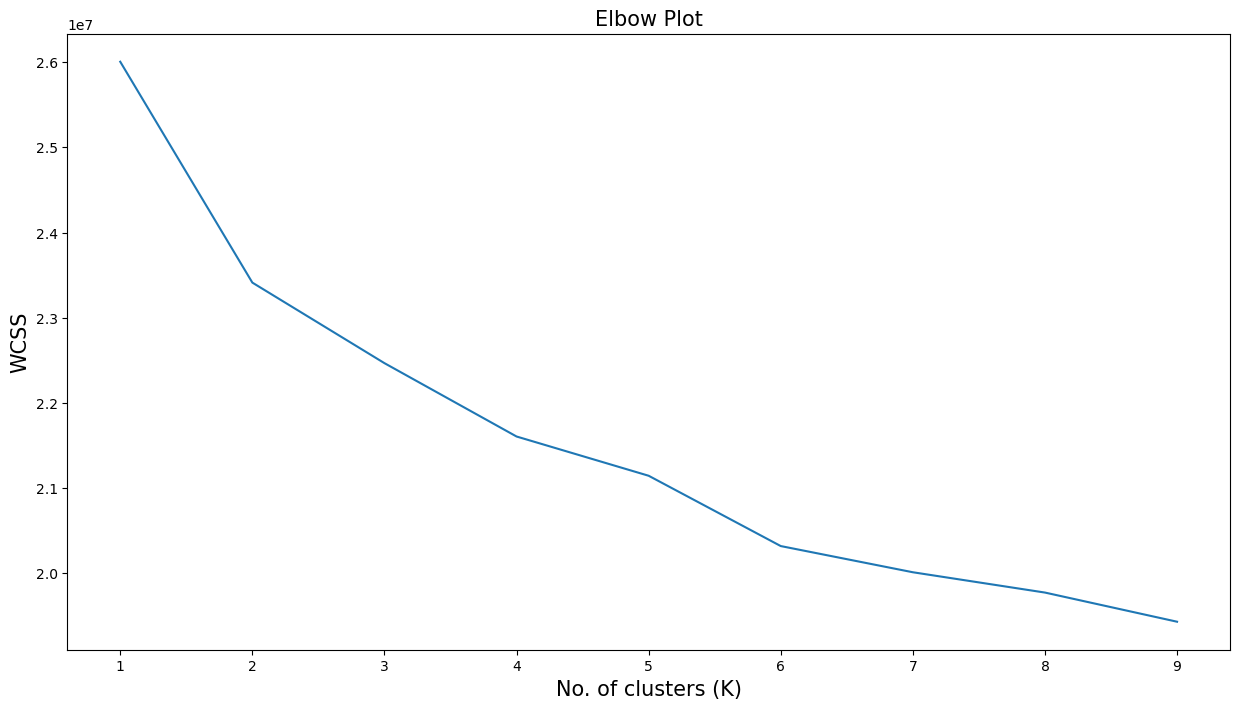

In [124]:
plt.plot(range(1,10),wcss) # Elbows plot with k on the x-axis and wcss on the y-axis

plt.title('Elbow Plot',fontsize=15)
plt.xlabel('No. of clusters (K)',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.show()

For 2 clusters the silhouette score is 0.35712552754309085)
For 4 clusters the silhouette score is 0.05779693386381549)

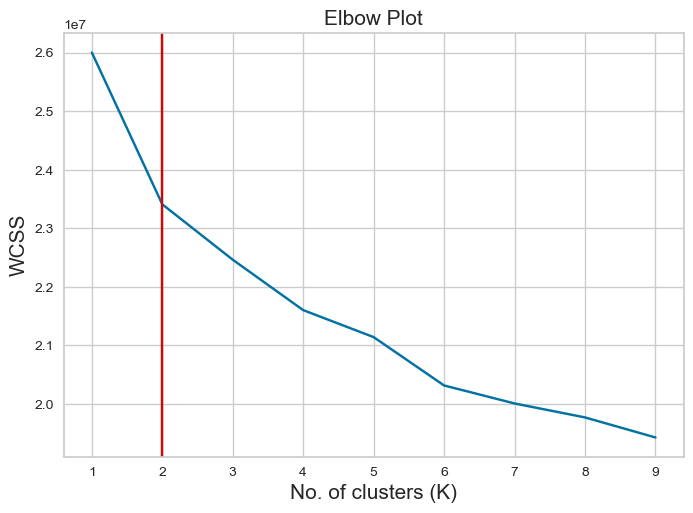

In [124]:
plt.plot(range(1,10),wcss) # Elbows plot with k on the x-axis and wcss on the y-axis

plt.title('Elbow Plot',fontsize=15)
plt.xlabel('No. of clusters (K)',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.axvline(x=2, color='r')
plt.grid(True);

In [122]:
from yellowbrick.cluster import silhouette_visualizer

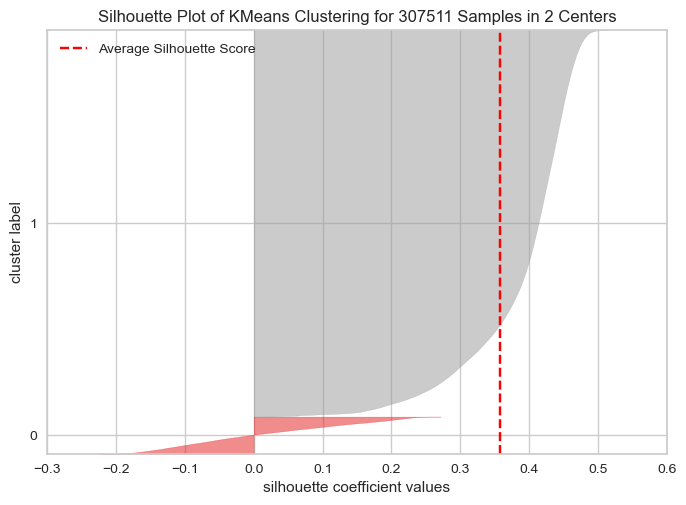

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 307511 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=2))

In [125]:
silhouette_visualizer(KMeans(2), df_pca)

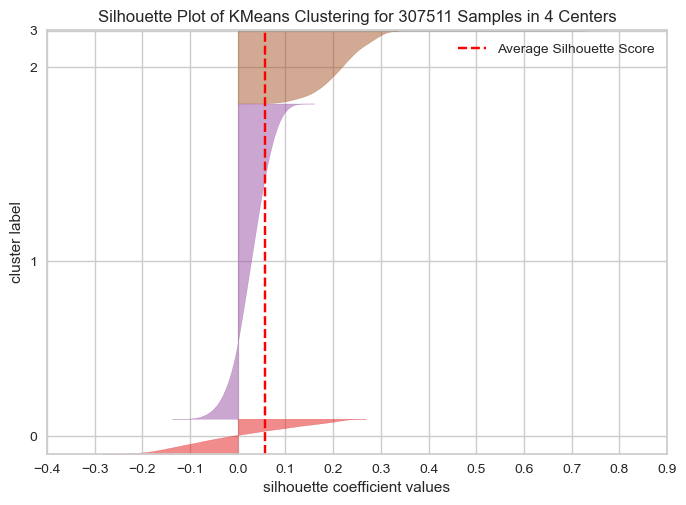

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 307511 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [126]:
silhouette_visualizer(KMeans(4), df_pca)

**Above Are Knife plots for 2 and 4 Clusters respectively.**

In [127]:
kmean = KMeans(2)
kmean.fit(df_pca)
set(kmean.labels_)

{0, 1}

In [128]:
df1['cluster'] = kmean.labels_

In [129]:
df1.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG',
       'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'E

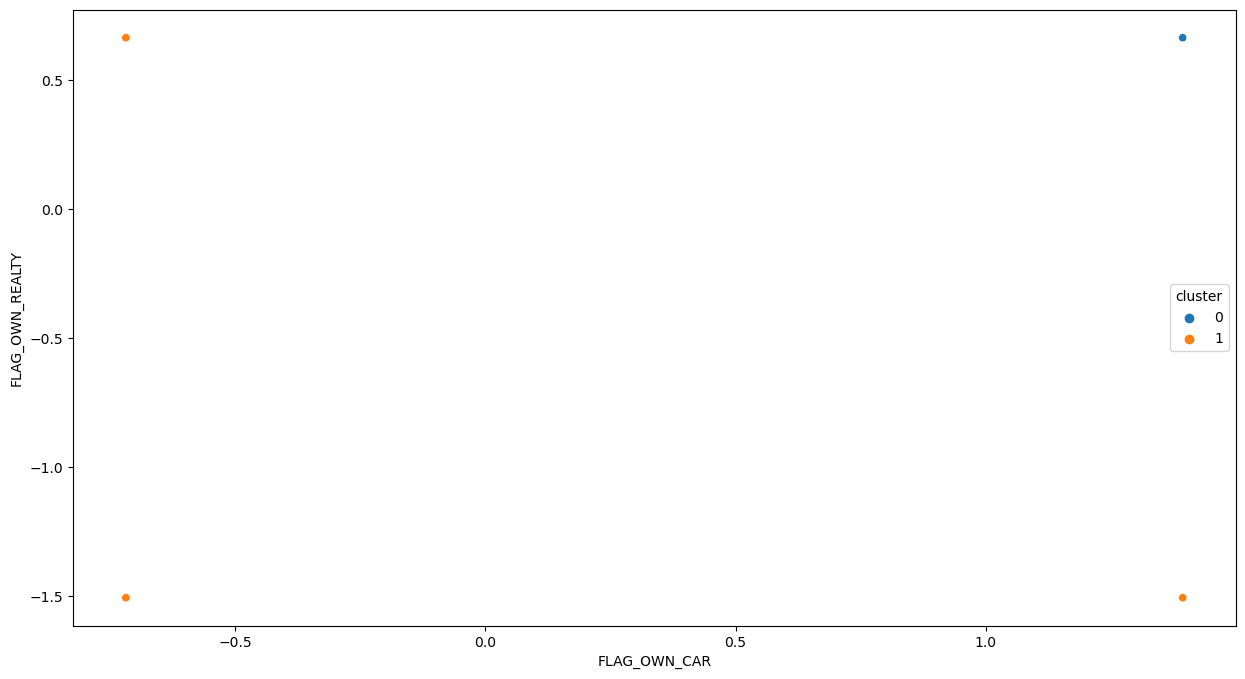

In [131]:
sns.scatterplot(data = df1,x='FLAG_OWN_CAR',y='FLAG_OWN_REALTY',hue='cluster');

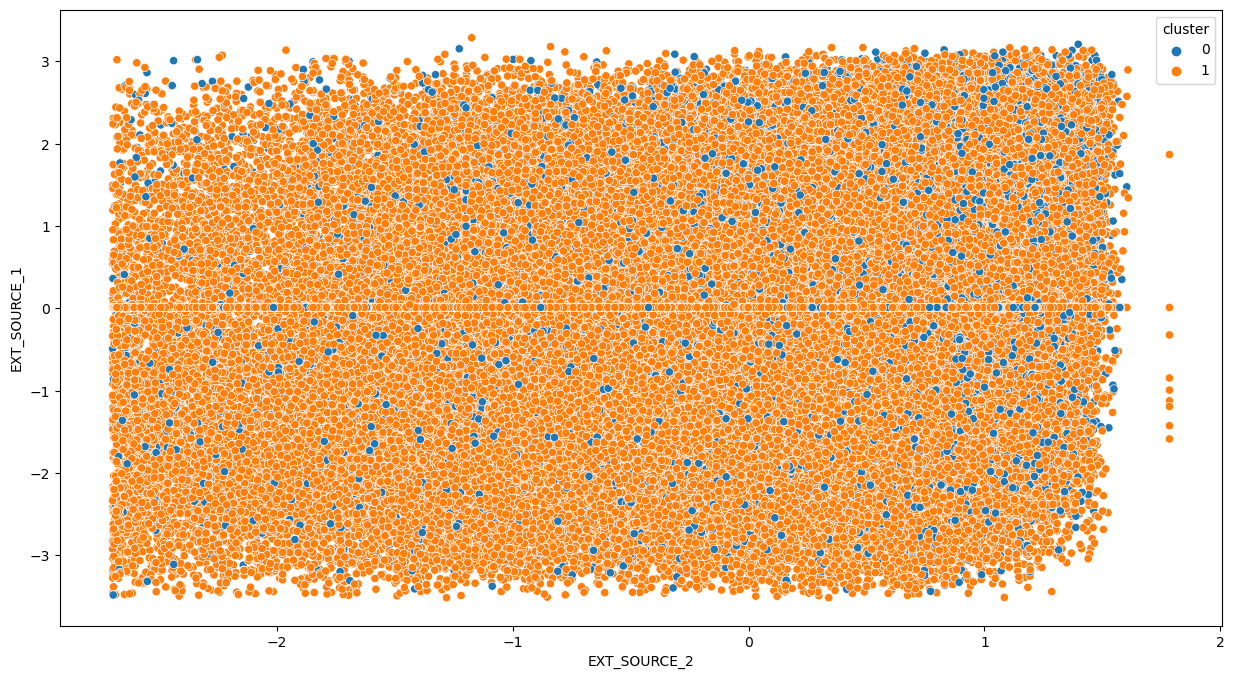

In [132]:
sns.scatterplot(data = df1,x='EXT_SOURCE_2',y='EXT_SOURCE_1',hue='cluster');

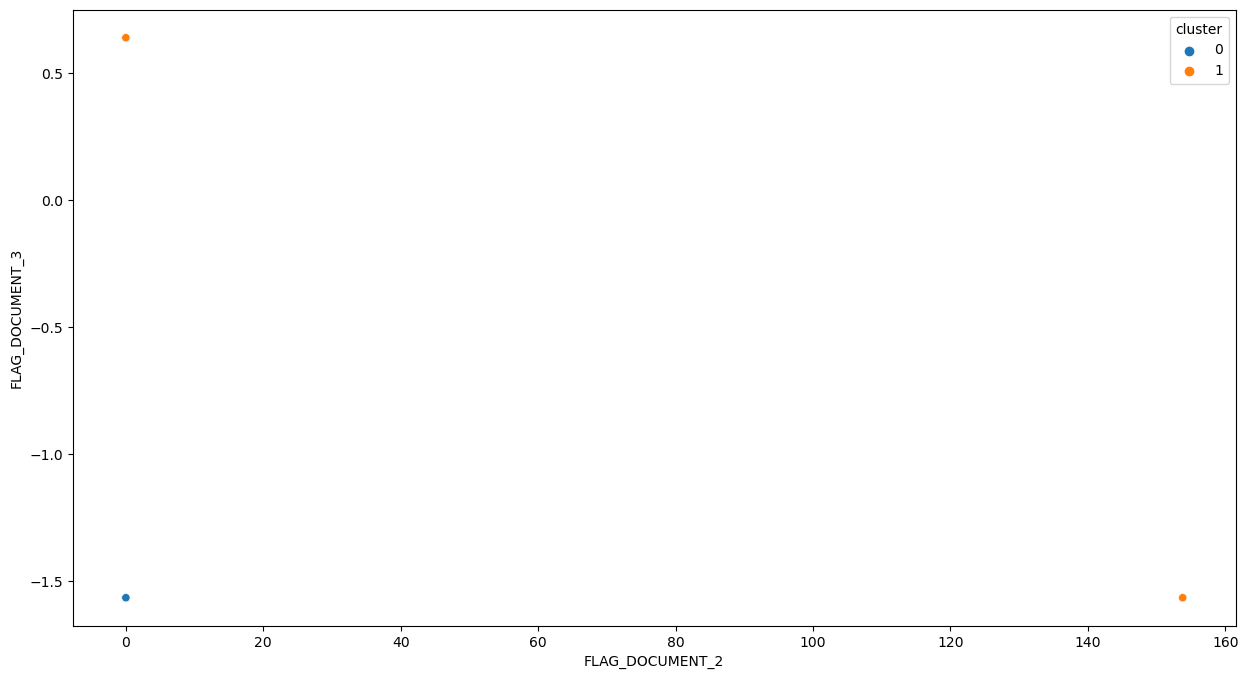

In [133]:
sns.scatterplot(data = df1,x='FLAG_DOCUMENT_2',y='FLAG_DOCUMENT_3',hue='cluster');

In [134]:
df1['cluster'].value_counts()

1    280571
0     26940
Name: cluster, dtype: int64

### Models On cluster data, cluster=2

In [135]:
from sklearn.model_selection import train_test_split
x = df1.drop('cluster',axis=1)
y = df1['cluster']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1,max_depth=3)
dt.fit(x_train,y_train)

test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

from sklearn.metrics import classification_report
print('Train data classification report :','\n',classification_report(y_train,train_pred),'\n')
print('Test data classification report :','\n',classification_report(y_test,test_pred))

Train data classification report : 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     18757
           1       0.99      1.00      0.99    196500

    accuracy                           0.99    215257
   macro avg       0.97      0.94      0.95    215257
weighted avg       0.99      0.99      0.99    215257
 

Test data classification report : 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      8183
           1       0.99      1.00      0.99     84071

    accuracy                           0.99     92254
   macro avg       0.97      0.94      0.95     92254
weighted avg       0.98      0.99      0.98     92254



In [136]:
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=4,
                             max_leaf_nodes=6,
                            random_state=10)

decision_tree=dtc.fit(x_train,y_train)

train_pred=decision_tree.predict(x_train)

print(classification_report(y_train,train_pred))

train_pred=decision_tree.predict(x_test)

print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     18757
           1       0.99      0.99      0.99    196500

    accuracy                           0.99    215257
   macro avg       0.96      0.95      0.95    215257
weighted avg       0.99      0.99      0.99    215257

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      8183
           1       0.99      0.99      0.99     84071

    accuracy                           0.98     92254
   macro avg       0.96      0.94      0.95     92254
weighted avg       0.98      0.98      0.98     92254



In [137]:
from sklearn.ensemble import RandomForestClassifier
rf_classification =RandomForestClassifier(n_estimators=10 , random_state=10)

rf_model = rf_classification.fit(x_train , y_train)


train_pred=rf_model.predict(x_train)

print(classification_report(y_train,train_pred))



test_pred=rf_model.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18757
           1       1.00      1.00      1.00    196500

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8183
           1       1.00      1.00      1.00     84071

    accuracy                           1.00     92254
   macro avg       0.99      0.99      0.99     92254
weighted avg       1.00      1.00      1.00     92254



In [138]:
important_features = pd.DataFrame({'Features':x_train.columns,
                                  'Importance': rf_model.feature_importances_})

important_features

Features  Importance
0             NAME_CONTRACT_TYPE    0.000169
1                    CODE_GENDER    0.000128
2                   FLAG_OWN_CAR    0.000275
3                FLAG_OWN_REALTY    0.000223
4                   CNT_CHILDREN    0.000353
5               AMT_INCOME_TOTAL    0.001427
6                     AMT_CREDIT    0.001476
7                    AMT_ANNUITY    0.001596
8                AMT_GOODS_PRICE    0.001308
9                NAME_TYPE_SUITE    0.000256
10              NAME_INCOME_TYPE    0.000370
11           NAME_EDUCATION_TYPE    0.000396
12            NAME_FAMILY_STATUS    0.000427
13             NAME_HOUSING_TYPE    0.000222
14                    DAYS_BIRTH    0.001430
15                 DAYS_EMPLOYED    0.001344
16                    FLAG_PHONE    0.000281
17                    FLAG_EMAIL    0.000121
18               OCCUPATION_TYPE    0.000692
19               CNT_FAM_MEMBERS    0.000557
20   REGION_RATING_CLIENT_W_CITY    0.001251
21    WEEKDAY_APPR_PROCESS_START    0.000894
22       HOUR_APPR_PROCESS_START    0.001213
23    REG_REGION_NOT_LIVE_REGION    0.000040
24    REG_REGION_NOT_WORK_REGION    0.000113
25   LIVE_REGION_NOT_WORK_REGION    0.000124
26        REG_CITY_NOT_LIVE_CITY    0.000046
27        REG_CITY_NOT_WORK_CITY    0.000222
28       LIVE_CITY_NOT_WORK_CITY    0.000197
29             ORGANIZATION_TYPE    0.000871
30                  EXT_SOURCE_1    0.001065
31                  EXT_SOURCE_2    0.001495
32                  EXT_SOURCE_3    0.001357
33                APARTMENTS_AVG    0.125401
34   YEARS_BEGINEXPLUATATION_AVG    0.001905
35                 ELEVATORS_AVG    0.083983
36                 ENTRANCES_AVG    0.003620
37                 FLOORSMAX_AVG    0.022807
38                  LANDAREA_AVG    0.008869
39                LIVINGAREA_AVG    0.043156
40             NONLIVINGAREA_AVG    0.017351
41             BASEMENTAREA_MODE    0.006094
42  YEARS_BEGINEXPLUATATION_MODE    0.001664
43                ELEVATORS_MODE    0.132082
44                ENTRANCES_MODE    0.004491
45                FLOORSMAX_MODE    0.003335
46                 LANDAREA_MODE    0.031605
47               LIVINGAREA_MODE    0.014368
48            NONLIVINGAREA_MODE    0.005972
49               APARTMENTS_MEDI    0.110133
50             BASEMENTAREA_MEDI    0.010030
51  YEARS_BEGINEXPLUATATION_MEDI    0.002457
52                ELEVATORS_MEDI    0.091989
53                ENTRANCES_MEDI    0.013266
54                FLOORSMAX_MEDI    0.004355
55                 LANDAREA_MEDI    0.035912
56               LIVINGAREA_MEDI    0.175544
57            NONLIVINGAREA_MEDI    0.006390
58                HOUSETYPE_MODE    0.000146
59                TOTALAREA_MODE    0.016039
60            WALLSMATERIAL_MODE    0.000632
61           EMERGENCYSTATE_MODE    0.000011
62      OBS_60_CNT_SOCIAL_CIRCLE    0.000675
63      DEF_60_CNT_SOCIAL_CIRCLE    0.000194
64        DAYS_LAST_PHONE_CHANGE    0.001194
65               FLAG_DOCUMENT_2    0.000000
66               FLAG_DOCUMENT_3    0.000216
67               FLAG_DOCUMENT_4    0.000000
68               FLAG_DOCUMENT_5    0.000034
69               FLAG_DOCUMENT_6    0.000135
70               FLAG_DOCUMENT_7    0.000000
71               FLAG_DOCUMENT_8    0.000153
72               FLAG_DOCUMENT_9    0.000062
73              FLAG_DOCUMENT_10    0.000000
74              FLAG_DOCUMENT_11    0.000026
75              FLAG_DOCUMENT_12    0.000000
76              FLAG_DOCUMENT_13    0.000117
77              FLAG_DOCUMENT_14    0.000090
78              FLAG_DOCUMENT_15    0.000011
79              FLAG_DOCUMENT_16    0.000069
80              FLAG_DOCUMENT_17    0.000020
81              FLAG_DOCUMENT_18    0.000024
82              FLAG_DOCUMENT_19    0.000000
83              FLAG_DOCUMENT_20    0.000000
84              FLAG_DOCUMENT_21    0.000000
85     AMT_REQ_CREDIT_BUREAU_DAY    0.000011
86     AMT_REQ_CREDIT_BUREAU_MON    0.000415
87     AMT_REQ_CREDIT_BUREAU_QRT    0.000254
88    AMT_REQ_CREDI

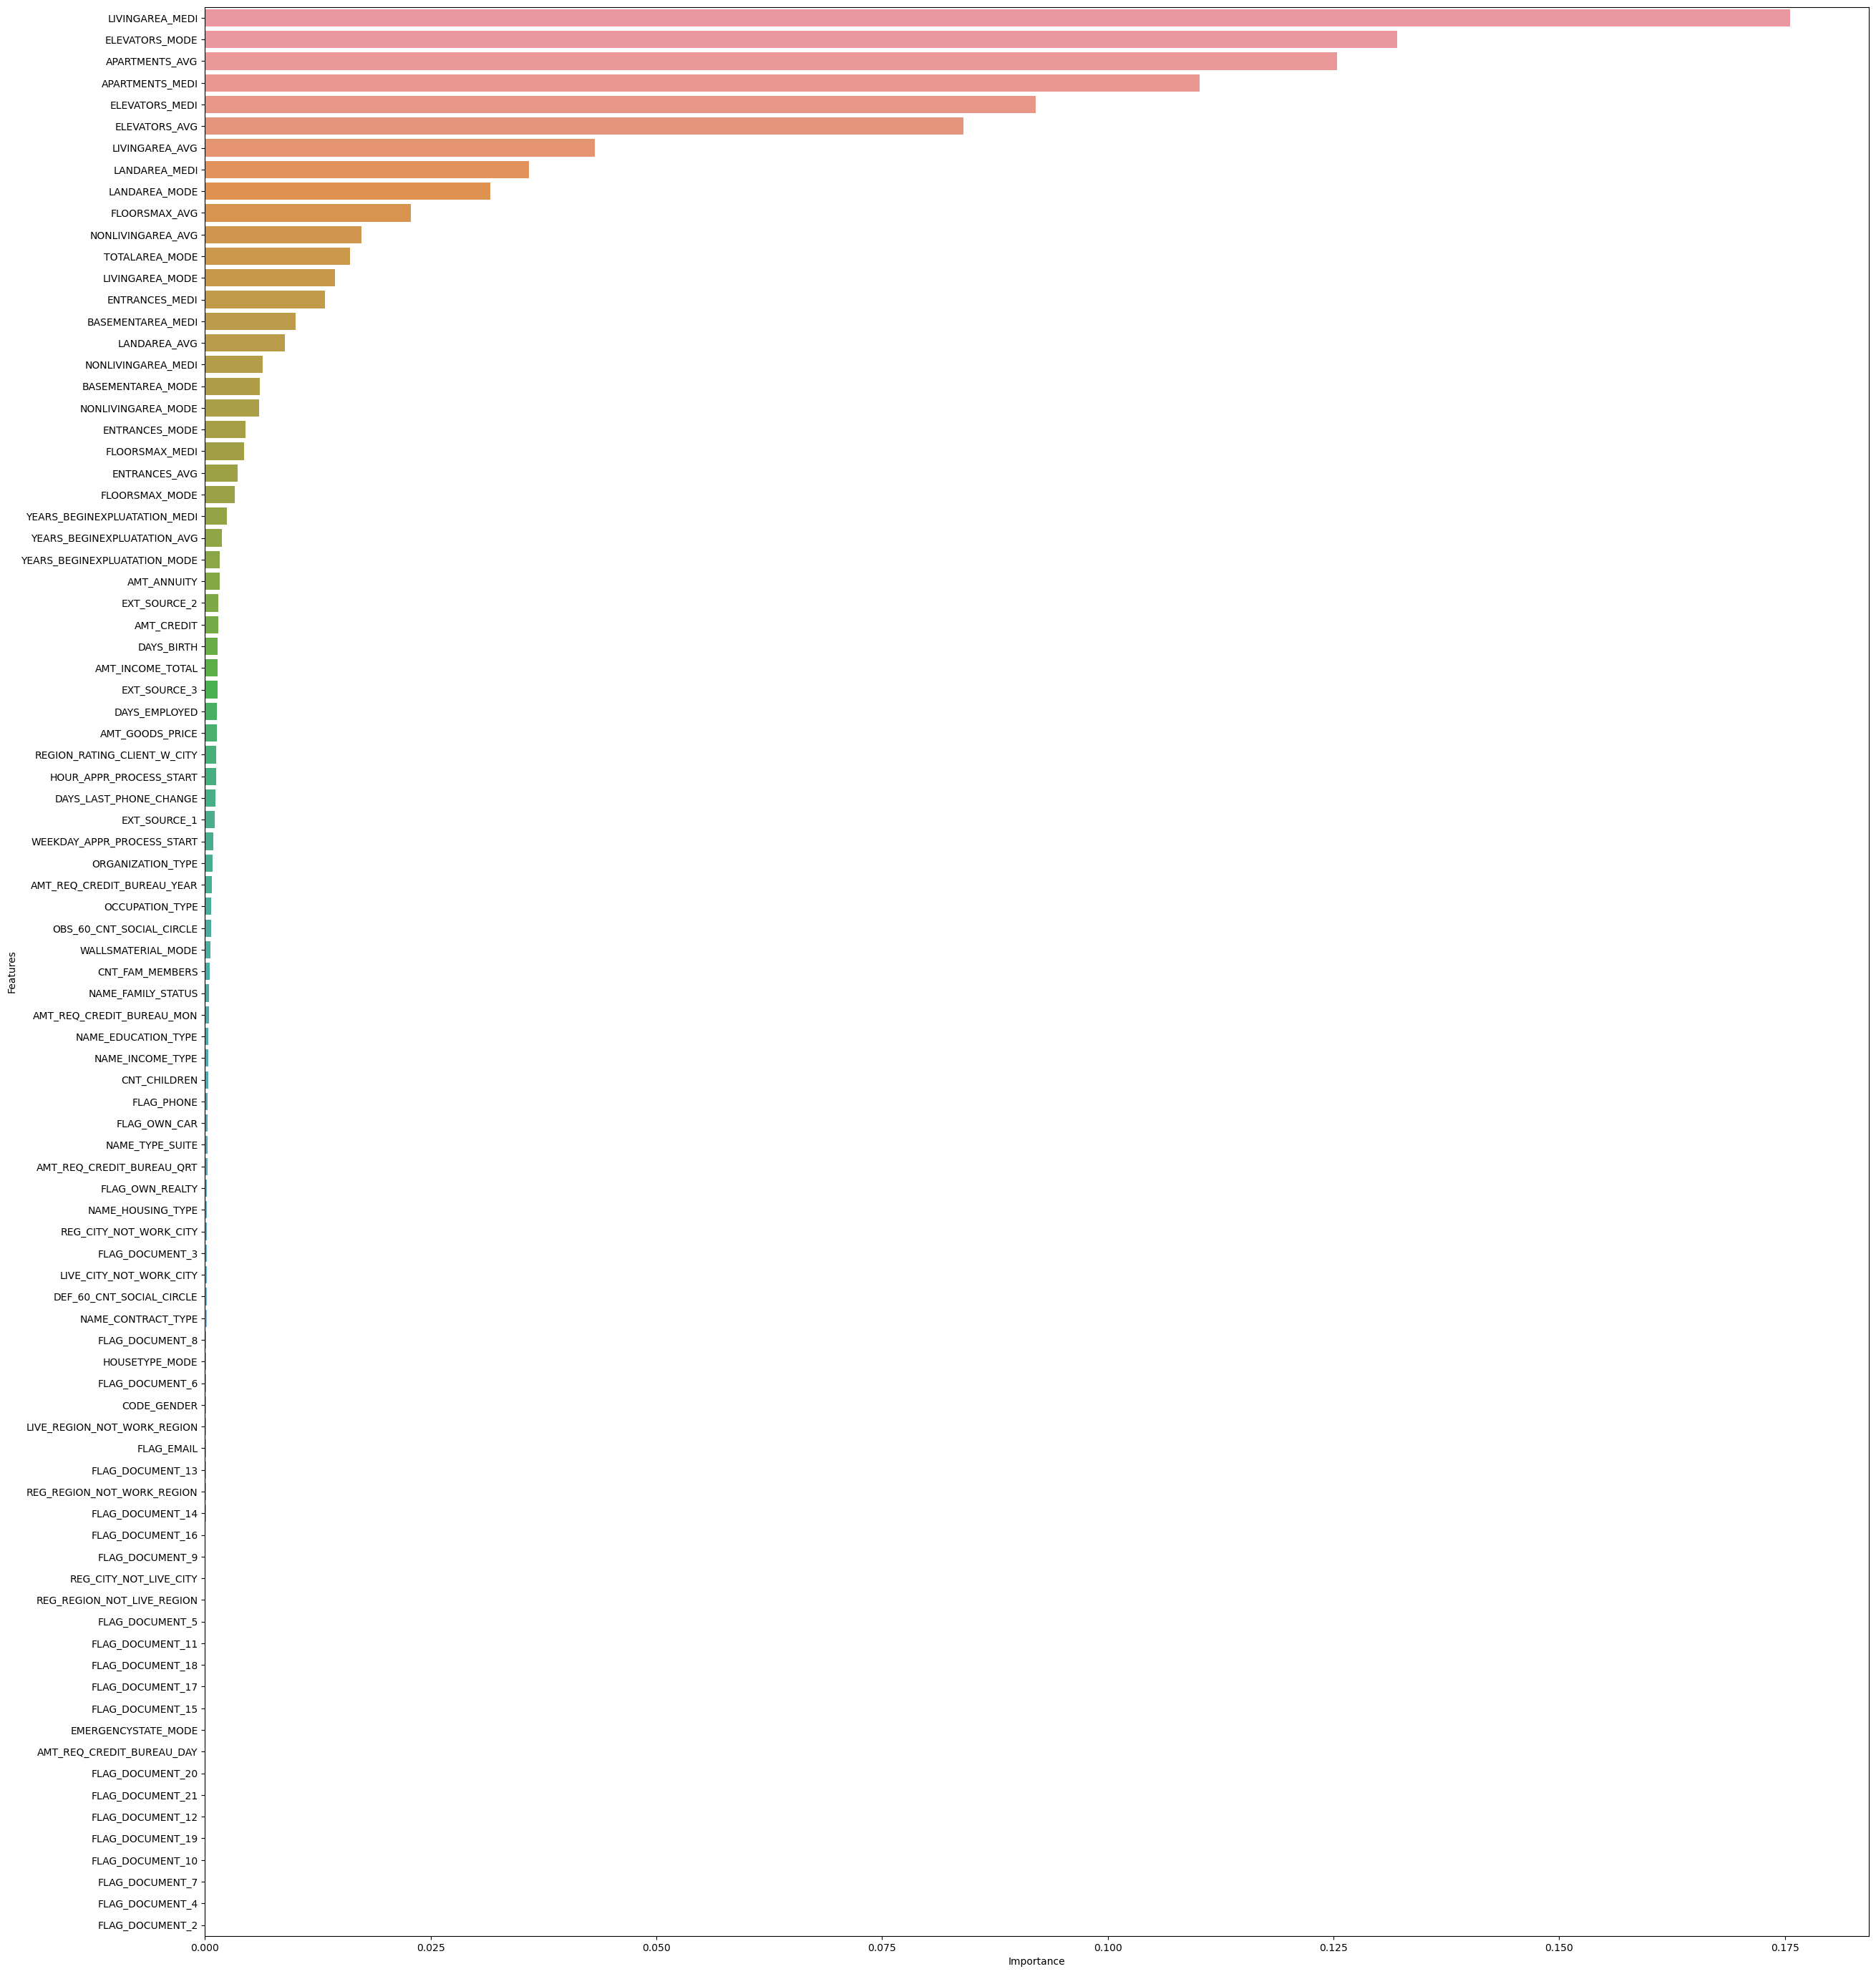

In [140]:
important_features = important_features.sort_values('Importance',ascending=False)
plt.figure(figsize=(30,35))
sns.barplot(x='Importance',y='Features',data=important_features);

In [141]:
df_pca['cluster'] = kmean.labels_

In [142]:
df_pca.head(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.596580  1.152636 -0.509111 -0.291623 -1.390913  0.562426 -0.809997   
1 -0.772662  0.148263  4.151007  0.358753  0.818056 -0.429411 -0.979897   
2 -0.944303 -0.530998 -0.904920 -0.980469 -1.891331 -0.560832  0.363473   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.670307  0.657039  0.485222 -1.860472 -0.023914  3.447581  1.015894   
1 -0.868859  0.440489  0.577409 -0.487894  1.173813 -0.609841 -0.921151   
2  1.808139  0.528172  2.320236  0.054260 -1.382723 -0.215971 -1.034795   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.696431  2.679556  0.736518 -0.058357 -1.526671 -1.085881  0.129725   
1 -0.640333  0.353319  0.199321  0.178819 -1.539210  0.034297  0.113624   
2  1.399256  0.035198 -1.338155  0.052358 -0.290927 -0.402809 -0.714344   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  0.862613 -0.009446 -1.257104  0.178336  0.212464  0.039842  0.134020   
1  0.314497  0.622262 -0.296120  0.533804 -0.030523 -0.116951  0.380698   
2  1.212507  0.004832 -0.256995  0.677409 -0.361312  0.221962  0.615592   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.651518 -0.464265 -0.480983 -0.135443  0.428054  0.452613  0.279456   
1  0.107187 -0.078414 -0.048138 -0.140999  0.295595 -0.041406  0.196853   
2  0.197776 -0.417943  0.043926  0.106505  0.070980  0.237548  0.177106   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.813609 -0.482292 -0.312689 -0.956481  0.149006  1.515758  0.152572   
1 -0.026413  0.473975 -0.468632  0.071264  0.170311  0.152754 -0.010622   
2 -0.529177  0.829715 -0.884609  0.199496 -0.944628  0.548372  0.820107   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.225694 -0.726926  0.032365 -0.665709  1.989765 -0.939346  0.951353   
1  0.173053  0.401077  0.343320 -0.366642  1.145287  0.009319  0.960108   
2  0.099705  0.136368  0.022864  0.439456  0.066705 -2.244419  0.739854   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  0.244085 -0.313698 -0.520887  1.690103 -0.434449 -3.228000  0.061804   
1  0.339886 -0.674616 -0.884129  0.538698 -0.348752 -0.145761 -0.862622   
2 -0.700917 -0.255086 -0.007555 -0.491247 -0.450143 -0.323321 -0.563221   

       PC57      PC58  cluster  
0 -0.397801  1.110920        1  
1 -1.401484 -0.809932        1  
2 -0.136637  0.155690        1

In [143]:
from sklearn.model_selection import train_test_split
x = df_pca.drop('cluster',axis=1)
y = df_pca['cluster']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1,max_depth=3)
dt.fit(x_train,y_train)

test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

from sklearn.metrics import classification_report
print('Train data classification report :','\n',classification_report(y_train,train_pred),'\n')
print('Test data classification report :','\n',classification_report(y_test,test_pred))

Train data classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     18757
           1       1.00      1.00      1.00    196500

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257
 

Test data classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8183
           1       1.00      1.00      1.00     84071

    accuracy                           1.00     92254
   macro avg       1.00      1.00      1.00     92254
weighted avg       1.00      1.00      1.00     92254



In [144]:
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=4,
                             max_leaf_nodes=6,
                            random_state=10)

decision_tree=dtc.fit(x_train,y_train)

train_pred=decision_tree.predict(x_train)

print(classification_report(y_train,train_pred))

train_pred=decision_tree.predict(x_test)

print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18757
           1       1.00      1.00      1.00    196500

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8183
           1       1.00      1.00      1.00     84071

    accuracy                           1.00     92254
   macro avg       1.00      1.00      1.00     92254
weighted avg       1.00      1.00      1.00     92254



**Trying on Overesampling data now**

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
import statsmodels.api as sma
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = [15,8]
from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score,confusion_matrix,log_loss,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## add line go to further process

add this on original dataset and then perform it

In [209]:
df_home.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                0                 0                    0   
1        1129500.0                1                 1                    1   
2         135000.0                0                 0                    0   
3         297000.0                0                 0                    0   
4         513000.0                0                 0                    0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  1       -9461           -637   
1                   1                  1      -16765          -1188   
2                   0                  1      -19046           -225   
3                   2                  1      -19005          -3039   
4                   0                  1      -19932          -3038   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           1           0                0              1.0   
1           1           0                1              2.0   
2           1           0                0              1.0   
3           0           0                0              2.0   
4           0           0                1              1.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            1                           1   
2                            2                           1   
3                            2                           3   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.72

In [210]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [211]:
X = df_home.drop("TARGET",axis=1)
y = df_home["TARGET"]

In [212]:
# we can apply smote analysis

In [213]:
import imblearn
from collections import Counter

In [214]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=42)

#print('Original dataset shape %s' % Counter(y))

X_res, y_res = rs.fit_resample(X, y)
print(' undersample before dataset shape %s' % Counter(y))
print('After undersample dataset shape %s' % Counter(y_res))

 undersample before dataset shape Counter({0: 282686, 1: 24825})
After undersample dataset shape Counter({0: 24825, 1: 24825})


In [215]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X, y)

print('After over sampling dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 282686, 1: 24825})
After over sampling dataset shape Counter({1: 282686, 0: 282686})


In [216]:
df_home.drop(columns='TARGET',axis=1,inplace=True)

In [217]:
smote_data=pd.DataFrame(X_res,columns=df_home.columns).reset_index()

In [218]:
idx=2
new_col=y_res.values
smote_data.insert(loc=idx, column='TARGET', value=new_col)

In [219]:
smote_data.head(5)

index  SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      0      100002       1                   0            0             0   
1      1      100003       0                   0            1             0   
2      2      100004       0                   1            0             1   
3      3      100006       0                   0            1             0   
4      4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                0                 0                    0   
1        1129500.0                1                 1                    1   
2         135000.0                0                 0                    0   
3         297000.0                0                 0                    0   
4         513000.0                0                 0                    0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  1       -9461           -637   
1                   1                  1      -16765          -1188   
2                   0                  1      -19046           -225   
3                   2                  1      -19005          -3039   
4                   0                  1      -19932          -3038   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           1           0                0              1.0   
1           1           0                1              2.0   
2           1           0                0              1.0   
3           0           0                0              2.0   
4           0           0                1              1.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            1                           1   
2                            2                           1   
3                            2                           3   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2               

In [220]:
smote_data.drop(columns=['index'],axis=1,inplace=True)

In [221]:
#smote_data.to_csv('B_loan_data.csv')

In [222]:
df=smote_data
df.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                0                 0                    0   
1        1129500.0                1                 1                    1   
2         135000.0                0                 0                    0   
3         297000.0                0                 0                    0   
4         513000.0                0                 0                    0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  1       -9461           -637   
1                   1                  1      -16765          -1188   
2                   0                  1      -19046           -225   
3                   2                  1      -19005          -3039   
4                   0                  1      -19932          -3038   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           1           0                0              1.0   
1           1           0                1              2.0   
2           1           0                0              1.0   
3           0           0                0              2.0   
4           0           0                1              1.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            1                           1   
2                            2                           1   
3                            2                           3   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.72

In [223]:
#df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [224]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Train:               precision    recall  f1-score   support

           0       0.97      0.77      0.86    197867
           1       0.81      0.98      0.89    197893

    accuracy                           0.88    395760
   macro avg       0.89      0.88      0.87    395760
weighted avg       0.89      0.88      0.87    395760

Test:               precision    recall  f1-score   support

           0       0.94      0.68      0.79     84819
           1       0.75      0.96      0.84     84793

    accuracy                           0.82    169612
   macro avg       0.85      0.82      0.81    169612
weighted avg       0.85      0.82      0.81    169612



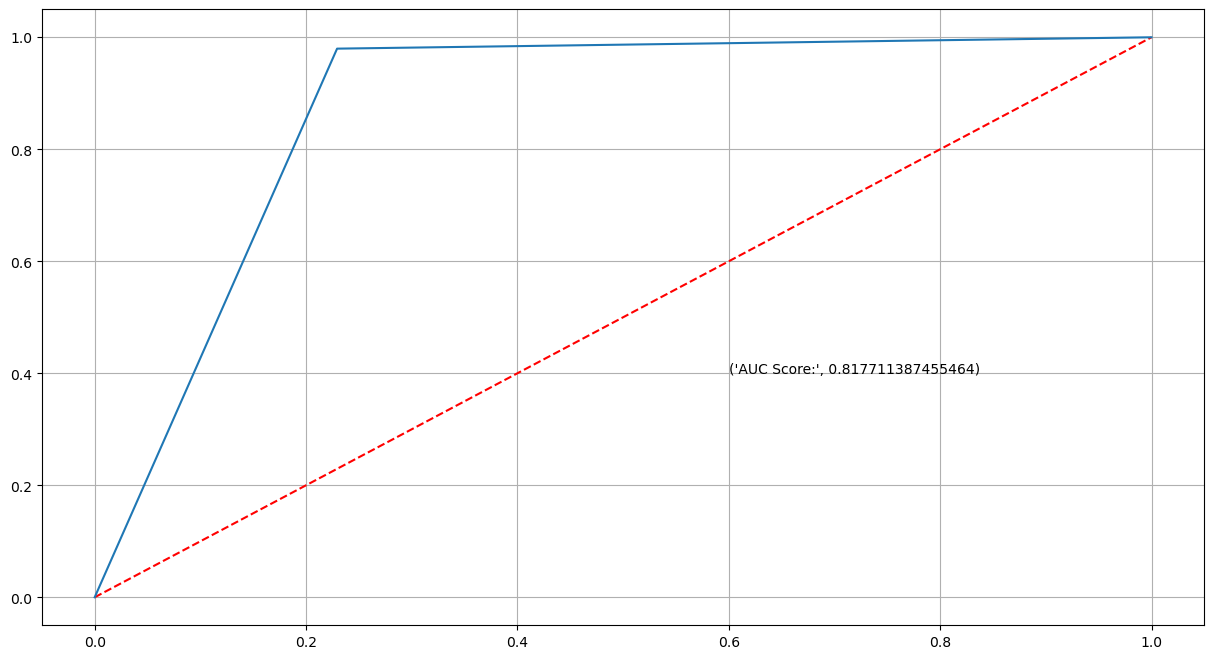

In [225]:
knn_cl = KNeighborsClassifier()
knn_model = knn_cl.fit(x_train, y_train)
y_train_pred = knn_model.predict(x_train.values)
y_test_pred = knn_model.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
pred_prob = knn_model.predict_proba(x_train.values)[:,1]  #For positive class / or don't take it for class '0'
fpr, tpr, thresholds = roc_curve(y_train, knn_model.predict(x_train.values))
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, y_test_pred)))
plt.grid()

Train:               precision    recall  f1-score   support

           0       0.55      0.84      0.66    197867
           1       0.66      0.31      0.42    197893

    accuracy                           0.58    395760
   macro avg       0.60      0.58      0.54    395760
weighted avg       0.60      0.58      0.54    395760

Test:               precision    recall  f1-score   support

           0       0.55      0.84      0.66     84819
           1       0.66      0.31      0.42     84793

    accuracy                           0.58    169612
   macro avg       0.61      0.58      0.54    169612
weighted avg       0.61      0.58      0.54    169612



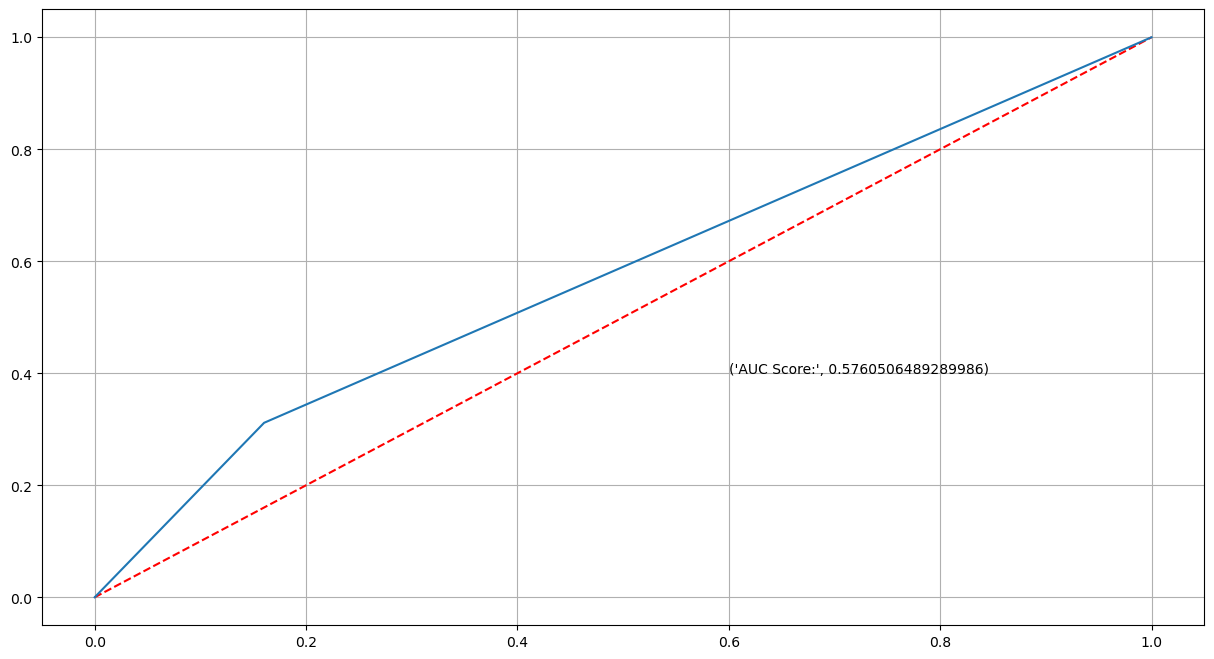

In [227]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
y_train_pred = gnb_model.predict(x_train.values)
y_test_pred = gnb_model.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
pred_prob = gnb_model.predict_proba(x_train.values)[:,1]  #For positive class / or don't take it for class '0'
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, y_test_pred)))
plt.grid()

**GNB with 10 fold cross validation and it's average accuracy.**

In [228]:
score = cross_val_score(gnb, x_test,y_test, cv= 10)
score = score.mean()
score

0.5176872623317281

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197867
           1       1.00      1.00      1.00    197893

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760

Test:               precision    recall  f1-score   support

           0       0.89      0.87      0.88     84819
           1       0.87      0.90      0.88     84793

    accuracy                           0.88    169612
   macro avg       0.88      0.88      0.88    169612
weighted avg       0.88      0.88      0.88    169612



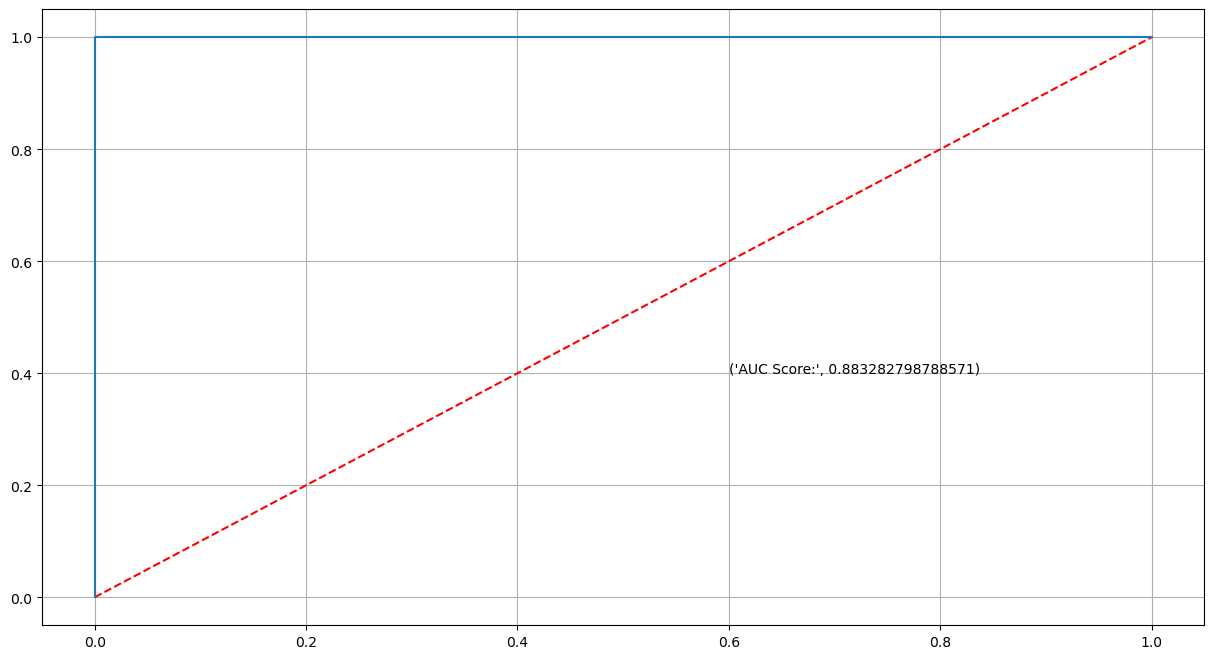

In [229]:
dt_model = DecisionTreeClassifier()
dtc_model = dt_model.fit(x_train, y_train)
y_train_pred = dtc_model.predict(x_train.values)
y_test_pred = dtc_model.predict(x_test.values)
pred_prob_test = dtc_model.predict_proba(x_test.values)[:,1] # Important step
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, pred_prob_test)))
plt.grid()

**Decision Tree model with predefined parameters and the average accuracy by performing the 10 fold cross validation.**

In [230]:
dtc = DecisionTreeClassifier(random_state=10)

# train data
score = cross_val_score(dtc,x_train,y_train,cv=10)
score.mean()

0.8805563978168586

In [231]:
score = cross_val_score(dtc,x_test,y_test,cv=10)
score.mean()

0.8559122914445849

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197867
           1       1.00      1.00      1.00    197893

    accuracy                           1.00    395760
   macro avg       1.00      1.00      1.00    395760
weighted avg       1.00      1.00      1.00    395760

Test:               precision    recall  f1-score   support

           0       0.89      0.87      0.88     84819
           1       0.87      0.90      0.88     84793

    accuracy                           0.88    169612
   macro avg       0.88      0.88      0.88    169612
weighted avg       0.88      0.88      0.88    169612



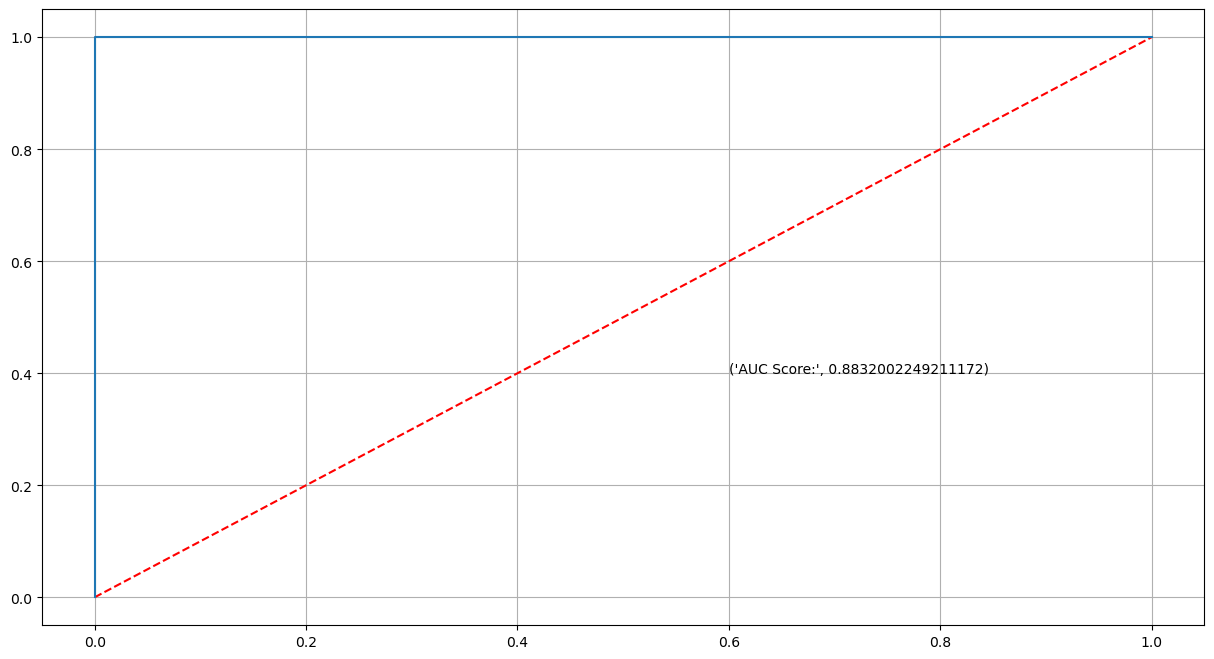

In [238]:
dtc_model = dt_model.fit(x_train, y_train)
y_train_pred = dtc_model.predict(x_train.values)
y_test_pred = dtc_model.predict(x_test.values)
pred_prob_test = dtc_model.predict_proba(x_test.values)[:,1] # Important step
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, pred_prob_test)))
plt.grid()

In [232]:
important_features = pd.DataFrame({'Features' : x_train.columns,
                                   'Importance': dtc_model.feature_importances_ })
important_features.sort_values('Importance', ascending=False)

Features  Importance
33                  EXT_SOURCE_3    0.121054
63      OBS_60_CNT_SOCIAL_CIRCLE    0.100760
20               CNT_FAM_MEMBERS    0.092553
3                   FLAG_OWN_CAR    0.087286
89    AMT_REQ_CREDIT_BUREAU_YEAR    0.072705
2                    CODE_GENDER    0.072343
32                  EXT_SOURCE_2    0.065107
49            NONLIVINGAREA_MODE    0.041164
17                    FLAG_PHONE    0.022312
31                  EXT_SOURCE_1    0.018129
0                     SK_ID_CURR    0.017573
15                    DAYS_BIRTH    0.016783
65        DAYS_LAST_PHONE_CHANGE    0.014976
6               AMT_INCOME_TOTAL    0.012606
8                    AMT_ANNUITY    0.012184
7                     AMT_CREDIT    0.011118
16                 DAYS_EMPLOYED    0.010958
30             ORGANIZATION_TYPE    0.010627
72               FLAG_DOCUMENT_8    0.009944
12           NAME_EDUCATION_TYPE    0.009842
23       HOUR_APPR_PROCESS_START    0.009265
22    WEEKDAY_APPR_PROCESS_START    0.008955
9                AMT_GOODS_PRICE    0.008410
87     AMT_REQ_CREDIT_BUREAU_MON    0.008176
11              NAME_INCOME_TYPE    0.008003
64      DEF_60_CNT_SOCIAL_CIRCLE    0.007403
19               OCCUPATION_TYPE    0.006763
88     AMT_REQ_CREDIT_BUREAU_QRT    0.006071
29       LIVE_CITY_NOT_WORK_CITY    0.005936
46                FLOORSMAX_MODE    0.005674
4                FLAG_OWN_REALTY    0.004943
13            NAME_FAMILY_STATUS    0.004721
21   REGION_RATING_CLIENT_W_CITY    0.004102
67               FLAG_DOCUMENT_3    0.003900
42             BASEMENTAREA_MODE    0.003765
1             NAME_CONTRACT_TYPE    0.003672
60                TOTALAREA_MODE    0.003371
41             NONLIVINGAREA_AVG    0.003199
51             BASEMENTAREA_MEDI    0.003081
47                 LANDAREA_MODE    0.003076
45                ENTRANCES_MODE    0.003015
14             NAME_HOUSING_TYPE    0.003007
43  YEARS_BEGINEXPLUATATION_MODE    0.002924
52  YEARS_BEGINEXPLUATATION_MEDI    0.002867
58            NONLIVINGAREA_MEDI    0.002849
44                ELEVATORS_MODE    0.002833
35   YEARS_BEGINEXPLUATATION_AVG    0.002635
61            WALLSMATERIAL_MODE    0.002573
10               NAME_TYPE_SUITE    0.002548
25    REG_REGION_NOT_WORK_REGION    0.002488
5                   CNT_CHILDREN    0.002451
39                  LANDAREA_AVG    0.002381
37                 ENTRANCES_AVG    0.002379
54                ENTRANCES_MEDI    0.002315
48               LIVINGAREA_MODE    0.002305
56                 LANDAREA_MEDI    0.002302
27        REG_CITY_NOT_LIVE_CITY    0.002267
50               APARTMENTS_MEDI    0.002250
40                LIVINGAREA_AVG    0.002126
55                FLOORSMAX_MEDI    0.002110
34                APARTMENTS_AVG    0.002055
57               LIVINGAREA_MEDI    0.002022
18                    FLAG_EMAIL    0.002014
38                 FLOORSMAX_AVG    0.001946
28        REG_CITY_NOT_WORK_CITY    0.001915
70               FLAG_DOCUMENT_6    0.001816
69               FLAG_DOCUMENT_5    0.000989
36                 ELEVATORS_AVG    0.000779
53                ELEVATORS_MEDI    0.000702
86     AMT_REQ_CREDIT_BUREAU_DAY    0.000584
26   LIVE_REGION_NOT_WORK_REGION    0.000386
24    REG_REGION_NOT_LIVE_REGION    0.000295
59                HOUSETYPE_MODE    0.000291
80              FLAG_DOCUMENT_16    0.000225
73               FLAG_DOCUMENT_9    0.000223
82              FLAG_DOCUMENT_18    0.000173
75              FLAG_DOCUMENT_11    0.000147
62           EMERGENCYSTATE_MODE    0.000122
77              FLAG_DOCUMENT_13    0.000051
83              FLAG_DOCUMENT_19    0.000036
66               FLAG_DOCUMENT_2    0.000027
78              FLAG_DOCUMENT_14    0.000025
85              FLAG_DOCUMENT_21    0.000017
84              FLAG_DOCUMENT_20    0.000009
81              FLAG_DOCUMENT_17    0.000009
71               FLAG_DOCUMENT_7    0.000004
76              FLAG_DOCUMENT_12    0.000000
79              FLAG_DOCUMENT_15    0.000000
68               FL

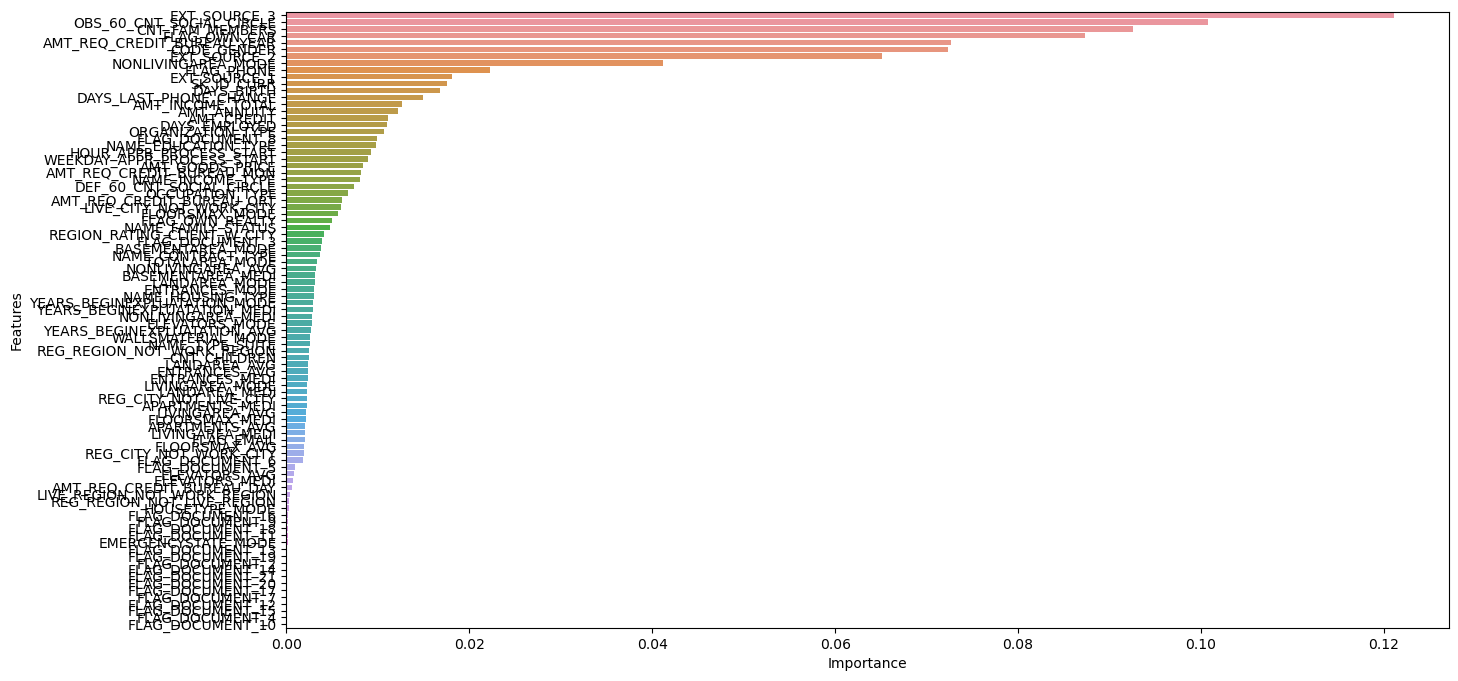

In [233]:
important_features = important_features.sort_values('Importance', ascending= False)
sns.barplot(x= 'Importance', y= 'Features', data = important_features);

Train:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    197867
           1       1.00      0.99      0.99    197893

    accuracy                           0.99    395760
   macro avg       0.99      0.99      0.99    395760
weighted avg       0.99      0.99      0.99    395760

Test:               precision    recall  f1-score   support

           0       0.90      0.98      0.94     84819
           1       0.97      0.90      0.93     84793

    accuracy                           0.94    169612
   macro avg       0.94      0.94      0.94    169612
weighted avg       0.94      0.94      0.94    169612



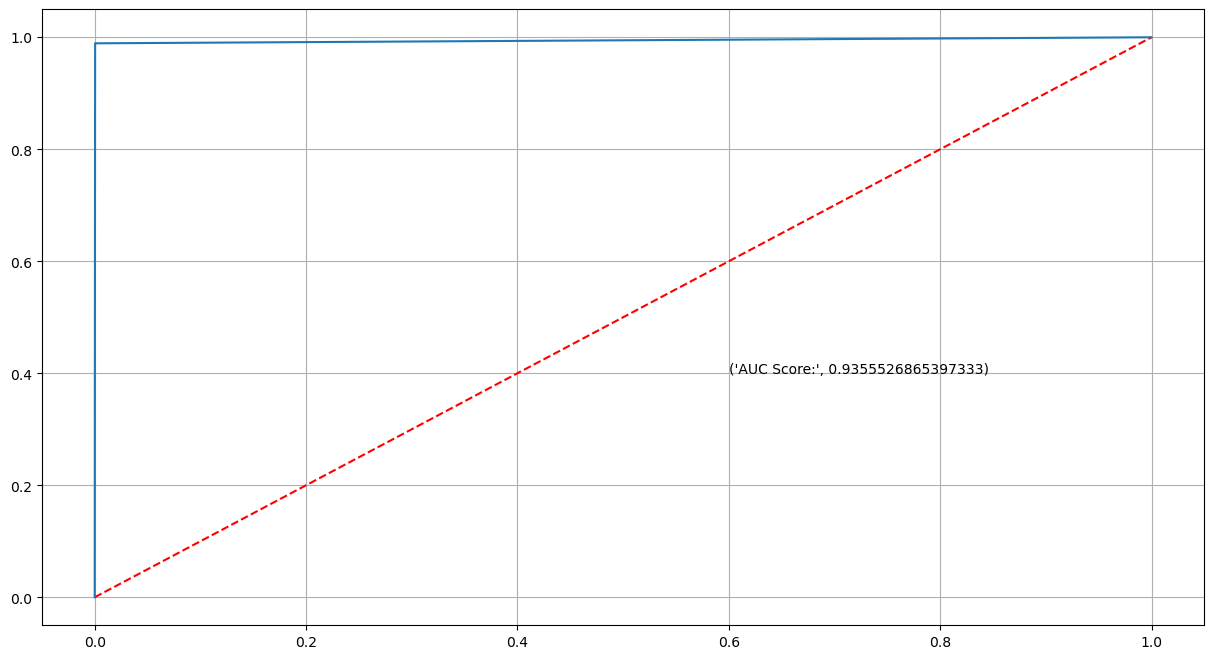

In [234]:
rf_cl = RandomForestClassifier(n_estimators=10, random_state=42)
# Max_depth, and criterion, n_estimators are only 3 parameters sufficient.
rf = rf_cl.fit(x_train, y_train)
y_train_pred = rf.predict(x_train.values)
y_test_pred = rf.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
# pred_prob = dtc.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, y_test_pred)))
plt.grid()

Train:               precision    recall  f1-score   support

           0       0.89      0.89      0.89    197867
           1       0.89      0.89      0.89    197893

    accuracy                           0.89    395760
   macro avg       0.89      0.89      0.89    395760
weighted avg       0.89      0.89      0.89    395760

Test:               precision    recall  f1-score   support

           0       0.89      0.89      0.89     84819
           1       0.89      0.89      0.89     84793

    accuracy                           0.89    169612
   macro avg       0.89      0.89      0.89    169612
weighted avg       0.89      0.89      0.89    169612



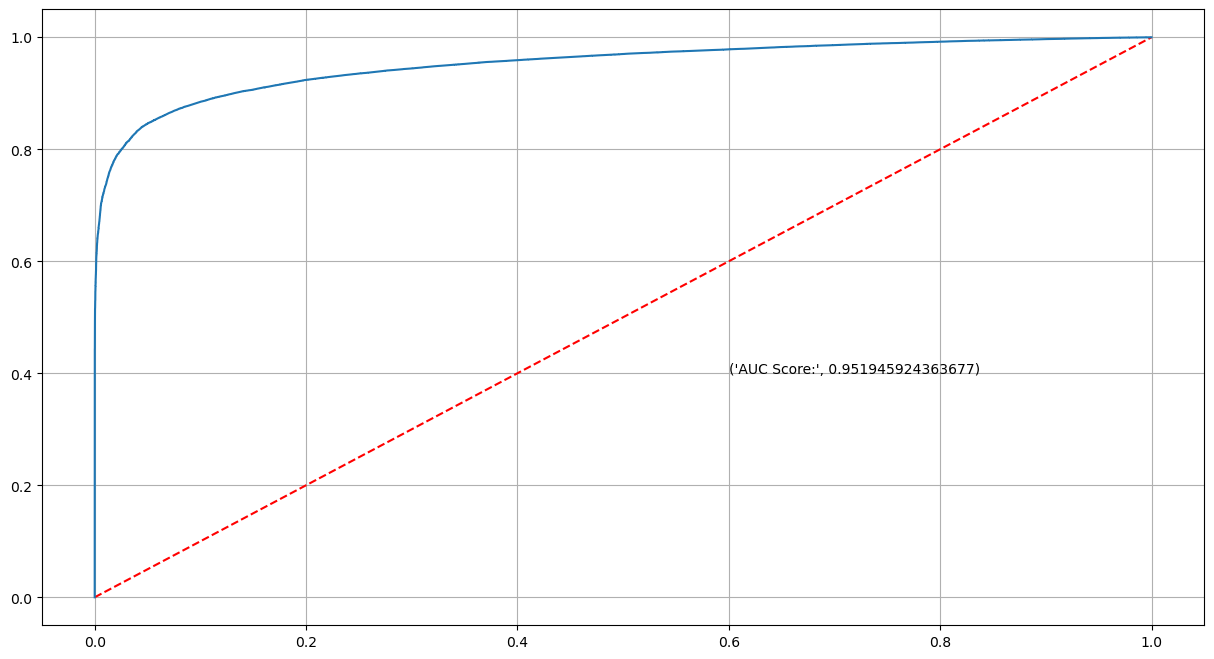

In [235]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 42)
abc = ada_model.fit(x_train, y_train)
y_train_pred = abc.predict(x_train.values)
y_test_pred = abc.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
pred_prob_test = abc.predict_proba(x_test.values)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, pred_prob_test)))
plt.grid()

In [ ]:
%%time
tunned_params = {'n_estimators' : [100, 120, 150, 200, 250, 300, 350],
                 'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015]}

adb = AdaBoostClassifier(random_state=42)

adb_grid = GridSearchCV(estimator=adb, param_grid=tunned_params, cv=3)
grid_adb_model = adb_grid.fit(x_train,y_train)

# get the best parameters
print(f'Best parameters for RandomForest classifiers: {grid_adb_model.best_params_}')

In [ ]:
%%time
from sklearn.model_selection import cross_val_score

ada = AdaBoostClassifier(**grid_adb_model.best_params_)

score = cross_val_score(estimator=ada, X = x_train, y = y_train, cv =10, scoring='roc_auc')

np.mean(score)

Train:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    197867
           1       1.00      0.93      0.96    197893

    accuracy                           0.96    395760
   macro avg       0.97      0.96      0.96    395760
weighted avg       0.97      0.96      0.96    395760

Test:               precision    recall  f1-score   support

           0       0.92      0.99      0.95     84819
           1       0.99      0.91      0.95     84793

    accuracy                           0.95    169612
   macro avg       0.96      0.95      0.95    169612
weighted avg       0.96      0.95      0.95    169612



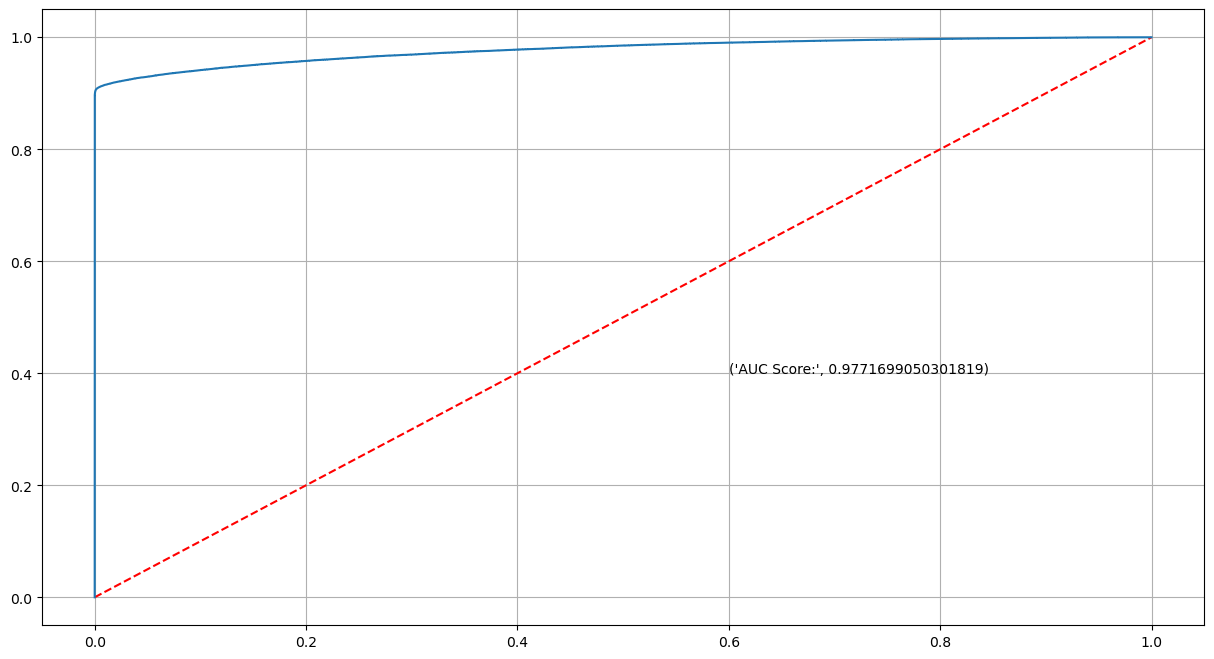

In [236]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 42)
gbc = gboost_model.fit(x_train, y_train)
y_train_pred = gbc.predict(x_train.values)
y_test_pred = gbc.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
pred_prob_test = gbc.predict_proba(x_test.values)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, pred_prob_test)))
plt.grid()

Train:               precision    recall  f1-score   support

           0       0.95      1.00      0.97    197867
           1       1.00      0.94      0.97    197893

    accuracy                           0.97    395760
   macro avg       0.97      0.97      0.97    395760
weighted avg       0.97      0.97      0.97    395760

Test:               precision    recall  f1-score   support

           0       0.92      0.99      0.95     84819
           1       0.99      0.91      0.95     84793

    accuracy                           0.95    169612
   macro avg       0.96      0.95      0.95    169612
weighted avg       0.96      0.95      0.95    169612



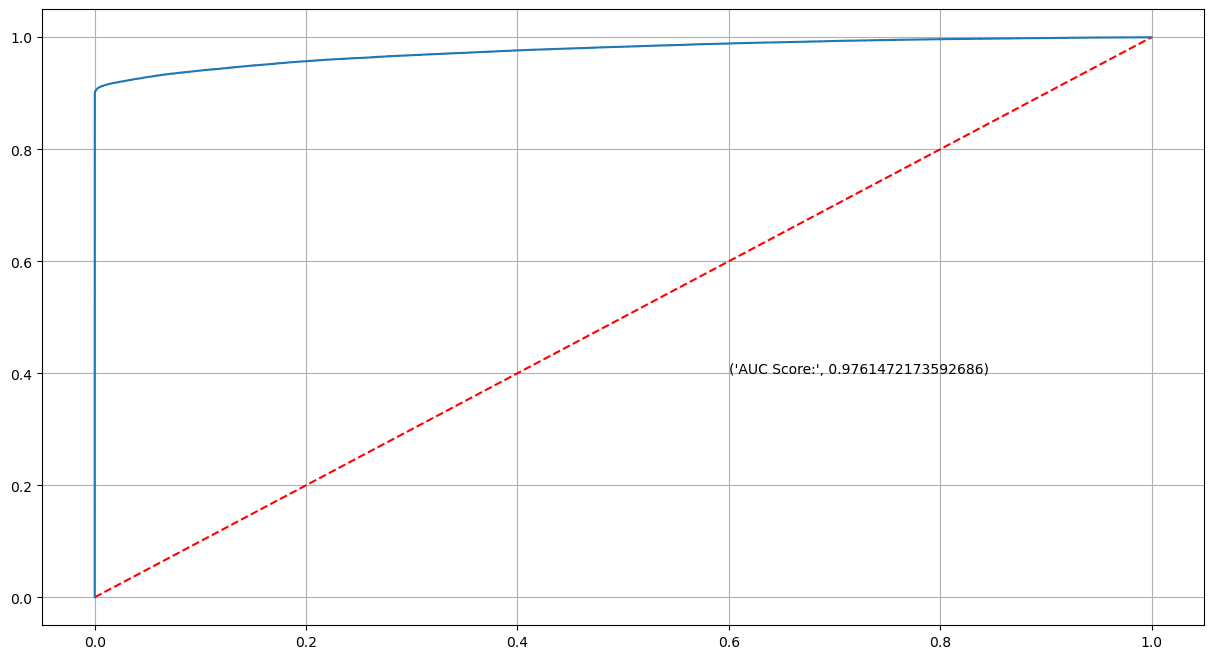

In [237]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1) # Don't take random_state
xgc = xgb_model.fit(x_train, y_train)
y_train_pred = xgc.predict(x_train.values)
y_test_pred = xgc.predict(x_test.values)
print('Train:', classification_report(y_train, y_train_pred))
print('Test:', classification_report(y_test, y_test_pred))
pred_prob_test = xgc.predict_proba(x_test.values)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_test)
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr, tpr)
plt.text(x=0.6, y=0.4, s=('AUC Score:',roc_auc_score(y_test, pred_prob_test)))
plt.grid()

In [244]:
df.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                0                 0                    0   
1        1129500.0                1                 1                    1   
2         135000.0                0                 0                    0   
3         297000.0                0                 0                    0   
4         513000.0                0                 0                    0   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  1       -9461           -637   
1                   1                  1      -16765          -1188   
2                   0                  1      -19046           -225   
3                   2                  1      -19005          -3039   
4                   0                  1      -19932          -3038   

   FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0           1           0                0              1.0   
1           1           0                1              2.0   
2           1           0                0              1.0   
3           0           0                0              2.0   
4           0           0                1              1.0   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           3   
1                            1                           1   
2                            2                           1   
3                            2                           3   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.72

In [243]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### undersampling data with n_samples=70000

In [86]:
# Separate majority and minority classes
majority_class = df[df['TARGET'] == 0]
minority_class = df[df['TARGET'] == 1]

from sklearn.utils import resample

# Downsample the majority class
n_samples = len(minority_class)
downsampled_majority = resample(majority_class, replace=False, n_samples=70000, random_state=42)

# Combine the downsampled majority class and the minority class
balanced_data = pd.concat([downsampled_majority, minority_class])

# Your balanced dataset is now in 'balanced_data' variable

balanced_data.shape

balanced_data.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
201622       0           -0.324395    -1.388135      1.392925   
8728         0            3.082659     0.720307     -0.717914   
152555       0            3.082659     0.720307      1.392925   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
201622         0.664531      0.807273          0.521679    1.250898   
8728           0.664531     -0.577538          0.426792    0.300564   
152555         0.664531      0.807273         -0.142533   -0.593868   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
201622     0.362613         1.527759         1.000526         -0.889689   
8728       0.613485         0.491983        -0.392408          1.587756   
152555    -0.628456        -0.482865        -0.392408         -0.889689   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
201622            -0.570906           -0.250130          -0.305298   
8728               2.694687           -0.250130          -0.305298   
152555             1.061891            1.778691          -0.305298   

        DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
201622    0.979380      -0.456576    1.599337   -0.245215         0.392538   
8728     -1.641163       2.133617   -0.625259   -0.245215        -0.724181   
152555   -0.716778      -0.475999   -0.625259    4.078050         0.113358   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
201622         0.930446                     1.926416   
8728          -0.167638                    -2.051813   
152555        -0.167638                    -0.062699   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
201622                    0.478073                -0.938022   
8728                      1.046655                -0.631821   
152555                   -1.796256                 0.286782   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
201622                   -0.124004                   -0.231267   
8728                     -0.124004                   -0.231267   
152555                   -0.124004                   -0.231267   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
201622                    -0.205869               -0.291208   
8728                      -0.205869               -0.291208   
152555                    -0.205869               -0.291208   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
201622               -0.547236                -0.467814           1.199675   
8728                 -0.547236                -0.467814           1.346277   
152555               -0.547236                -0.467814          -1.194830   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
201622      0.012103      0.532741      0.775832        2.473811   
8728        0.012103      1.121164      0.700194       -0.335819   
152555      2.161077      0.803948     -2.331917        1.728452   

        YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
201622                     0.223427       2.430153       1.380002   
8728                      -0.047617      -0.208589      -0.326114   
152555                     0.294135       2.030343       0.892338   

        FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  \
201622       1.670708      1.506177       -0.330881          -0.247098   
8728        -0.085551      0.081754       -0.285737          -0.305255   
152555       1.670708      0.858712        2.131988           0.081075   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  \
201622           2.323435                      0.212287        2.529621   
8728            -0.571928                     -0.088121       -0.355991   
152555           1.855202                      0.277123        2.117244   

        ENTRANCES_MODE  FLOORSMAX_MODE  LANDAREA_MODE  LIVINGAREA_MODE  \
201622        1.401907        1.7081

In [87]:
balanced_data.shape

(94825, 90)

In [88]:
balanced_data['TARGET'].value_counts()

0    70000
1    24825
Name: TARGET, dtype: int64

In [89]:
balanced_data['TARGET'].value_counts(normalize=True)*100

0    73.820195
1    26.179805
Name: TARGET, dtype: float64

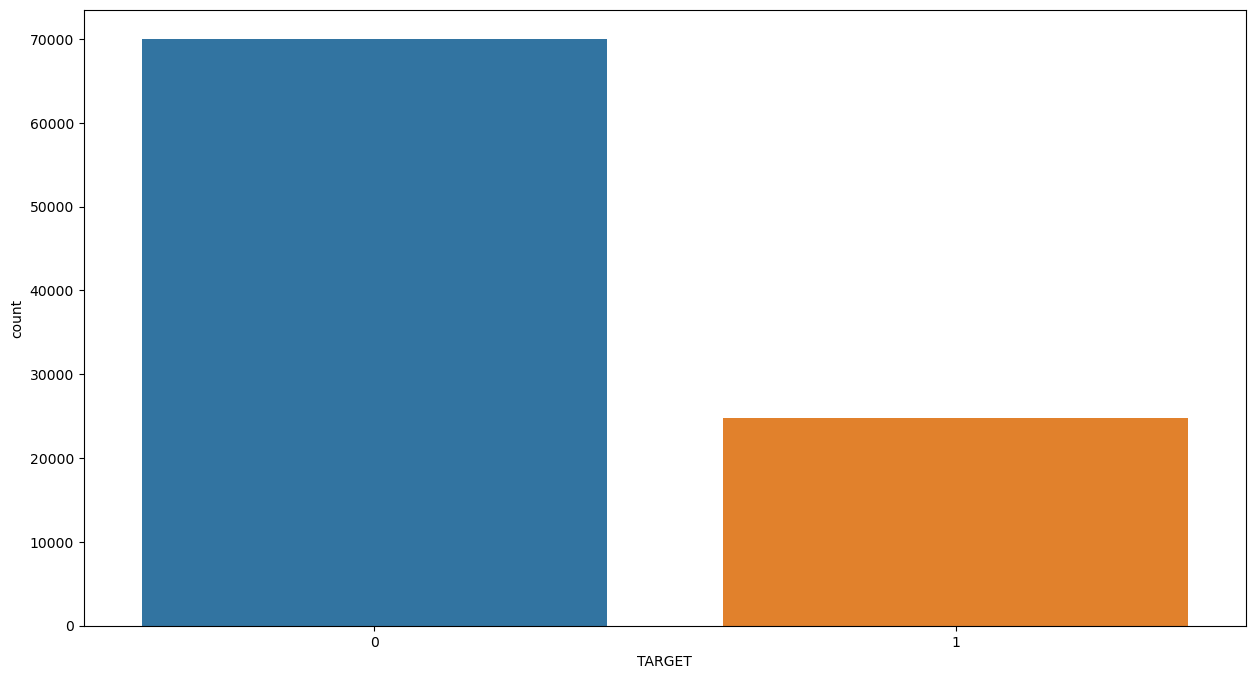

In [90]:
sns.countplot(x = balanced_data['TARGET'])
plt.show()

In [91]:
from sklearn.model_selection import train_test_split

x = balanced_data.drop('TARGET',axis = 1)
y = balanced_data['TARGET']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [92]:
# Separate majority and minority classes
majority_class = df[df['TARGET'] == 0]
minority_class = df[df['TARGET'] == 1]

from sklearn.utils import resample

# Downsample the majority class
n_samples = len(minority_class)
downsampled_majority = resample(majority_class, replace=False, n_samples=70000, random_state=42)

# Combine the downsampled majority class and the minority class
balanced_data = pd.concat([downsampled_majority, minority_class])

# Your balanced dataset is now in 'balanced_data' variable

balanced_data.shape

balanced_data.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
201622       0           -0.324395    -1.388135      1.392925   
8728         0            3.082659     0.720307     -0.717914   
152555       0            3.082659     0.720307      1.392925   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
201622         0.664531      0.807273          0.521679    1.250898   
8728           0.664531     -0.577538          0.426792    0.300564   
152555         0.664531      0.807273         -0.142533   -0.593868   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
201622     0.362613         1.527759         1.000526         -0.889689   
8728       0.613485         0.491983        -0.392408          1.587756   
152555    -0.628456        -0.482865        -0.392408         -0.889689   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
201622            -0.570906           -0.250130          -0.305298   
8728               2.694687           -0.250130          -0.305298   
152555             1.061891            1.778691          -0.305298   

        DAYS_BIRTH  DAYS_EMPLOYED  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
201622    0.979380      -0.456576    1.599337   -0.245215         0.392538   
8728     -1.641163       2.133617   -0.625259   -0.245215        -0.724181   
152555   -0.716778      -0.475999   -0.625259    4.078050         0.113358   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT_W_CITY  \
201622         0.930446                     1.926416   
8728          -0.167638                    -2.051813   
152555        -0.167638                    -0.062699   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
201622                    0.478073                -0.938022   
8728                      1.046655                -0.631821   
152555                   -1.796256                 0.286782   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
201622                   -0.124004                   -0.231267   
8728                     -0.124004                   -0.231267   
152555                   -0.124004                   -0.231267   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
201622                    -0.205869               -0.291208   
8728                      -0.205869               -0.291208   
152555                    -0.205869               -0.291208   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  \
201622               -0.547236                -0.467814           1.199675   
8728                 -0.547236                -0.467814           1.346277   
152555               -0.547236                -0.467814          -1.194830   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  \
201622      0.012103      0.532741      0.775832        2.473811   
8728        0.012103      1.121164      0.700194       -0.335819   
152555      2.161077      0.803948     -2.331917        1.728452   

        YEARS_BEGINEXPLUATATION_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
201622                     0.223427       2.430153       1.380002   
8728                      -0.047617      -0.208589      -0.326114   
152555                     0.294135       2.030343       0.892338   

        FLOORSMAX_AVG  LANDAREA_AVG  LIVINGAREA_AVG  NONLIVINGAREA_AVG  \
201622       1.670708      1.506177       -0.330881          -0.247098   
8728        -0.085551      0.081754       -0.285737          -0.305255   
152555       1.670708      0.858712        2.131988           0.081075   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  \
201622           2.323435                      0.212287        2.529621   
8728            -0.571928                     -0.088121       -0.355991   
152555           1.855202                      0.277123        2.117244   

        ENTRANCES_MODE  FLOORSMAX_MODE  LANDAREA_MODE  LIVINGAREA_MODE  \
201622        1.401907        1.7081

In [93]:
balanced_data.shape

(94825, 90)

In [94]:
balanced_data['TARGET'].value_counts()

0    70000
1    24825
Name: TARGET, dtype: int64

In [95]:
balanced_data['TARGET'].value_counts(normalize=True)*100

0    73.820195
1    26.179805
Name: TARGET, dtype: float64

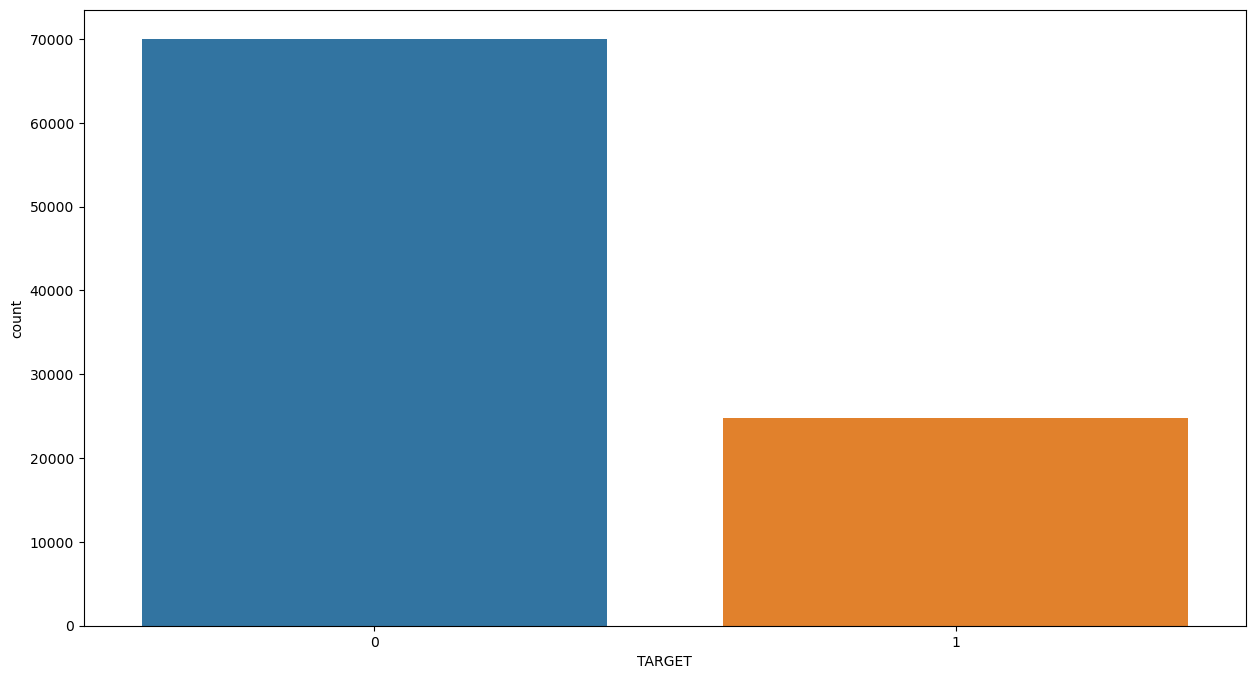

In [96]:
sns.countplot(x = balanced_data['TARGET'])
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

x = balanced_data.drop('TARGET',axis = 1)
y = balanced_data['TARGET']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [112]:
xgb_model = XGBClassifier(max_depth =4 , gamma = 1.3,n_estimators=170,learning_rate=0.5, reg_lambda=3)

xg_mod = xgb_model.fit(x_train,y_train)

y_pred_test = xgb_model.predict(x_test)
print('TEST',classification_report(y_test , y_pred_test))

y_pred_train = xgb_model.predict(x_train)
print('TRAIN',classification_report(y_train , y_pred_train))

TEST               precision    recall  f1-score   support

           0       0.79      0.93      0.85     20970
           1       0.60      0.31      0.41      7478

    accuracy                           0.76     28448
   macro avg       0.69      0.62      0.63     28448
weighted avg       0.74      0.76      0.74     28448

TRAIN               precision    recall  f1-score   support

           0       0.80      0.94      0.87     49030
           1       0.67      0.35      0.46     17347

    accuracy                           0.79     66377
   macro avg       0.74      0.65      0.66     66377
weighted avg       0.77      0.79      0.76     66377



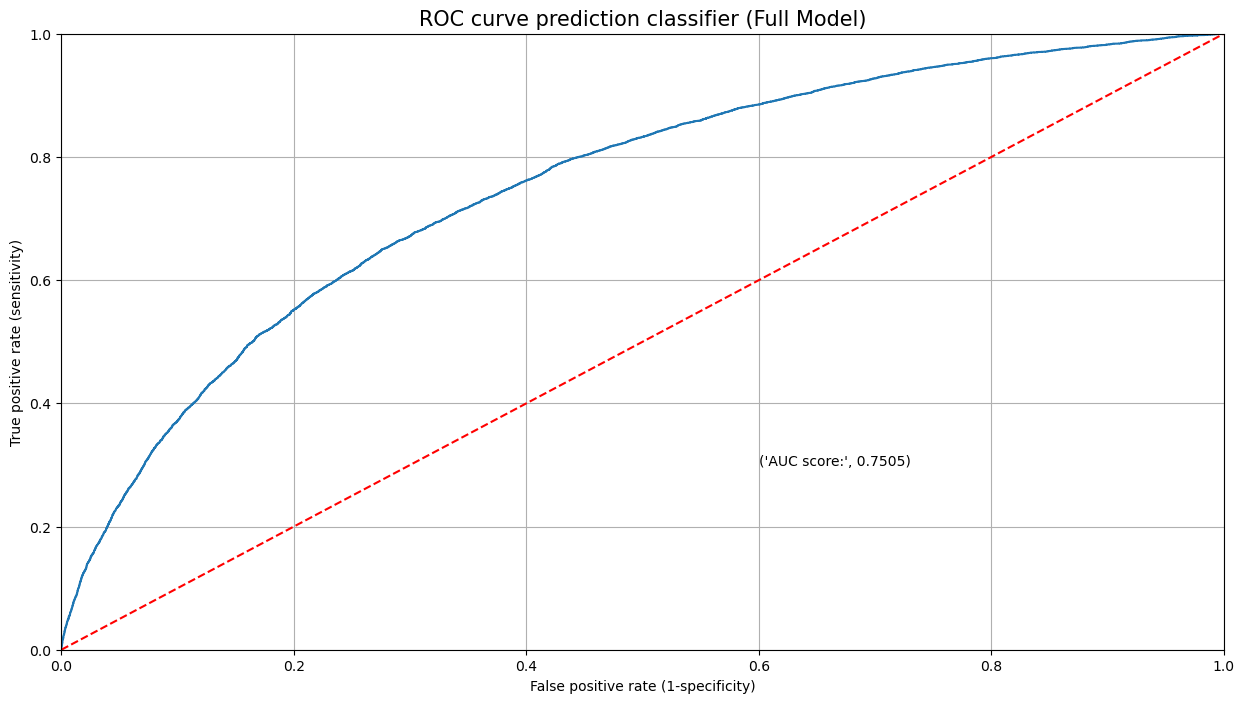

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = xgb_model.predict_proba(x_test)

fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob[:,1])

plt.plot(fpr , tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])


# plot the strainght line showing worst predcition for the model
plt.plot([0,1],[0,1],'r--')


## add plot and axes labels
# set text size using fontsize
plt.title('ROC curve prediction classifier (Full Model)',fontsize=15)
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')


# s is the text
# x , y are the points


auc= round(roc_auc_score(y_test,y_pred_prob[:,1]),4)
plt.text(x=0.6,y=0.3, s=('AUC score:',auc ))                         ## where to display and what to display

plt.grid(True)

In [114]:
import scipy.stats as stats

H0: Both train and Test are not equal representative of the data
H1: Both train and Test are equal representative of the data

In [115]:
stats.ttest_ind(x_train,y_train)[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [116]:
stats.ttest_ind(x_test,y_test)[1]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       5.86358884e-308, 2.04430913e-046, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 3.86264990e-277, 9.54280492e-225, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.08484154e-248, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.82341977e-281, 5.61362878e-283,
       1.92480129e-294, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

as p value > alpha so we failed to reject H0   (alpha=0.05)

as for both train and test the p_value is less than alpha.
Both train and test are proper representative of the dataset.

In [117]:
important_features = pd.DataFrame({'Features':x_train.columns,
                                  'Importance': xgb_model.feature_importances_})

important_features

Features  Importance
0             NAME_CONTRACT_TYPE    0.020200
1                    CODE_GENDER    0.028185
2                   FLAG_OWN_CAR    0.032200
3                FLAG_OWN_REALTY    0.006844
4                   CNT_CHILDREN    0.007360
5               AMT_INCOME_TOTAL    0.007854
6                     AMT_CREDIT    0.014031
7                    AMT_ANNUITY    0.012865
8                AMT_GOODS_PRICE    0.022545
9                NAME_TYPE_SUITE    0.007741
10              NAME_INCOME_TYPE    0.022670
11           NAME_EDUCATION_TYPE    0.031912
12            NAME_FAMILY_STATUS    0.009255
13             NAME_HOUSING_TYPE    0.007823
14                    DAYS_BIRTH    0.013192
15                 DAYS_EMPLOYED    0.015062
16                    FLAG_PHONE    0.005942
17                    FLAG_EMAIL    0.008581
18               OCCUPATION_TYPE    0.008309
19               CNT_FAM_MEMBERS    0.008589
20   REGION_RATING_CLIENT_W_CITY    0.014165
21    WEEKDAY_APPR_PROCESS_START    0.006859
22       HOUR_APPR_PROCESS_START    0.006573
23    REG_REGION_NOT_LIVE_REGION    0.002462
24    REG_REGION_NOT_WORK_REGION    0.000000
25   LIVE_REGION_NOT_WORK_REGION    0.000000
26        REG_CITY_NOT_LIVE_CITY    0.018384
27        REG_CITY_NOT_WORK_CITY    0.010652
28       LIVE_CITY_NOT_WORK_CITY    0.006655
29             ORGANIZATION_TYPE    0.012528
30                  EXT_SOURCE_1    0.025138
31                  EXT_SOURCE_2    0.094603
32                  EXT_SOURCE_3    0.075042
33                APARTMENTS_AVG    0.007804
34   YEARS_BEGINEXPLUATATION_AVG    0.008260
35                 ELEVATORS_AVG    0.004705
36                 ENTRANCES_AVG    0.005634
37                 FLOORSMAX_AVG    0.005579
38                  LANDAREA_AVG    0.006098
39                LIVINGAREA_AVG    0.012183
40             NONLIVINGAREA_AVG    0.008167
41             BASEMENTAREA_MODE    0.006536
42  YEARS_BEGINEXPLUATATION_MODE    0.006074
43                ELEVATORS_MODE    0.000000
44                ENTRANCES_MODE    0.007214
45                FLOORSMAX_MODE    0.007086
46                 LANDAREA_MODE    0.008026
47               LIVINGAREA_MODE    0.006614
48            NONLIVINGAREA_MODE    0.006795
49               APARTMENTS_MEDI    0.007148
50             BASEMENTAREA_MEDI    0.007909
51  YEARS_BEGINEXPLUATATION_MEDI    0.006601
52                ELEVATORS_MEDI    0.017976
53                ENTRANCES_MEDI    0.006629
54                FLOORSMAX_MEDI    0.002559
55                 LANDAREA_MEDI    0.009220
56               LIVINGAREA_MEDI    0.009515
57            NONLIVINGAREA_MEDI    0.008370
58                HOUSETYPE_MODE    0.000000
59                TOTALAREA_MODE    0.006832
60            WALLSMATERIAL_MODE    0.006478
61           EMERGENCYSTATE_MODE    0.006096
62      OBS_60_CNT_SOCIAL_CIRCLE    0.007618
63      DEF_60_CNT_SOCIAL_CIRCLE    0.016794
64        DAYS_LAST_PHONE_CHANGE    0.008630
65               FLAG_DOCUMENT_2    0.000000
66               FLAG_DOCUMENT_3    0.117954
67               FLAG_DOCUMENT_4    0.000000
68               FLAG_DOCUMENT_5    0.003726
69               FLAG_DOCUMENT_6    0.000000
70               FLAG_DOCUMENT_7    0.000000
71               FLAG_DOCUMENT_8    0.006027
72               FLAG_DOCUMENT_9    0.000000
73              FLAG_DOCUMENT_10    0.000000
74              FLAG_DOCUMENT_11    0.000000
75              FLAG_DOCUMENT_12    0.000000
76              FLAG_DOCUMENT_13    0.005395
77              FLAG_DOCUMENT_14    0.005065
78              FLAG_DOCUMENT_15    0.005118
79              FLAG_DOCUMENT_16    0.008738
80              FLAG_DOCUMENT_17    0.000000
81              FLAG_DOCUMENT_18    0.013725
82              FLAG_DOCUMENT_19    0.000000
83              FLAG_DOCUMENT_20    0.000000
84              FLAG_DOCUMENT_21    0.000000
85     AMT_REQ_CREDIT_BUREAU_DAY    0.004860
86     AMT_REQ_CREDIT_BUREAU_MON    0.007233
87     AMT_REQ_CREDIT_BUREAU_QRT    0.014784
88    AMT_REQ_CREDI

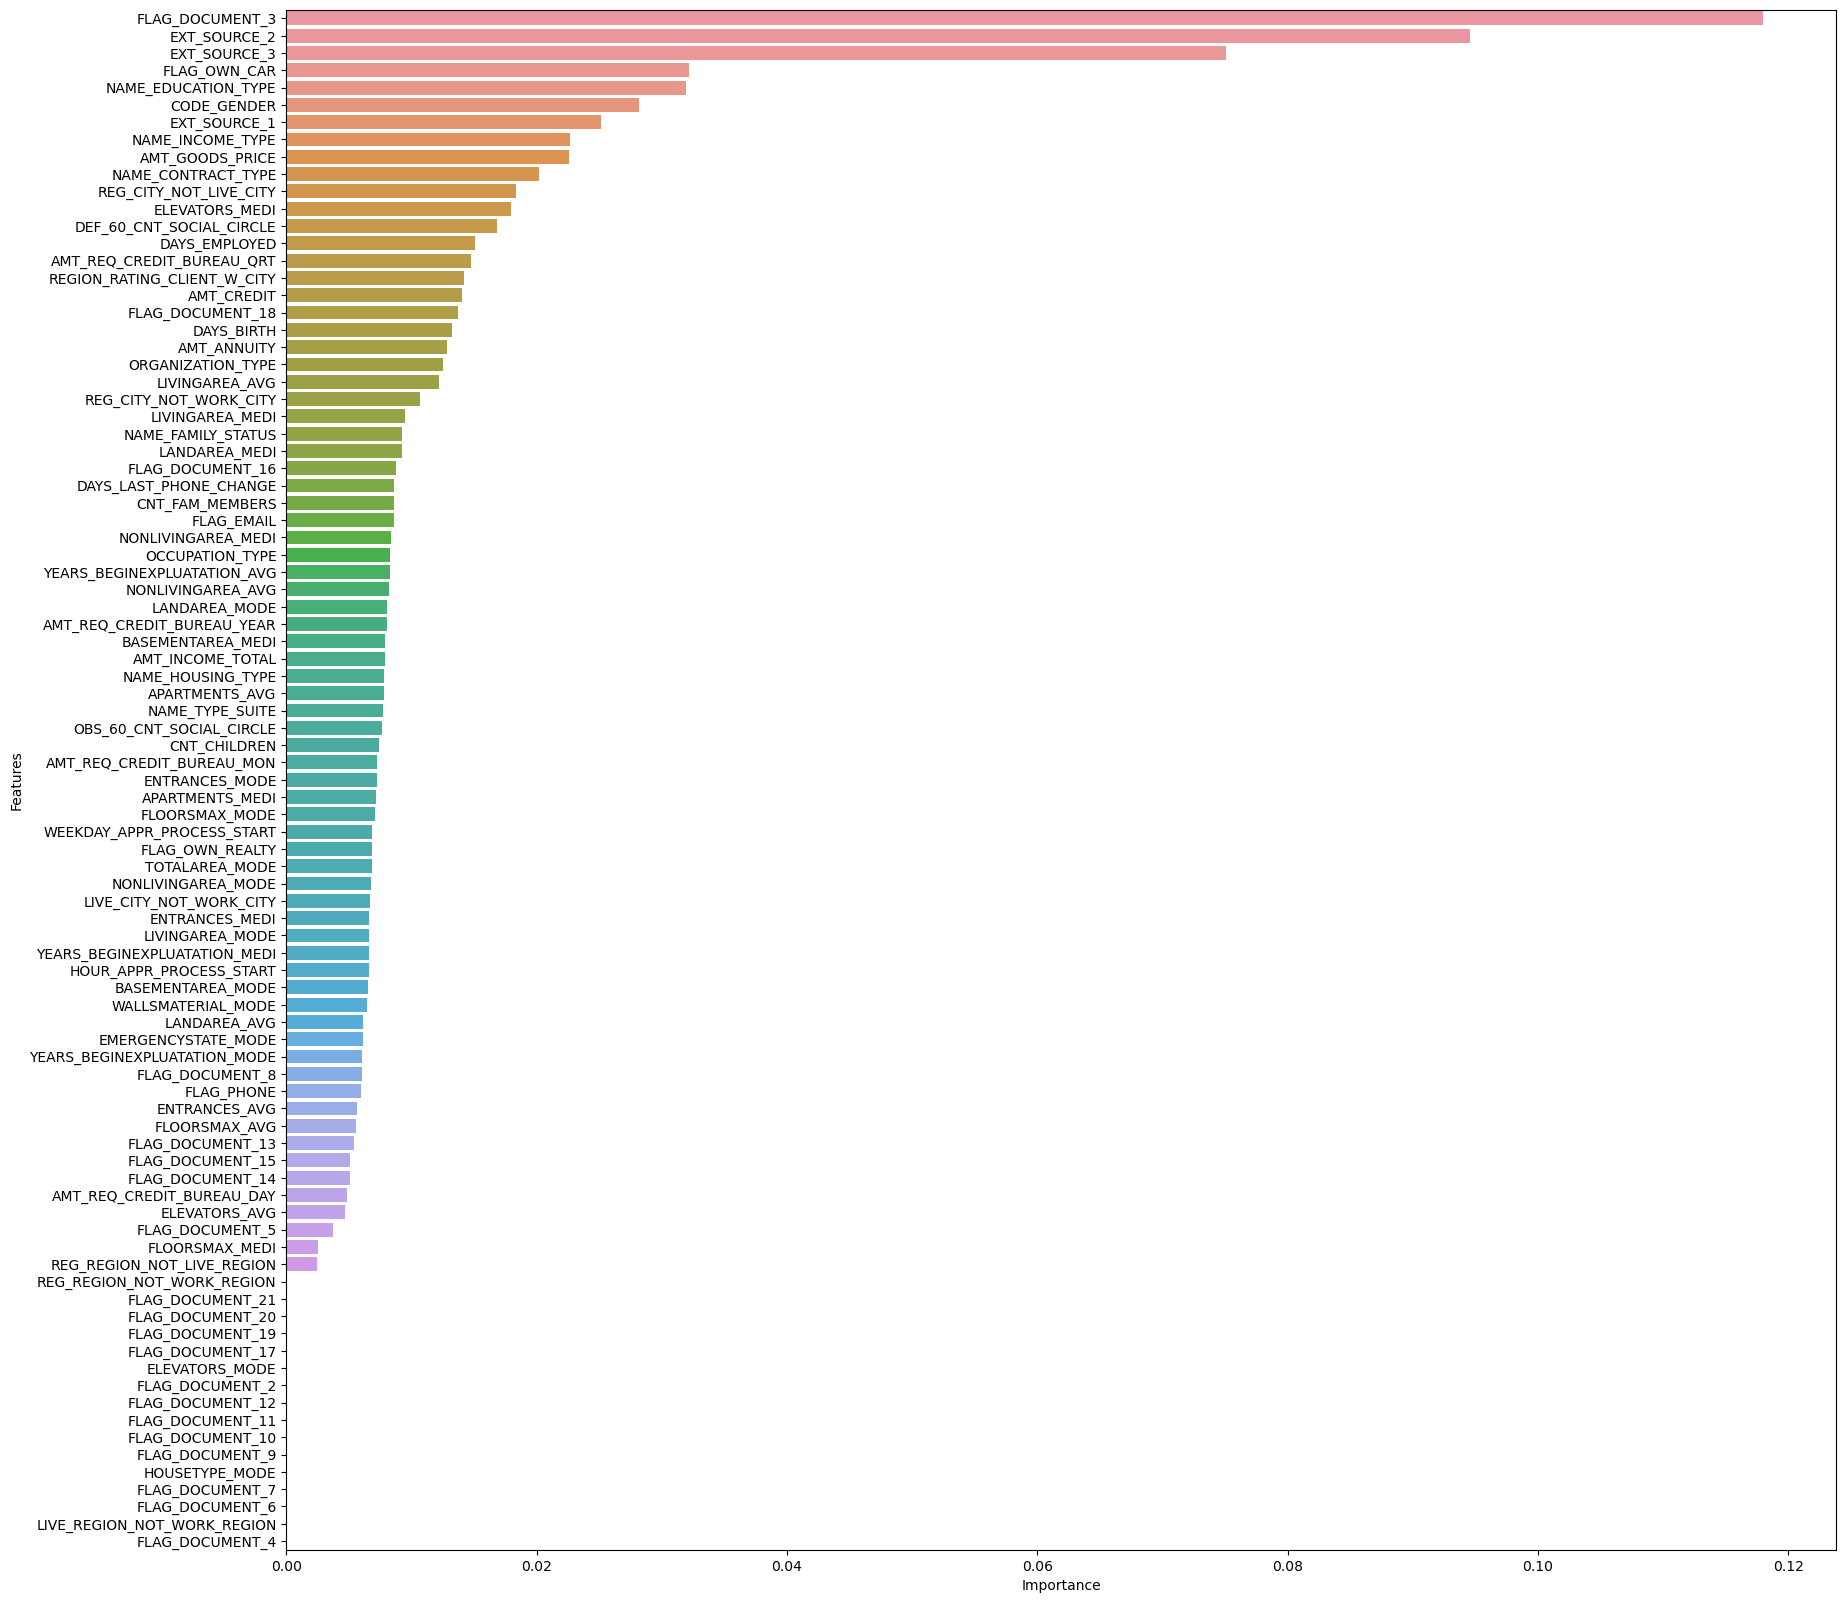

In [118]:
plt.figure(figsize=(20,20))
sns.barplot(x='Importance',y='Features',data=important_features.sort_values(by='Importance',ascending =False))
plt.show()

**The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.**

**Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.**

In [119]:
import pickle 

In [2]:
filename = 'file.pkl'

In [ ]:
# Serialize process
pickle.dump(df, open(filename, 'wb')) # 'wb'=====> write byte mode.

In [ ]:
# Unserialize
df_pic = pickle.load(open(filename, 'rb'))   # 'rb' =======> read byte mode.

In [108]:
models_dict = {
    'linear_regression': model_lr,
    'random_forest': rf_model,
    'Decision_tree_base': model,
    'Final_model': xgb_model.fit(x_train,y_train)
    }


In [109]:
with open('ml_models.pkl', 'wb') as f:
    pickle.dump(models_dict, f)


In [111]:
import pickle

with open('ml_models.pkl', 'rb') as f:
    loaded_models_dict = pickle.load(f)

# Access and use the loaded models
model_lr = loaded_models_dict['linear_regression']
rf_model = loaded_models_dict['random_forest']
model = loaded_models_dict['Decision_tree_base']
#xgb_model.fit(x_train,y_train)= loaded_models_dict['Final_model']

# Use the models for predictions
# ...


In [ ]:
models_dict = {
    'linear_regression': linear_regression_model,
    'random_forest': random_forest_model,
    'svm': svm_model
}
with open('ml_models.pkl', 'wb') as f:
    pickle.dump(models_dict, f)
import pickle

with open('ml_models.pkl', 'rb') as f:
    loaded_models_dict = pickle.load(f)

# Access and use the loaded models
linear_regression_model = loaded_models_dict['linear_regression']
random_forest_model = loaded_models_dict['random_forest']
svm_model = loaded_models_dict['svm']

# Use the models for predictions
# ...


In [122]:
final_dict = {'Final_model': xg_mod}

In [123]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_dict, f)

In [124]:
with open('ml_models.pkl', 'rb') as f:
    loaded_models_dict = pickle.load(f)
xg_mod = loaded_models_dict['Final_model']